# random exploration carried out without any order.
# This notebook was used to barinstorm and search for clues and hints
# New methods were used to fill the null values in all features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [554]:
pd.set_option('display.max_columns',36)
pd.set_option('display.max_rows',100)

In [65]:
test_df = pd.read_csv('Test_Set_TVS.csv')

In [2]:
df = pd.read_csv('Train_Set_TVS.csv')

In [67]:
test_df.shape

(56760, 32)

In [3]:
df.shape

(132440, 33)

In [7]:
df.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,Metro,1,Grad,Married,F,1_to_3,0.9,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,Metro,2,Grad,Married,M,1_to_3,3.0,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,46.0,12.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,Metro,3,Other,Married,M,1_to_3,NaN,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,57.0,5.0,Yes,Yes,0.538,0.538,281.0,4.0,0.0
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,Metro,1,Grad,Married,M,1_to_3,4.7,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,39.0,12.0,Yes,Yes,NaN,0.561,20.0,4.0,0.0
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,Rural,2,Grad,Married,F,4_to_6,6.9,Y,Sun,Yes,CLoan,3.0,1.0,North,32.0,16.0,Yes,Yes,NaN,0.200,2339.0,6.0,0.0


In [68]:
test_df.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
0,487410,653106.0,Y,809400.00,9145.51,0.0015,Govt.,ndf,Morethan_One,1.0,Metro,1,Grad,Married,M,1_to_3,5.4,Not_Specified,thur,Yes,CLoan,3.0,2.0,North,39.0,11.0,Yes,Yes,0.349,0.349,3133.0,2.0
1,533258,434150.0,N,72618.75,7683.23,0.0332,Govt.,ndf,One,4.0,Metro,1,Grad,Married,M,1_to_3,2.3,Y,wed,No,CLoan,2.0,3.0,Central,46.0,13.0,Yes,Yes,0.237,0.237,1730.0,5.0
2,581926,489060.0,N,267255.80,9032.85,0.0316,IT,ndf,Morethan_One,NaN,Rural,1,Grad,Married,M,1_to_3,11.0,Y,thur,No,CLoan,3.0,2.0,South,33.0,15.0,Yes,Yes,0.111,0.111,759.0,4.0
3,486301,957294.0,N,623600.00,12838.25,0.0320,IT,ndf,One,4.0,Metro,1,Grad,Married,M,1_to_3,9.7,Y,Tue,Yes,CLoan,2.0,2.0,East,48.0,12.0,Yes,Yes,0.323,0.323,609.0,4.0
4,580822,1333739.0,N,529520.00,11799.09,0.0073,Non-IT,ndf,One,4.0,Metro,3,P_Grad,Married,F,1_to_3,NaN,Y,wed,Yes,RLoan,2.0,3.0,North,53.0,7.0,Yes,Yes,0.940,0.940,1222.0,1.0


In [69]:
test_df2 = test_df.copy()

In [70]:
test_df2['Default'] = 3.0

In [76]:
test_df2.tail()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
56755,513665,671640.0,N,260085.0,9654.50,0.0050,IT,ndf,One,4.0,Metro,1,Grad,Single,F,1_to_3,3.6,Not_Specified,wed,Yes,CLoan,1.0,2.0,North,42.0,11.0,Yes,Yes,0.716,0.716,215.0,7.0,3.0
56756,450327,650680.0,N,714467.6,14063.75,0.0321,NaN,ndf,One,NaN,Metro,1,Grad,Married,M,1_to_3,15.1,Y,Tue,Yes,CLoan,2.0,3.0,East,47.0,9.0,Yes,Yes,NaN,0.193,22.0,0.0,3.0
56757,476417,551374.0,NaN,231420.0,11299.78,0.0334,Govt.,df,None,2.0,Metro,1,Grad,Divorce,M,1_to_3,0.3,Not_Specified,thur,Yes,RLoan,3.0,2.0,East,35.0,10.0,No,Yes,0.175,0.175,776.0,5.0,3.0
56758,461152,975117.0,N,1096620.0,10223.30,0.0052,IT,ndf,One,4.0,Metro,2,Other,Single,M,>6,1.4,Y,mon,Yes,CLoan,1.0,1.0,North,22.0,13.0,Yes,No,0.669,0.669,873.0,3.0,3.0
56759,524075,NaN,N,197232.0,12178.59,0.0155,IT,ndf,One,4.0,Metro,1,Grad,Married,F,1_to_3,0.3,Not_Specified,thur,Yes,CLoan,2.0,2.0,East,39.0,11.0,Yes,No,0.237,0.237,NaN,2.0,3.0


In [370]:
full_df = pd.concat([df1,test_df2],axis=0)

In [610]:
df['Default'].value_counts(normalize=True)


0.0    0.735699
1.0    0.264301
Name: Default, dtype: float64

In [611]:
test_df.isnull().sum()

ID                       0
Compensation          2750
Vehicle_Status        3883
Loan_amt                 0
Annuity_amt           1963
density_Ind           2275
Job_Type              4320
Default_hist             0
Prop_List              911
Home_Appliances       4759
Region_Type              0
Credit_Inq            1166
Education_det            0
Marital_Stat             0
Gen                      0
Credit_Lnks              0
Experience            9351
Income_Alt            3299
Day_Process              0
Ph.No                    0
Type_Loan                0
Dependents               0
Company_Rating        5053
Region                   0
Age                      0
hour_Process             0
Addr_permanent           0
Permanent_Addr_tag       0
c1_rated              7363
c2_rated              5655
Contact_age           3522
Product_bought           0
dtype: int64

In [77]:
full_df.tail()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
56755,513665,671640.0,N,260085.0,9654.50,0.0050,IT,ndf,One,4.0,Metro,1,Grad,Single,F,1_to_3,3.6,Not_Specified,wed,Yes,CLoan,1.0,2.0,North,42.0,11.0,Yes,Yes,0.716,0.716,215.0,7.0,3.0
56756,450327,650680.0,N,714467.6,14063.75,0.0321,NaN,ndf,One,NaN,Metro,1,Grad,Married,M,1_to_3,15.1,Y,Tue,Yes,CLoan,2.0,3.0,East,47.0,9.0,Yes,Yes,NaN,0.193,22.0,0.0,3.0
56757,476417,551374.0,NaN,231420.0,11299.78,0.0334,Govt.,df,None,2.0,Metro,1,Grad,Divorce,M,1_to_3,0.3,Not_Specified,thur,Yes,RLoan,3.0,2.0,East,35.0,10.0,No,Yes,0.175,0.175,776.0,5.0,3.0
56758,461152,975117.0,N,1096620.0,10223.30,0.0052,IT,ndf,One,4.0,Metro,2,Other,Single,M,>6,1.4,Y,mon,Yes,CLoan,1.0,1.0,North,22.0,13.0,Yes,No,0.669,0.669,873.0,3.0,3.0
56759,524075,NaN,N,197232.0,12178.59,0.0155,IT,ndf,One,4.0,Metro,1,Grad,Married,F,1_to_3,0.3,Not_Specified,thur,Yes,CLoan,2.0,2.0,East,39.0,11.0,Yes,No,0.237,0.237,NaN,2.0,3.0


In [82]:
nullpercent = (full_df.isnull().sum()/len(full_df)*100).reset_index().rename(columns={'index':'features',0:'missing count'}).sort_values('missing count')

In [83]:
#df.isnull().sum().reset_index().rename(columns={'index':'features',0:'missing count'}).sort_values('missing count')

In [81]:
nulldf = test_df.isnull().sum().reset_index().rename(columns={'index':'features',0:'missing count'}).sort_values('missing count')

In [9]:
df['Default'].value_counts(normalize=True)

0.0    0.735699
1.0    0.264301
Name: Default, dtype: float64

In [10]:
df1 = df.copy()

In [11]:
df_cat = df1.select_dtypes(object)

In [19]:
df_num = df1.select_dtypes(np.number)

In [12]:
df_cat.head()

,Vehicle_Status,Job_Type,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Region,Addr_permanent,Permanent_Addr_tag
0,Y,IT,ndf,Morethan_One,Metro,1,Grad,Married,F,1_to_3,Not_Specified,SAT,Yes,CLoan,East,Yes,No
1,N,IT,ndf,Morethan_One,Metro,2,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,CLoan,North,Yes,Yes
2,N,Govt.,ndf,One,Metro,3,Other,Married,M,1_to_3,Not_Specified,mon,Yes,CLoan,North,Yes,Yes
3,N,Non-IT,df,None,Metro,1,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,RLoan,South,Yes,Yes
4,Y,Non-IT,ndf,Morethan_One,Rural,2,Grad,Married,F,4_to_6,Y,Sun,Yes,CLoan,North,Yes,Yes


In [62]:
df_cat.isnull().sum().reset_index().rename(columns={'index':'features',0:'missing count'})

,features,missing count
0,Vehicle_Status,9104
1,Job_Type,10248
2,Default_hist,0
3,Prop_List,1965
4,Region_Type,0
5,Credit_Inq,2690
6,Education_det,0
7,Marital_Stat,0
8,Gen,0
9,Credit_Lnks,0


In [13]:
df_cat.shape

(132440, 17)

In [21]:
df_num.shape

(132440, 16)

In [18]:
pd.crosstab(df1['Vehicle_Status'],df1['Default'],margins=True,normalize=True)

Default,0.0,1.0,All
Vehicle_Status,,,
N,0.484214,0.175529,0.659742
Y,0.251622,0.088636,0.340258
All,0.735835,0.264165,1.000000


In [20]:
df_num.head()

,ID,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,658040.0,13816.52,0.0304,NaN,0.9,3.0,2.0,46.0,10.0,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,198075.0,11173.06,0.0194,1.0,3.0,3.0,1.0,46.0,12.0,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,101056.0,8390.40,0.0118,4.0,NaN,2.0,3.0,57.0,5.0,0.538,0.538,281.0,4.0,0.0
3,499360,341874.0,179008.0,7184.13,0.0373,2.0,4.7,4.0,2.0,39.0,12.0,NaN,0.561,20.0,4.0,0.0
4,438350,1259895.0,573715.0,13212.77,0.0138,1.0,6.9,3.0,1.0,32.0,16.0,NaN,0.200,2339.0,6.0,0.0


In [22]:
df_num.isnull().sum()

ID                     0
Compensation        6242
Loan_amt               0
Annuity_amt         4611
density_Ind         5416
Home_Appliances    10964
Experience         21845
Dependents             0
Company_Rating     11731
Age                    0
hour_Process           0
c1_rated           17513
c2_rated           13321
Contact_age         8153
Product_bought         0
Default                0
dtype: int64

In [44]:
#df_num['Home_Appliances'].value_counts()

In [600]:
loantyp_tab = pd.crosstab(full_df['Type_Loan'],full_df['Default'])
loantyp_tab['ndf proportion'] =loantyp_tab[0.0]/(loantyp_tab[0.0]+loantyp_tab[1.0])*100
loantyp_tab['df proportion'] = loantyp_tab[1.0]/(loantyp_tab[0.0]+loantyp_tab[1.0])*100
loantyp_tab.sort_values('ndf proportion')

Default,0.0,1.0,3.0,ndf proportion,df proportion
Type_Loan,,,,,
CLoan,88135,31793,51444,73.489927,26.510073
RLoan,9301,3211,5316,74.336637,25.663363


In [599]:
home_tab = pd.crosstab(full_df['Home_Appliances'],full_df['Default'])
home_tab['ndf proportion'] = home_tab[0.0]/(home_tab[0.0]+home_tab[1.0])*100
home_tab['df proportion'] = home_tab[1.0]/(home_tab[0.0]+home_tab[1.0])*100
home_tab.sort_values('ndf proportion')

Default,0.0,1.0,3.0,ndf proportion,df proportion
Home_Appliances,,,,,
9.0,0,1,0,0.000000,100.000000
6.0,7,8,2,46.666667,53.333333
7.0,1,1,1,50.000000,50.000000
12.0,1,1,0,50.000000,50.000000
10.0,2,1,0,66.666667,33.333333
1.0,17589,6458,10277,73.144259,26.855741
2.0,7786,2796,4526,73.577774,26.422226
4.0,62817,22489,36490,73.637259,26.362741
5.0,23,8,12,74.193548,25.806452


In [569]:
full_df[full_df['Home_Appliances'] == 19]

,index,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default,laaa,pain
8825,8825,426372,373959.0,N,211113.0,11262.05,0.0127,IT,df,Morethan_One,19.0,Rural,1,Grad,Married,M,1_to_3,3.3,Not_Specified,Tue,Yes,CLoan,3.0,2.0,Central,39.0,12.0,Yes,No,0.59,0.59,770.0,4.0,0.0,18.745521,0.361389
177566,45126,403844,485064.0,N,182916.0,NaN,0.0149,Govt.,df,Morethan_One,19.0,Rural,NaN,Grad,Single,M,1_to_3,3.3,Y,Sun,No,CLoan,4.0,2.0,East,30.0,12.0,Yes,Yes,0.34,0.34,762.0,4.0,3.0,NaN,NaN


In [568]:
full_df = full_df.reset_index()

In [ ]:
# Out of 17 categorical how many are binary ?


In [30]:
df_cat.head()

,Vehicle_Status,Job_Type,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Region,Addr_permanent,Permanent_Addr_tag
0,Y,IT,ndf,Morethan_One,Metro,1,Grad,Married,F,1_to_3,Not_Specified,SAT,Yes,CLoan,East,Yes,No
1,N,IT,ndf,Morethan_One,Metro,2,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,CLoan,North,Yes,Yes
2,N,Govt.,ndf,One,Metro,3,Other,Married,M,1_to_3,Not_Specified,mon,Yes,CLoan,North,Yes,Yes
3,N,Non-IT,df,None,Metro,1,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,RLoan,South,Yes,Yes
4,Y,Non-IT,ndf,Morethan_One,Rural,2,Grad,Married,F,4_to_6,Y,Sun,Yes,CLoan,North,Yes,Yes


In [553]:
cat_cols = df_cat.columns
count = 0
binary_cat = []
for i in cat_cols:
    if df_cat[i].value_counts().shape[0] == 2:
        binary_cat.append(i)
        count += 1
        print('\n',df_cat[i].value_counts(normalize=True))
print('number of binary categorical features = ',count)


 N    0.659742
Y    0.340258
Name: Vehicle_Status, dtype: float64

 ndf    0.899804
df     0.100196
Name: Default_hist, dtype: float64

 M    0.657377
F    0.342623
Name: Gen, dtype: float64

 Not_Specified    0.720178
Y                0.279822
Name: Income_Alt, dtype: float64

 Yes    0.79994
No     0.20006
Name: Ph.No, dtype: float64

 CLoan    0.905527
RLoan    0.094473
Name: Type_Loan, dtype: float64

 Yes    0.921912
No     0.078088
Name: Addr_permanent, dtype: float64

 Yes    0.820115
No     0.179885
Name: Permanent_Addr_tag, dtype: float64
number of binary categorical features =  8


In [560]:
pd.crosstab(full_df['Ph.No'],full_df['Default'])

Default,0.0,1.0,3.0
Ph.No,,,
No,19268,7228,11361
Yes,78168,27776,45399


In [564]:
7228/(19268+7228)

0.2727958937198068

In [563]:
27776/(78168+27776)

0.2621762440534622

In [40]:
binary_cat

['Vehicle_Status',
 'Default_hist',
 'Gen',
 'Income_Alt',
 'Ph.No',
 'Type_Loan',
 'Addr_permanent',
 'Permanent_Addr_tag']

In [41]:
# binary columns are very helpful because they do not increase the dimensions after encoding

In [42]:
count = 0
non_binary_cat = []
for i in cat_cols:
    if df_cat[i].value_counts().shape[0] != 2:
        non_binary_cat.append(i)
        count += 1
        print('\n',df_cat[i].value_counts())
print('number of non binary categorical features = ',count)


 IT        66982
Non-IT    29488
Govt.     25722
Name: Job_Type, dtype: int64

 One             91559
Morethan_One    25896
None            13020
Name: Prop_List, dtype: int64

 Metro    107548
Rural     22278
other      2614
Name: Region_Type, dtype: int64

 1     67072
2     30362
3     23178
>4     9138
Name: Credit_Inq, dtype: int64

 Grad      93858
P_Grad    32457
Other      6125
Name: Education_det, dtype: int64

 Married    97609
Single     19664
Divorce     8391
Widow       6776
Name: Marital_Stat, dtype: int64

 1_to_3    117604
4_to_6     13182
>6          1654
Name: Credit_Lnks, dtype: int64

 Tue     23146
wed     22387
thur    21958
mon     21936
Fri     21701
SAT     14489
Sun      6823
Name: Day_Process, dtype: int64

 North      53101
East       28615
Central    27227
South      23497
Name: Region, dtype: int64
number of non binary categorical features =  9


In [46]:
df_num.head()

,ID,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,658040.0,13816.52,0.0304,NaN,0.9,3.0,2.0,46.0,10.0,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,198075.0,11173.06,0.0194,1.0,3.0,3.0,1.0,46.0,12.0,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,101056.0,8390.40,0.0118,4.0,NaN,2.0,3.0,57.0,5.0,0.538,0.538,281.0,4.0,0.0
3,499360,341874.0,179008.0,7184.13,0.0373,2.0,4.7,4.0,2.0,39.0,12.0,NaN,0.561,20.0,4.0,0.0
4,438350,1259895.0,573715.0,13212.77,0.0138,1.0,6.9,3.0,1.0,32.0,16.0,NaN,0.200,2339.0,6.0,0.0


In [ ]:
# categorical features that are present as numerical features.
''' Product_bought
Company_rating
Dependents
Home_Appliances
'''

# purely numercial
'''
Compensation
'''

In [613]:
full_df[(full_df['Experience'].isnull())&(full_df['Compensation'].isnull())]['Default'].value_counts()

0.0    795
3.0    447
1.0    262
Name: Default, dtype: int64

In [615]:
full_df[(full_df['Experience'].isnull())&(full_df['Compensation'].isnull())]

,index,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default,laaa,pain
92,92,502947,NaN,N,237040.0,8809.86,NaN,IT,ndf,One,NaN,Rural,3,P_Grad,Widow,F,1_to_3,NaN,Not_Specified,thur,Yes,CLoan,1.0,2.0,North,66.0,16.0,Yes,Yes,NaN,0.785,711.0,6.0,0.0,26.906216,NaN
123,123,537070,NaN,N,338270.1,9508.34,0.0272,IT,ndf,One,NaN,Metro,3,Grad,Widow,M,1_to_3,NaN,Not_Specified,Tue,Yes,CLoan,1.0,2.0,North,65.0,16.0,Yes,Yes,0.342,0.342,326.0,2.0,0.0,35.576147,NaN
147,147,423563,NaN,N,135153.6,9686.86,0.0181,IT,ndf,One,4.0,other,3,Grad,Married,M,1_to_3,NaN,Not_Specified,Fri,Yes,CLoan,2.0,2.0,North,57.0,10.0,Yes,Yes,0.752,0.752,NaN,5.0,0.0,13.952261,NaN
195,195,389634,NaN,Y,501670.8,10043.60,0.0350,Govt.,ndf,One,4.0,Metro,3,Grad,Married,M,1_to_3,NaN,Not_Specified,SAT,Yes,CLoan,2.0,2.0,North,59.0,14.0,Yes,Yes,0.324,0.324,NaN,5.0,0.0,49.949301,NaN
266,266,549384,NaN,Y,150325.0,9080.82,0.0252,IT,ndf,One,NaN,Metro,3,Grad,Married,M,1_to_3,NaN,Y,thur,Yes,CLoan,2.0,2.0,North,61.0,14.0,Yes,Yes,0.869,0.869,2072.0,4.0,0.0,16.554122,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188415,55975,573454,NaN,Y,422827.2,10427.85,0.0366,IT,ndf,One,4.0,Metro,3,Grad,Single,M,1_to_3,NaN,Not_Specified,thur,Yes,CLoan,1.0,1.0,North,60.0,15.0,Yes,Yes,NaN,0.777,13.0,2.0,3.0,40.547879,NaN
188534,56094,395381,NaN,N,242284.8,10586.16,0.0270,IT,ndf,One,4.0,Metro,3,Grad,Married,M,1_to_3,NaN,Not_Specified,thur,Yes,CLoan,2.0,2.0,North,63.0,10.0,Yes,Yes,0.180,0.180,1069.0,6.0,3.0,22.886939,NaN
188963,56523,567272,NaN,N,243875.0,11255.48,0.0271,Non-IT,ndf,One,4.0,Metro,3,P_Grad,Widow,M,1_to_3,NaN,Not_Specified,wed,Yes,CLoan,1.0,2.0,North,58.0,12.0,Yes,Yes,0.756,0.756,50.0,5.0,3.0,21.667223,NaN
189143,56703,443335,NaN,N,186360.0,8492.81,0.0046,NaN,ndf,One,4.0,Metro,3,Grad,Married,M,1_to_3,NaN,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,56.0,4.0,Yes,Yes,0.848,0.848,431.0,3.0,3.0,21.943267,NaN


In [635]:
full_df[full_df['Compensation'].isnull()]['Default'].value_counts()

0.0    4627
3.0    2750
1.0    1615
Name: Default, dtype: int64

In [ ]:
# filling Annuity_amt and Compensation using other features like 
# Educaiton
# Age
# 

C:\Users\AR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_amt', ylabel='Annuity_amt'>

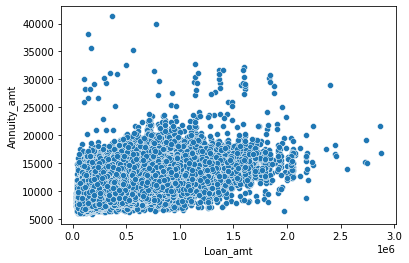

In [642]:
sns.scatterplot(data = full_df[''],x= 'Loan_amt',y='Annuity_amt')

In [637]:
full_df[(full_df['Compensation'].isnull())&(full_df['Annuity_amt'].isnull())].shape

(314, 38)

In [639]:
full_df[(full_df['Experience'].isnull())&(full_df['Annuity_amt'].notnull())].shape

(30111, 38)

In [640]:
full_df[(full_df['Compensation'].isnull())&(full_df['Annuity_amt'].notnull())].shape

(8678, 38)

In [641]:
full_df[(full_df['Compensation'].isnull())&(full_df['Loan_amt'].notnull())].shape

(8992, 38)

In [ ]:
full_df[(full_df['Compensation'].isnull())&(full_df['Loan_amt'].notnull())].shape

In [ ]:
full_df[(full_df['Compensation'].isnull())&(full_df['Annuity_amt'].isnull())].shape

In [636]:
full_df[(full_df['Compensation'].isnull())&(full_df['Experience'].isnull())].shape

(1504, 38)

In [616]:
full_df['Loan_ratio'] = full_df['Loan_amt']/full_df['Compensation']

<AxesSubplot:xlabel='Loan_ratio', ylabel='Count'>

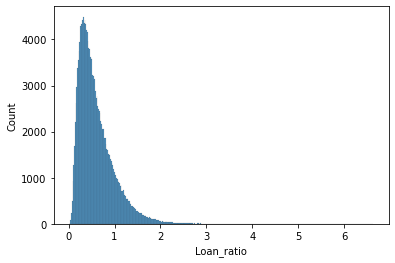

In [618]:
sns.histplot(full_df['Loan_ratio'])

In [627]:
agevloan_ratio_tab = full_df.groupby('Age')['Loan_ratio'].describe()

In [628]:
agevloan_ratio_tab.head()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
21.0,376.0,0.352790,0.243532,0.054081,0.230991,0.296175,0.383667,2.893828
22.0,1097.0,0.437675,0.303634,0.063607,0.240922,0.342095,0.532073,2.503599
23.0,2111.0,0.490522,0.311461,0.037218,0.277665,0.408218,0.618805,4.077476
24.0,2259.0,0.492989,0.319997,0.040870,0.271097,0.409622,0.622447,2.824853
25.0,2405.0,0.503034,0.348886,0.041799,0.268744,0.403267,0.624247,3.207561


In [629]:
agevloan_ratio_tab[['mean','50%','min','max']]

,mean,50%,min,max
Age,,,,
21.0,0.352790,0.296175,0.054081,2.893828
22.0,0.437675,0.342095,0.063607,2.503599
23.0,0.490522,0.408218,0.037218,4.077476
24.0,0.492989,0.409622,0.040870,2.824853
25.0,0.503034,0.403267,0.041799,3.207561
26.0,0.510674,0.419267,0.026995,2.794809
27.0,0.526832,0.439093,0.060100,3.072717
28.0,0.522661,0.434313,0.041891,3.948100
29.0,0.539374,0.445727,0.041917,4.377413


In [630]:
edvloan_ratio_tab = full_df.groupby('Education_det')['Loan_ratio'].describe()

In [631]:
edvloan_ratio_tab

,count,mean,std,min,25%,50%,75%,max
Education_det,,,,,,,,
Grad,127854.0,0.609298,0.397193,0.007007,0.324978,0.508737,0.791002,5.423956
Other,8370.0,0.556323,0.372884,0.032490,0.290721,0.459552,0.718042,3.978938
P_Grad,43984.0,0.583639,0.391207,0.015986,0.307464,0.483815,0.761522,6.634243


In [632]:
full_df['rounded_l_ratio'] = round(full_df['Loan_ratio'],1)

In [634]:
full_df.groupby('Education_det')['rounded_l_ratio'].describe()

,count,mean,std,min,25%,50%,75%,max
Education_det,,,,,,,,
Grad,127854.0,0.609441,0.398180,0.0,0.3,0.5,0.8,5.4
Other,8370.0,0.557049,0.373956,0.0,0.3,0.5,0.7,4.0
P_Grad,43984.0,0.583710,0.392181,0.0,0.3,0.5,0.8,6.6


In [633]:
full_df['rounded_l_ratio'].value_counts()

0.3    26775
0.4    25416
0.5    21315
0.2    20301
0.6    17338
0.7    13861
0.8    11148
0.9     8862
1.0     6911
0.1     6293
1.1     5490
1.2     4112
1.3     3128
1.4     2318
1.5     1644
1.6     1280
1.7      986
1.8      713
1.9      561
2.0      392
2.1      284
2.2      234
2.3      160
2.4      133
2.5      100
2.6       79
0.0       78
2.7       62
2.8       51
3.0       31
2.9       29
3.1       20
3.2       13
3.6       12
3.3       11
3.4       10
3.9        9
3.8        9
3.7        8
4.0        6
3.5        6
4.2        3
4.5        3
4.1        3
4.4        2
4.3        2
5.4        1
4.9        1
6.6        1
4.7        1
6.3        1
5.0        1
Name: rounded_l_ratio, dtype: int64

In [574]:
full_df['Day_Process'].value_counts()

Tue     33036
wed     32023
mon     31345
thur    31171
Fri     31012
SAT     20753
Sun      9860
Name: Day_Process, dtype: int64

In [598]:
day_tab = pd.crosstab(full_df['Day_Process'],full_df['Default'])
day_tab['ndf proportion'] = day_tab[0.0]/(day_tab[0.0]+day_tab[1.0])*100
day_tab['df proportion'] = day_tab[1.0]/(day_tab[0.0]+day_tab[1.0])*100
day_tab.sort_values('ndf proportion')

Default,0.0,1.0,3.0,ndf proportion,df proportion
Day_Process,,,,,
SAT,10582,3907,6264,73.034716,26.965284
thur,16077,5881,9213,73.217051,26.782949
wed,16489,5898,9636,73.654353,26.345647
Tue,17051,6095,9890,73.667156,26.332844
Fri,16003,5698,9311,73.743145,26.256855
mon,16195,5741,9409,73.828410,26.171590
Sun,5039,1784,3037,73.853144,26.146856


C:\Users\AR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Default', ylabel='count'>

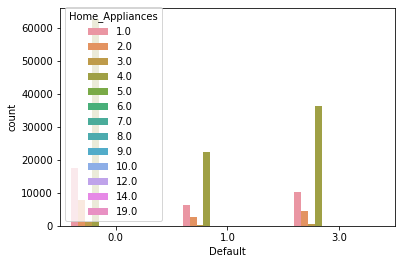

In [371]:
sns.countplot(full_df['Default'],hue=full_df['Home_Appliances'] )

In [372]:
full_df['Product_bought'].value_counts()

3.0     38978
2.0     33090
4.0     29653
1.0     24119
5.0     20927
6.0     13177
0.0     12821
7.0      7421
8.0      4501
9.0      2435
10.0     1209
11.0      593
12.0      210
14.0       15
15.0       13
13.0        8
19.0        6
16.0        5
20.0        4
17.0        4
22.0        3
21.0        2
18.0        2
24.0        1
25.0        1
23.0        1
26.0        1
Name: Product_bought, dtype: int64

In [48]:
df_num['Home_Appliances'].value_counts()

4.0     85306
1.0     24047
2.0     10582
3.0      1483
5.0        31
6.0        15
10.0        3
12.0        2
7.0         2
14.0        2
19.0        1
9.0         1
8.0         1
Name: Home_Appliances, dtype: int64

In [ ]:
# we can cosnider the top 4 categories , 1,2,3,4 & 4+
# also we have to check how 1 & 2 impact the target variable

In [374]:
df_num['Company_Rating'].value_counts()

2.0    89965
3.0    17216
1.0    13528
Name: Company_Rating, dtype: int64

In [373]:
df_num['Dependents'].value_counts()

2.0    68172
1.0    29091
3.0    22725
4.0    10692
5.0     1535
6.0      177
7.0       31
8.0       15
9.0        2
Name: Dependents, dtype: int64

C:\Users\AR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Company_Rating', ylabel='count'>

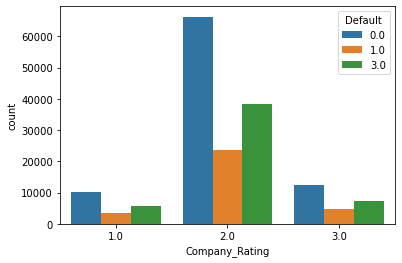

In [375]:
sns.countplot(full_df['Company_Rating'],hue = full_df['Default'])

In [389]:
full_df[full_df['density_Ind']<0.25]['density_Ind'].value_counts().sum()

181504

In [405]:
full_df[full_df['density_Ind']>0.25]['Default']

32007     1.0
77422     0.0
114865    0.0
24515     3.0
41230     3.0
Name: Default, dtype: float64

<AxesSubplot:xlabel='density_Ind', ylabel='Count'>

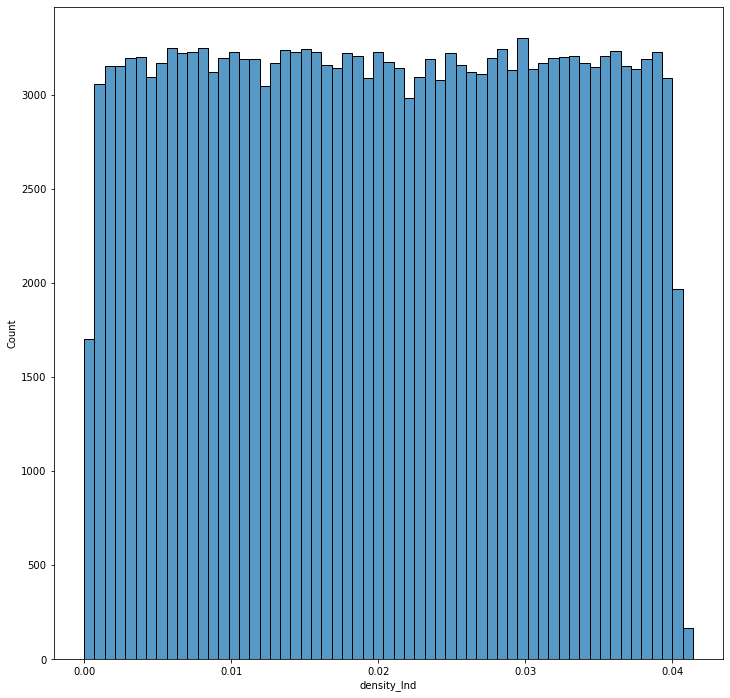

In [391]:
plt.figure(figsize=(12,12))
sns.histplot(full_df[full_df['density_Ind']<0.25]['density_Ind'])

In [1]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.histplot(full_df[(full_df['density_Ind']<0.25)&(full_df['Default'] == 0.0)]['density_Ind'])
plt.subplot(1,2,2)
sns.histplot(full_df[(full_df['density_Ind']<0.25)&(full_df['Default'] == 1.0)]['density_Ind'])

NameError: name 'plt' is not defined

<AxesSubplot:xlabel='density_Ind', ylabel='Count'>

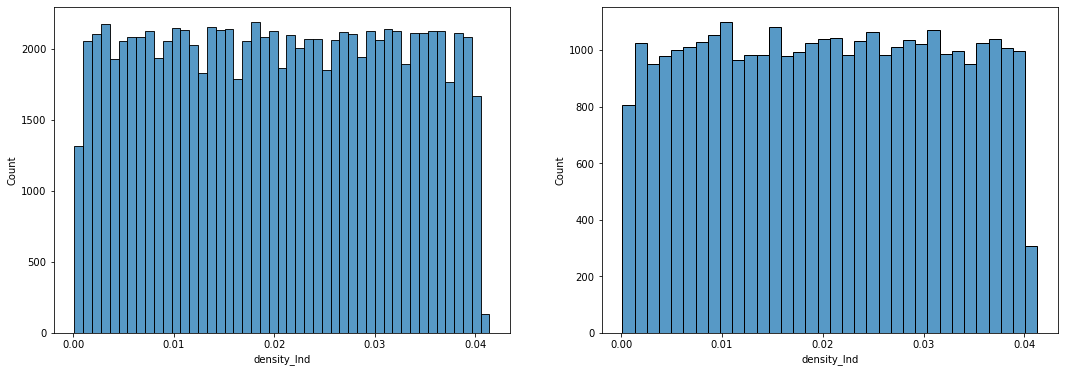

In [404]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.histplot(full_df[(full_df['density_Ind']<0.25)&(full_df['Default'] == 0.0)]['density_Ind'])
plt.subplot(1,2,2)
sns.histplot(full_df[(full_df['density_Ind']<0.25)&(full_df['Default'] == 1.0)]['density_Ind'])

<AxesSubplot:xlabel='Compensation', ylabel='Count'>

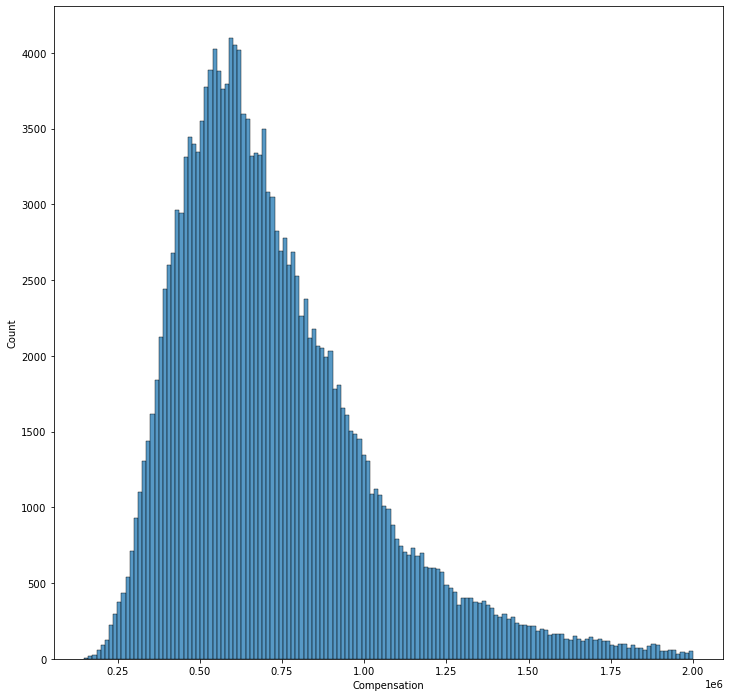

In [410]:
plt.figure(figsize=(12,12))
sns.histplot(full_df[full_df['Compensation']<2000000]['Compensation'])

In [412]:
full_df[full_df['Compensation']>4000000]['Compensation'].count()

146

In [414]:
full_df[full_df['Compensation']>6000000]['Compensation'].count()

54

In [415]:
full_df[full_df['Compensation']>8000000]['Compensation'].count()

20

In [416]:
full_df[full_df['Compensation']>10000000]['Compensation'].count()

11

In [417]:
full_df[full_df['Compensation']>10000000]

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
41308,496277,25707152.0,Y,410945.0,11608.77,0.0231,IT,ndf,One,4.0,Metro,1,P_Grad,Married,F,1_to_3,1.2,Y,Tue,No,CLoan,2.0,2.0,East,53.0,15.0,Yes,No,NaN,0.748,706.0,6.0,0.0
51110,539955,11843720.0,Y,569862.0,12864.73,0.0331,Non-IT,ndf,One,NaN,Metro,2,Grad,Married,F,1_to_3,9.0,Not_Specified,Tue,No,CLoan,2.0,2.0,North,43.0,12.0,Yes,Yes,0.785,0.785,16.0,5.0,1.0
52069,559171,63052885.0,Y,491729.0,14574.52,0.0026,IT,df,None,2.0,Metro,2,Grad,Married,F,1_to_3,13.6,Not_Specified,thur,Yes,CLoan,4.0,2.0,North,43.0,24.0,Yes,Yes,0.200,0.200,1147.0,5.0,0.0
93188,494807,30689828.0,Y,878136.6,NaN,0.0350,Non-IT,ndf,One,4.0,Metro,1,P_Grad,Married,M,1_to_3,23.2,Not_Specified,Fri,Yes,CLoan,2.0,2.0,East,45.0,14.0,Yes,Yes,0.216,0.216,16.0,2.0,1.0
102367,579813,15368408.0,N,523758.0,12386.70,0.0383,IT,ndf,One,NaN,Metro,1,Grad,Married,F,1_to_3,9.1,Not_Specified,Fri,No,CLoan,2.0,NaN,Central,51.0,14.0,No,Yes,NaN,0.641,630.0,5.0,0.0
110210,494319,14653408.0,Y,1024586.8,21899.69,0.0129,Non-IT,ndf,One,4.0,Metro,2,P_Grad,Married,F,1_to_3,3.0,Not_Specified,thur,Yes,CLoan,2.0,1.0,North,51.0,12.0,No,Yes,0.737,0.737,17.0,0.0,0.0
112658,430988,70377021.0,Y,493122.0,15849.59,0.0090,IT,df,None,NaN,Metro,2,Grad,Married,F,1_to_3,13.6,Not_Specified,thur,Yes,CLoan,4.0,2.0,North,43.0,23.0,Yes,Yes,0.814,0.814,1147.0,2.0,1.0
119053,461914,15458134.0,N,618555.0,11473.55,0.0330,IT,ndf,One,NaN,Metro,1,Grad,Married,F,1_to_3,9.1,Not_Specified,Fri,No,CLoan,2.0,2.0,Central,51.0,14.0,No,Yes,0.141,0.141,624.0,3.0,0.0
128429,553768,13241943.0,N,738136.0,14129.79,0.0369,IT,ndf,Morethan_One,NaN,Metro,1,P_Grad,Married,M,1_to_3,5.2,Y,mon,Yes,CLoan,1.0,1.0,East,38.0,7.0,Yes,No,0.360,0.360,333.0,8.0,0.0
17533,452851,17276168.0,Y,1596623.0,30376.29,0.0057,Non-IT,ndf,One,4.0,Metro,1,P_Grad,Single,F,1_to_3,1.0,Y,SAT,Yes,RLoan,1.0,2.0,Central,30.0,13.0,Yes,Yes,0.772,0.772,547.0,4.0,3.0


In [419]:
full_df[full_df['c1_rated'] == full_df['c2_rated']]['ID'].count()

147903

In [420]:
full_df[(full_df['c1_rated'].isnull())&(full_df['c2_rated'].isnull())]['ID'].count()

2555

In [422]:
full_df[(full_df['c1_rated'].isnull())&(full_df['c2_rated'].notnull())]['ID'].count()

22321

In [426]:
full_df[(full_df['c1_rated'].notnull())&(full_df['c2_rated'].isnull())]['ID'].count()

16421

In [429]:
16421 + 2555

18976

In [430]:
22321 + 2555

24876

<AxesSubplot:xlabel='Contact_age', ylabel='Count'>

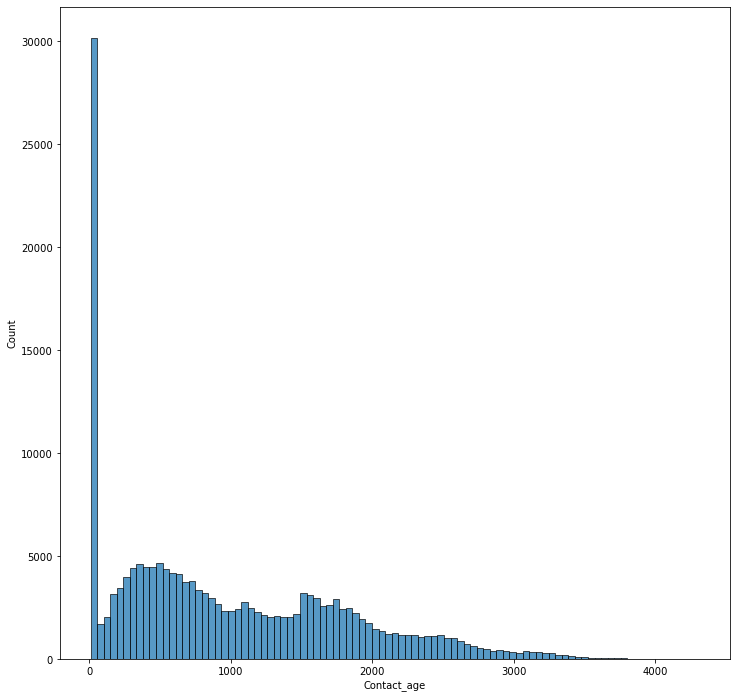

In [432]:

plt.figure(figsize=(12,12))
#sns.histplot(full_df[full_df['Compensation']<2000000]['Compensation'])
sns.histplot(full_df['Contact_age'])

<AxesSubplot:xlabel='Contact_age', ylabel='Count'>

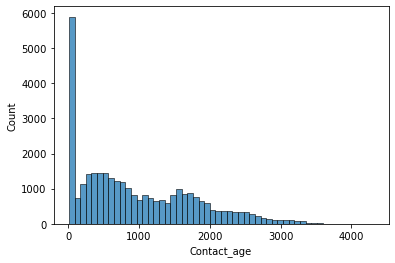

In [433]:
sns.histplot(full_df[full_df['Default'] == 1.0]['Contact_age'])

<AxesSubplot:xlabel='Contact_age', ylabel='Count'>

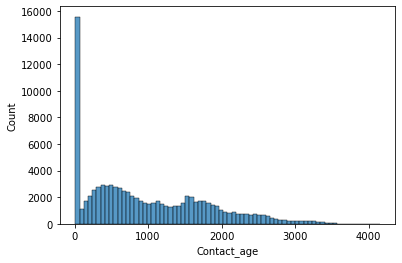

In [434]:
sns.histplot(full_df[full_df['Default'] == 0.0]['Contact_age'])

In [ ]:
pd.crosstab(full_df[''])

In [435]:
full_df['hour_Process'].value_counts()

12.0    20659
11.0    20643
13.0    18961
10.0    18615
14.0    16831
9.0     15642
15.0    14770
16.0    11928
8.0     11626
17.0     8971
7.0      7520
18.0     6110
6.0      4521
19.0     3665
5.0      2657
20.0     1809
4.0      1572
3.0       931
21.0      683
2.0       488
22.0      232
1.0       200
23.0       64
0.0        61
24.0       34
25.0        7
Name: hour_Process, dtype: int64

In [513]:
hours_tab = pd.crosstab(full_df['hour_Process'],full_df['Default'])

In [514]:
hours_tab['ndf proportion'] = hours_tab[0.0]/(hours_tab[0.0]+hours_tab[1.0])*100
hours_tab['df proportion'] = hours_tab[1.0]/(hours_tab[0.0]+hours_tab[1.0])*100

In [516]:
hours_tab.sort_values('ndf proportion')

Default,0.0,1.0,3.0,ndf proportion,df proportion
hour_Process,,,,,
23.0,27,15,22,64.285714,35.714286
7.0,3780,1474,2266,71.945185,28.054815
4.0,810,309,453,72.386059,27.613941
3.0,482,179,270,72.919818,27.080182
0.0,30,11,20,73.170732,26.829268
8.0,5936,2161,3529,73.311103,26.688897
2.0,261,95,132,73.314607,26.685393
11.0,10595,3846,6202,73.367495,26.632505
9.0,8071,2927,4644,73.386070,26.613930


# taking  19 + hours to process an application is beneficial.

In [576]:
# we have to combine the categories by binning




full_df['Region'].value_counts()

North      75956
East       41140
Central    38513
South      33591
Name: Region, dtype: int64

In [591]:
regiont_tab = pd.crosstab(full_df['Region_Type'],full_df['Default'])
regiont_tab['ndf proportion'] = regiont_tab[0.0]/(regiont_tab[0.0]+regiont_tab[1.0])*100
regiont_tab['df proportion'] = regiont_tab[1.0]/(regiont_tab[0.0]+regiont_tab[1.0])*100
regiont_tab.sort_values('ndf proportion')

Default,0.0,1.0,3.0,ndf proportion,df proportion
Region_Type,,,,,
Metro,79070,28478,46048,73.520661,26.479339
Rural,16429,5849,9526,73.745399,26.254601
other,1937,677,1186,74.100995,25.899005


In [581]:
region_tab = pd.crosstab(full_df['Region'],full_df['Default'])
region_tab['ndf proportion'] = region_tab[0.0]/(region_tab[0.0]+region_tab[1.0])*100
region_tab['df proportion'] = region_tab[1.0]/(region_tab[0.0]+region_tab[1.0])*100
region_tab.sort_values('ndf proportion')

Default,0.0,1.0,3.0,ndf proportion,df proportion
Region,,,,,
South,17070,6427,10094,72.647572,27.352428
Central,20055,7172,11286,73.658501,26.341499
East,21086,7529,12525,73.688625,26.311375
North,39225,13876,22855,73.868665,26.131335


In [593]:
region_piot_tab = pd.pivot_table(data = full_df,index = ['Region','Region_Type'],columns = 'Default',aggfunc= 'count',values = 'ID')
region_piot_tab['ndf proportion'] = region_piot_tab[0.0]/(region_piot_tab[0.0]+region_piot_tab[1.0])*100
region_piot_tab['df proportion'] = region_piot_tab[1.0]/(region_piot_tab[0.0]+region_piot_tab[1.0])*100
region_piot_tab.sort_values('ndf proportion')

Default                0.0    1.0    3.0  ndf proportion  df proportion
Region  Region_Type                                                    
South   Metro        13979   5271   8225       72.618182      27.381818
        Rural         2796   1052   1679       72.661123      27.338877
East    Metro        17168   6164  10259       73.581348      26.418652
Central Metro        16148   5782   9129       73.634291      26.365709
        Rural         3470   1241   1923       73.657398      26.342602
North   other          826    294    515       73.750000      26.250000
        Metro        31775  11261  18435       73.833535      26.166465
South   other          295    104    190       73.934837      26.065163
North   Rural         6624   2321   3905       74.052543      25.947457
East    Rural         3539   1235   2019       74.130708      25.869292
        other          379    130    247       74.459725      25.540275
Central other          437    149    234       74.573379      25.426621

In [596]:
ci_tab = pd.crosstab(full_df['Credit_Inq'],full_df['Default'])
ci_tab['ndf proportion'] = ci_tab[0.0]/(ci_tab[0.0]+ci_tab[1.0])*100
ci_tab['df proportion'] = ci_tab[1.0]/(ci_tab[0.0]+ci_tab[1.0])*100
ci_tab.sort_values('ndf proportion')

Default,0.0,1.0,3.0,ndf proportion,df proportion
Credit_Inq,,,,,
1,48971,18101,28703,73.012583,26.987417
2,22327,8035,13030,73.535999,26.464001
>4,6769,2369,3863,74.075290,25.924710
3,17342,5836,9998,74.820951,25.179049


In [597]:
pa_tab = pd.crosstab(full_df['Permanent_Addr_tag'],full_df['Default'])
pa_tab['ndf proportion'] = pa_tab[0.0]/(pa_tab[0.0]+pa_tab[1.0])*100
pa_tab['df proportion'] = pa_tab[1.0]/(pa_tab[0.0]+pa_tab[1.0])*100
pa_tab.sort_values('ndf proportion')

Default,0.0,1.0,3.0,ndf proportion,df proportion
Permanent_Addr_tag,,,,,
No,17425,6399,10160,73.140531,26.859469
Yes,80011,28605,46600,73.664101,26.335899


In [601]:
v_tab = pd.crosstab(full_df['Vehicle_Status'],full_df['Default'])
v_tab['ndf proportion'] = v_tab[0.0]/(v_tab[0.0]+v_tab[1.0])*100
v_tab['df proportion'] = v_tab[1.0]/(v_tab[0.0]+v_tab[1.0])*100
v_tab.sort_values('ndf proportion')

Default,0.0,1.0,3.0,ndf proportion,df proportion
Vehicle_Status,,,,,
N,59721,21649,34721,73.394371,26.605629
Y,31034,10932,18156,73.950341,26.049659


In [607]:
full_df[(full_df['Vehicle_Status'].isnull())&(full_df['Type_Loan']== 'CLoan')&
       (full_df['Job_Type']== 'IT')&(full_df['Region_Type']== 'Metro')&
       (full_df['Education_det']== 'Grad')&(full_df['Marital_Stat']== 'Married')]

,index,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default,laaa,pain
8,8,466413,836238.0,NaN,318034.00,12528.06,0.0368,IT,ndf,One,4.0,Metro,1,Grad,Married,F,1_to_3,7.6,Y,mon,Yes,CLoan,2.0,2.0,South,52.0,12.0,Yes,Yes,0.910,0.910,12.0,4.0,0.0,25.385734,0.179777
347,347,435264,490280.0,NaN,132900.00,NaN,0.0129,IT,ndf,One,4.0,Metro,1,Grad,Married,F,1_to_3,6.7,Not_Specified,mon,No,CLoan,3.0,2.0,East,40.0,7.0,Yes,No,0.183,0.183,NaN,2.0,1.0,NaN,NaN
515,515,442936,747920.0,NaN,168422.50,11463.44,0.0172,IT,ndf,One,4.0,Metro,1,Grad,Married,M,1_to_3,1.8,Not_Specified,Fri,Yes,CLoan,2.0,NaN,East,51.0,11.0,Yes,Yes,0.753,NaN,164.0,2.0,0.0,14.692143,0.183925
599,599,475739,291142.0,NaN,203425.95,9988.40,0.0113,IT,ndf,One,4.0,Metro,1,Grad,Married,F,4_to_6,4.6,Not_Specified,wed,Yes,CLoan,2.0,2.0,East,28.0,11.0,Yes,Yes,0.847,0.847,638.0,4.0,0.0,20.366220,0.411692
771,771,424312,874076.0,NaN,187768.00,10635.59,0.0083,IT,ndf,Morethan_One,1.0,Metro,2,Grad,Married,M,1_to_3,3.3,Not_Specified,Fri,No,CLoan,3.0,2.0,South,36.0,13.0,Yes,No,NaN,0.375,442.0,2.0,0.0,17.654686,0.146014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189123,56683,564508,671384.0,NaN,127368.00,9645.08,0.0275,IT,ndf,One,4.0,Metro,1,Grad,Married,F,1_to_3,16.4,Not_Specified,thur,No,CLoan,2.0,2.0,North,42.0,10.0,Yes,Yes,0.244,0.244,1791.0,0.0,3.0,13.205489,0.172392
189135,56695,412938,829760.0,NaN,698688.00,12785.71,0.0367,IT,df,None,2.0,Metro,1,Grad,Married,M,1_to_3,7.3,Not_Specified,thur,Yes,CLoan,4.0,2.0,East,38.0,5.0,Yes,No,0.881,0.881,1812.0,0.0,3.0,54.646007,0.184907
189138,56698,494055,522614.0,NaN,179484.00,9708.08,NaN,IT,ndf,One,4.0,Metro,>4,Grad,Married,M,1_to_3,11.3,Y,Fri,Yes,CLoan,2.0,NaN,Central,32.0,9.0,Yes,Yes,NaN,0.681,269.0,4.0,3.0,18.488105,0.222912
189148,56708,407666,345496.0,NaN,231728.00,9838.51,NaN,IT,ndf,One,4.0,Metro,1,Grad,Married,M,1_to_3,1.5,Not_Specified,mon,No,CLoan,2.0,3.0,North,40.0,10.0,Yes,No,0.577,0.577,434.0,0.0,3.0,23.553160,0.341718


In [582]:
pd.crosstab(full_df['Region'],full_df['Default'],normalize=True)

Default,0.0,1.0,3.0
Region,,,
Central,0.105999,0.037907,0.059651
East,0.111448,0.039794,0.066200
North,0.207320,0.073340,0.120798
South,0.090222,0.033969,0.053351


In [578]:
full_df['Region_Type'].value_counts()

Metro    153596
Rural     31804
other      3800
Name: Region_Type, dtype: int64

In [585]:
dep_tab = pd.crosstab(full_df['Dependents'],full_df['Default'])
dep_tab['ndf proportion'] = dep_tab[0.0]/(dep_tab[0.0]+dep_tab[1.0])*100
dep_tab['df proportion'] = dep_tab[1.0]/(dep_tab[0.0]+dep_tab[1.0])*100
dep_tab.sort_values('ndf proportion')

Default,0.0,1.0,3.0,ndf proportion,df proportion
Dependents,,,,,
8.0,7,8,2,46.666667,53.333333
9.0,1,1,1,50.000000,50.000000
4.0,7808,2884,4532,73.026562,26.973438
3.0,16676,6049,9632,73.381738,26.618262
1.0,21413,7678,12585,73.606957,26.393043
2.0,50225,17947,29232,73.673942,26.326058
6.0,131,46,81,74.011299,25.988701
7.0,23,8,11,74.193548,25.806452
5.0,1152,383,684,75.048860,24.951140


In [521]:
full_df[(full_df['hour_Process']== 23)&(full_df['Default']== 1.0)].head(70)

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
3507,449890,1719375.0,Y,428226.0,8839.40,0.0295,Non-IT,ndf,Morethan_One,1.0,Metro,2,P_Grad,Married,F,1_to_3,7.6,Not_Specified,mon,Yes,CLoan,2.0,2.0,South,54.0,23.0,Yes,Yes,0.205,0.205,NaN,1.0,1.0
49600,588371,915950.0,Y,188432.0,7781.58,0.0025,IT,ndf,One,4.0,Metro,2,Grad,Married,M,1_to_3,3.2,Y,wed,Yes,CLoan,2.0,2.0,Central,35.0,23.0,No,No,0.108,0.108,527.0,1.0,1.0
59442,427158,639210.0,Y,480742.4,8362.10,0.0298,IT,ndf,One,4.0,Rural,1,P_Grad,Married,M,1_to_3,21.1,NaN,thur,No,CLoan,2.0,2.0,Central,58.0,23.0,Yes,Yes,0.312,0.312,1467.0,1.0,1.0
59678,437558,579345.0,Y,382432.0,10794.64,0.0026,IT,ndf,One,4.0,Metro,1,Grad,Married,M,1_to_3,0.7,Y,Sun,Yes,CLoan,2.0,2.0,South,25.0,23.0,No,No,0.347,0.347,399.0,5.0,1.0
60036,428173,528080.0,N,468582.0,10120.24,0.0231,IT,ndf,One,4.0,Metro,3,P_Grad,Married,M,1_to_3,NaN,Y,thur,Yes,CLoan,2.0,2.0,North,62.0,23.0,Yes,Yes,0.597,0.597,1488.0,3.0,1.0
60341,555459,483315.0,N,245135.0,10177.95,0.0043,NaN,ndf,One,4.0,Metro,1,P_Grad,Married,M,1_to_3,11.3,Y,Tue,No,CLoan,2.0,2.0,East,42.0,23.0,Yes,No,0.723,0.723,767.0,3.0,1.0
64311,559987,284012.0,N,433068.0,10349.63,0.0095,Non-IT,ndf,One,4.0,Metro,1,P_Grad,Married,M,1_to_3,15.1,Y,mon,Yes,CLoan,2.0,2.0,Central,62.0,23.0,Yes,Yes,0.311,NaN,1643.0,1.0,1.0
70475,550114,878520.0,Y,248960.0,11560.46,0.0256,IT,ndf,Morethan_One,1.0,Metro,1,Grad,Married,F,1_to_3,3.9,Not_Specified,thur,No,CLoan,3.0,2.0,North,25.0,23.0,Yes,Yes,0.521,0.521,403.0,0.0,1.0
111380,455095,NaN,N,440068.4,10126.78,0.0121,Non-IT,ndf,One,4.0,Metro,3,Grad,Married,M,1_to_3,NaN,Y,SAT,Yes,CLoan,2.0,1.0,North,61.0,23.0,No,Yes,0.865,0.865,3071.0,6.0,1.0
112658,430988,70377021.0,Y,493122.0,15849.59,0.0090,IT,df,None,NaN,Metro,2,Grad,Married,F,1_to_3,13.6,Not_Specified,thur,Yes,CLoan,4.0,2.0,North,43.0,23.0,Yes,Yes,0.814,0.814,1147.0,2.0,1.0


In [522]:
full_df[(full_df['hour_Process']== 23)&(full_df['Default']== 0.0)].head(70)

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
4321,424386,496314.0,Y,62399.00,7899.97,0.0203,Non-IT,ndf,Morethan_One,1.0,Rural,>4,Other,Married,M,1_to_3,7.3,NaN,wed,No,CLoan,3.0,2.0,Central,27.0,23.0,No,Yes,0.299,0.299,318.0,1.0,0.0
8802,398069,1197320.0,Y,562030.00,10557.10,0.0086,Non-IT,df,None,2.0,Metro,1,Grad,Married,F,1_to_3,10.9,Y,wed,No,CLoan,4.0,1.0,East,58.0,23.0,Yes,Yes,NaN,0.777,3465.0,5.0,0.0
14326,462774,NaN,N,360785.00,11296.70,0.0238,NaN,ndf,One,4.0,Metro,1,Grad,Married,M,1_to_3,0.8,Not_Specified,mon,Yes,CLoan,2.0,2.0,North,36.0,23.0,Yes,No,0.550,0.550,2432.0,2.0,0.0
22378,566161,659452.0,Y,555715.00,11820.36,NaN,IT,ndf,One,4.0,Metro,2,Grad,Married,F,1_to_3,6.3,Y,SAT,Yes,CLoan,2.0,1.0,East,32.0,23.0,Yes,No,0.576,0.576,2359.0,5.0,0.0
25967,509354,906134.0,N,518448.35,6923.60,0.0005,IT,ndf,NaN,NaN,Metro,2,P_Grad,Married,F,1_to_3,12.0,Not_Specified,thur,No,CLoan,2.0,2.0,North,49.0,23.0,Yes,No,0.320,0.320,684.0,3.0,0.0
31456,474926,738760.0,N,1118964.00,16052.68,0.0369,IT,ndf,One,4.0,Metro,3,Grad,Married,F,1_to_3,10.1,Not_Specified,mon,Yes,CLoan,2.0,2.0,North,59.0,23.0,Yes,Yes,NaN,0.682,211.0,6.0,0.0
38173,485455,894216.0,Y,675762.00,10652.20,0.0282,Govt.,ndf,One,4.0,Metro,1,Grad,Married,M,4_to_6,10.4,Not_Specified,wed,No,CLoan,2.0,3.0,South,47.0,23.0,Yes,No,0.334,0.334,454.0,4.0,0.0
38945,446149,493099.0,Y,491308.80,10848.91,0.0293,IT,ndf,Morethan_One,1.0,Metro,1,P_Grad,Married,F,1_to_3,7.0,Not_Specified,Fri,Yes,CLoan,3.0,2.0,East,37.0,23.0,No,Yes,0.724,0.724,NaN,0.0,0.0
40970,535659,706563.0,N,646438.80,8946.61,0.0311,NaN,ndf,One,4.0,Metro,3,Grad,Married,F,1_to_3,NaN,Y,thur,Yes,CLoan,2.0,2.0,North,64.0,23.0,Yes,Yes,0.136,0.136,721.0,1.0,0.0
47684,520091,832280.0,N,209385.60,12776.72,0.0292,Non-IT,df,None,2.0,Metro,1,Grad,Married,F,4_to_6,8.8,Y,Tue,No,CLoan,4.0,2.0,North,35.0,23.0,Yes,Yes,0.264,0.264,2763.0,4.0,0.0


In [527]:
pd.crosstab(full_df['Job_Type'],full_df['Default_hist'])

Default_hist,df,ndf
Job_Type,,
Govt.,3428,33302
IT,9821,85953
Non-IT,4266,37862


In [573]:
age_tab = pd.crosstab(full_df['Age'],full_df['Default'])
age_tab['ndf proportion'] = age_tab[0.0]/(age_tab[0.0]+age_tab[1.0])*100
age_tab['df proportion'] = age_tab[1.0]/(age_tab[0.0]+age_tab[1.0])*100
age_tab.sort_values('ndf proportion')

Default,0.0,1.0,3.0,ndf proportion,df proportion
Age,,,,,
22.0,567,243,357,70.000000,30.000000
23.0,1112,460,654,70.737913,29.262087
27.0,2004,817,1172,71.038639,28.961361
24.0,1190,485,704,71.044776,28.955224
33.0,2384,945,1399,71.613097,28.386903
25.0,1259,493,776,71.860731,28.139269
29.0,2390,934,1429,71.901324,28.098676
30.0,2467,949,1406,72.218970,27.781030
28.0,2587,995,1588,72.222222,27.777778


In [531]:
full_df['laaa'] = full_df['Loan_amt']/full_df['Annuity_amt']

In [532]:
full_df['laaa'].value_counts()

47.627044     1
41.414333     1
24.544412     1
76.591903     1
32.461417     1
             ..
13.009326     1
103.695110    1
79.706162     1
103.941683    1
16.194978     1
Name: laaa, Length: 182626, dtype: int64

<AxesSubplot:xlabel='laaa', ylabel='Count'>

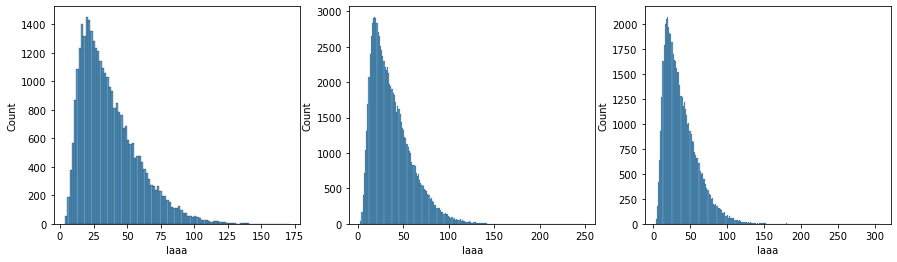

In [533]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
#sns.histplot(full_df[full_df['Compensation']<2000000]['Compensation'])
sns.histplot(full_df[full_df['Default'] == 1.0]['laaa'])
plt.subplot(1,3,2)
#sns.histplot(full_df[full_df['Compensation']<2000000]['Compensation'])
sns.histplot(full_df[full_df['Default'] == 0.0]['laaa'])
plt.subplot(1,3,3)
#sns.histplot(full_df[full_df['Compensation']<2000000]['Compensation'])
sns.histplot(full_df[full_df['Default'] == 3.0]['laaa'])

In [534]:
full_df['pain'] = (12*full_df['Annuity_amt'])/full_df['Compensation']

<AxesSubplot:xlabel='pain', ylabel='Count'>

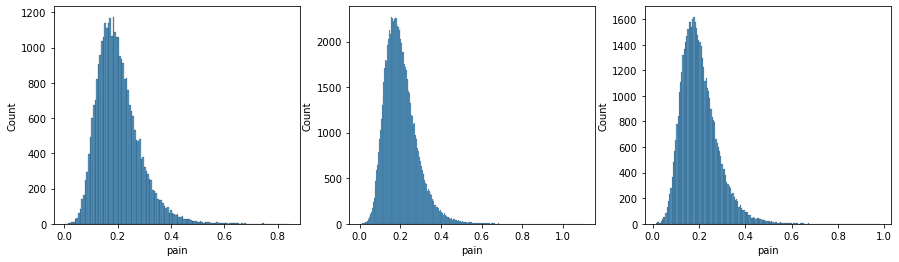

In [535]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
#sns.histplot(full_df[full_df['Compensation']<2000000]['Compensation'])
sns.histplot(full_df[full_df['Default'] == 1.0]['pain'])
plt.subplot(1,3,2)
#sns.histplot(full_df[full_df['Compensation']<2000000]['Compensation'])
sns.histplot(full_df[full_df['Default'] == 0.0]['pain'])
plt.subplot(1,3,3)
#sns.histplot(full_df[full_df['Compensation']<2000000]['Compensation'])
sns.histplot(full_df[full_df['Default'] == 3.0]['pain'])

<AxesSubplot:xlabel='pain', ylabel='Count'>

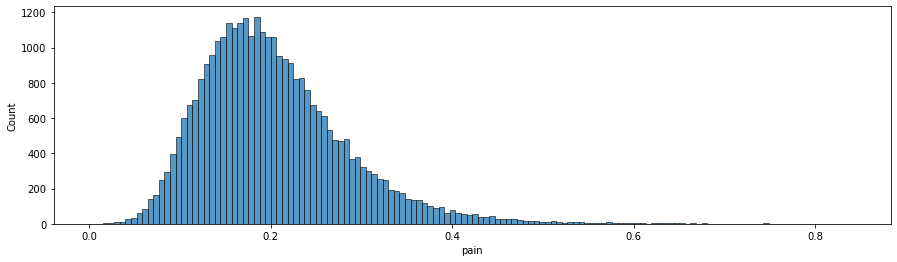

In [536]:
plt.figure(figsize=(15,4))

#sns.histplot(full_df[full_df['Compensation']<2000000]['Compensation'])
sns.histplot(full_df[full_df['Default'] == 1.0]['pain'])

In [537]:
full_df['pain'].min()

0.0027025167774578016

In [538]:
full_df['pain'].max()

1.1030143657170683

In [539]:
full_df[full_df['pain']==full_df['pain'].max()]

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,...,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default,laaa,pain
73406,538658,308025.0,N,116705.0,28313.0,0.0156,NaN,ndf,One,4.0,Metro,1,Grad,Divorce,F,1_to_3,...,Yes,RLoan,1.0,2.0,East,51.0,12.0,Yes,No,0.593,0.593,3088.0,4.0,0.0,4.121958,1.103014


In [544]:
pain_07 = full_df[full_df['pain'] >0.7].sort_values('pain')

In [555]:
pain_07[pain_07['Default']==1]

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default,laaa,pain
67815,459478,215397.0,N,872774.00,12581.79,0.0102,Non-IT,ndf,One,4.0,Rural,3,Grad,Married,M,1_to_3,NaN,Not_Specified,thur,Yes,CLoan,2.0,NaN,East,63.0,19.0,Yes,Yes,0.325,0.325,18.0,1.0,1.0,69.368031,0.700945
10054,396666,203697.0,NaN,454315.75,12075.91,NaN,NaN,ndf,One,4.0,Metro,3,Grad,Married,M,1_to_3,NaN,Not_Specified,Fri,Yes,CLoan,2.0,2.0,North,58.0,14.0,Yes,Yes,0.277,0.277,2270.0,4.0,1.0,37.621657,0.711404
33243,534194,183750.0,N,82982.00,11377.19,0.0151,IT,ndf,One,4.0,Metro,1,Grad,Married,M,1_to_3,13.4,Not_Specified,SAT,Yes,CLoan,2.0,NaN,Central,44.0,8.0,Yes,Yes,0.870,0.870,1386.0,4.0,1.0,7.293717,0.743000
7086,388820,180320.0,N,379253.75,11172.58,0.0050,Govt.,ndf,One,4.0,Metro,3,Grad,Married,M,1_to_3,NaN,Not_Specified,Tue,Yes,CLoan,2.0,1.0,North,57.0,16.0,Yes,Yes,0.705,0.705,NaN,3.0,1.0,33.945047,0.743517
7286,444615,500487.0,N,348198.60,31129.00,0.0274,Govt.,df,None,2.0,Metro,2,Grad,Married,M,1_to_3,14.2,Not_Specified,wed,Yes,CLoan,1.0,2.0,Central,39.0,11.0,Yes,Yes,0.354,0.354,NaN,1.0,1.0,11.185666,0.746369
5559,505227,192400.0,N,492660.00,12211.67,0.0184,Govt.,ndf,One,4.0,Metro,1,Other,Married,M,4_to_6,14.7,NaN,mon,Yes,CLoan,2.0,3.0,Central,52.0,16.0,Yes,Yes,0.321,0.321,2591.0,5.0,1.0,40.343376,0.761643
62789,487572,173985.0,N,204736.00,11295.62,0.0008,IT,ndf,One,4.0,Metro,3,Grad,Married,F,1_to_3,NaN,Not_Specified,Fri,Yes,CLoan,2.0,2.0,North,54.0,8.0,Yes,Yes,0.879,0.879,19.0,4.0,1.0,18.125256,0.779075
45937,480598,196056.0,Y,889032.00,12971.81,0.0138,NaN,ndf,Morethan_One,1.0,Metro,1,Grad,Married,M,1_to_3,1.7,Not_Specified,Fri,Yes,CLoan,3.0,3.0,Central,45.0,5.0,Yes,No,NaN,0.837,1158.0,1.0,1.0,68.535694,0.793966
111879,577043,255204.0,N,90882.00,17047.32,0.0244,Non-IT,ndf,One,4.0,Metro,3,Grad,Married,F,1_to_3,NaN,Not_Specified,Fri,Yes,CLoan,2.0,2.0,North,66.0,8.0,Yes,Yes,0.365,0.365,19.0,0.0,1.0,5.331161,0.801586
66702,568458,170170.0,N,386179.85,11930.45,NaN,IT,ndf,One,4.0,Metro,3,Grad,Married,M,1_to_3,NaN,Not_Specified,thur,Yes,CLoan,2.0,3.0,North,57.0,14.0,Yes,Yes,NaN,0.149,16.0,1.0,1.0,32.369261,0.841308


In [556]:
pain_07[pain_07['Default']==0].sort_values

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default,laaa,pain
31894,416711,152728.0,N,209896.00,8942.01,0.0310,IT,ndf,One,NaN,Metro,3,Grad,Widow,M,1_to_3,NaN,Not_Specified,mon,Yes,CLoan,1.0,2.0,North,59.0,9.0,Yes,Yes,0.400,0.400,20.0,0.0,0.0,23.473022,0.702583
16431,464103,192045.0,N,45962.00,11254.53,0.0154,IT,ndf,One,4.0,Metro,3,Grad,Married,M,1_to_3,NaN,Y,thur,Yes,CLoan,2.0,2.0,North,57.0,8.0,Yes,Yes,NaN,0.178,13.0,4.0,0.0,4.083867,0.703243
30305,485890,232434.0,Y,323220.00,13707.43,0.0349,IT,ndf,Morethan_One,1.0,Metro,1,Grad,Married,F,1_to_3,12.8,Not_Specified,Tue,No,CLoan,3.0,2.0,East,49.0,9.0,Yes,No,0.300,0.300,NaN,6.0,0.0,23.579913,0.707681
90262,531545,166736.0,N,100968.00,10008.01,0.0269,Govt.,ndf,One,4.0,Metro,1,Grad,Married,M,1_to_3,3.6,Not_Specified,Fri,No,CLoan,2.0,2.0,East,52.0,7.0,Yes,No,0.847,0.847,21.0,2.0,0.0,10.088719,0.720277
40275,407749,238243.0,N,870338.00,14414.62,0.0342,IT,ndf,Morethan_One,1.0,Metro,1,Grad,Married,M,1_to_3,8.8,Not_Specified,Tue,Yes,CLoan,3.0,NaN,Central,46.0,8.0,Yes,Yes,0.787,0.787,1102.0,2.0,0.0,60.378838,0.726046
35130,544923,177726.0,N,680240.00,10806.56,0.0332,IT,ndf,One,4.0,Metro,3,Grad,Married,M,1_to_3,NaN,Not_Specified,thur,Yes,CLoan,2.0,2.0,South,65.0,22.0,Yes,Yes,NaN,0.867,1155.0,5.0,0.0,62.946951,0.729655
53875,520337,178432.0,N,120773.10,10973.36,0.0054,Non-IT,ndf,One,4.0,Rural,3,Other,Married,M,1_to_3,NaN,Not_Specified,Fri,Yes,CLoan,2.0,2.0,North,65.0,8.0,No,Yes,0.302,0.302,1431.0,0.0,0.0,11.006027,0.737986
99244,393571,213369.0,Y,398077.75,13135.89,0.0391,IT,ndf,One,4.0,Metro,3,Grad,Married,M,1_to_3,NaN,Not_Specified,mon,Yes,CLoan,2.0,2.0,North,57.0,9.0,Yes,Yes,0.820,0.820,640.0,5.0,0.0,30.304589,0.738770
27299,484028,242712.0,N,130172.00,14963.83,0.0064,Govt.,ndf,One,4.0,Metro,1,Other,Single,F,1_to_3,1.4,Not_Specified,SAT,Yes,RLoan,1.0,2.0,North,42.0,8.0,Yes,Yes,0.836,0.836,285.0,3.0,0.0,8.699110,0.739831
41363,551676,189202.0,Y,166760.00,11843.98,0.0262,Non-IT,ndf,One,NaN,Metro,3,Grad,Married,M,1_to_3,NaN,Not_Specified,thur,Yes,CLoan,2.0,3.0,North,61.0,11.0,Yes,Yes,NaN,0.841,637.0,2.0,0.0,14.079727,0.751196


In [557]:
pain_07[pain_07['Default']==3]

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default,laaa,pain
12329,433048,219636.0,Y,631136.00,12812.99,0.0367,Non-IT,ndf,One,4.0,Metro,3,Grad,Married,M,1_to_3,NaN,Y,mon,Yes,CLoan,2.0,3.0,North,55.0,9.0,Yes,Yes,NaN,0.746,1018.0,4.0,3.0,49.257511,0.700049
25819,526927,217294.0,N,301236.00,12700.14,0.0177,Govt.,df,None,2.0,Metro,3,Grad,Married,F,1_to_3,NaN,NaN,thur,Yes,CLoan,3.0,2.0,North,50.0,12.0,Yes,Yes,0.277,0.277,246.0,3.0,3.0,23.719109,0.701362
55708,586037,200974.0,N,212673.65,11832.41,0.0397,Non-IT,ndf,One,4.0,Metro,3,Other,Married,M,1_to_3,NaN,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,60.0,10.0,Yes,Yes,0.864,0.864,14.0,8.0,3.0,17.973824,0.706504
28387,512093,208148.0,N,128220.00,12500.07,0.0266,IT,ndf,One,4.0,Metro,3,Grad,Married,M,1_to_3,NaN,Not_Specified,thur,Yes,CLoan,2.0,2.0,North,62.0,13.0,Yes,Yes,0.850,0.850,1487.0,3.0,3.0,10.257543,0.720645
11829,465064,209001.0,N,234171.60,12577.28,0.0159,Govt.,df,None,2.0,Metro,1,Grad,Married,M,1_to_3,2.5,Not_Specified,Fri,No,CLoan,4.0,3.0,Central,27.0,7.0,Yes,Yes,0.154,0.154,564.0,3.0,3.0,18.618620,0.722137
32763,456387,181764.0,N,114190.80,11062.35,0.0375,IT,ndf,One,4.0,other,3,Grad,Married,F,1_to_3,NaN,Not_Specified,Fri,Yes,CLoan,2.0,2.0,North,64.0,6.0,Yes,Yes,0.762,0.762,1185.0,4.0,3.0,10.322472,0.730333
35658,551016,264420.0,N,523380.00,17093.62,0.0346,IT,ndf,One,4.0,Metro,3,Grad,Married,M,4_to_6,NaN,Not_Specified,thur,Yes,CLoan,2.0,2.0,North,58.0,14.0,Yes,Yes,0.877,NaN,16.0,5.0,3.0,30.618441,0.775749
2625,391064,205904.0,N,672768.00,13678.11,0.0113,Govt.,df,None,NaN,Rural,1,Grad,Married,M,1_to_3,10.5,Not_Specified,Tue,Yes,CLoan,4.0,3.0,Central,31.0,5.0,Yes,Yes,0.642,0.642,1802.0,1.0,3.0,49.185743,0.797155
842,485143,170660.0,N,369953.60,11651.94,0.0325,NaN,ndf,One,4.0,other,3,Grad,Married,F,1_to_3,10.1,Y,Tue,Yes,CLoan,2.0,3.0,North,64.0,9.0,Yes,Yes,0.712,0.712,14.0,1.0,3.0,31.750387,0.819309
50432,543372,362193.0,N,234206.00,26633.00,0.0387,IT,df,None,NaN,Metro,1,Grad,Married,F,1_to_3,3.4,Not_Specified,thur,Yes,CLoan,4.0,2.0,East,49.0,9.0,Yes,No,0.751,0.751,15.0,4.0,3.0,8.793827,0.882391


In [559]:
pd.crosstab(full_df['Job_Type'],full_df['Home_Appliances'])

Home_Appliances,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,12.0,14.0,19.0
Job_Type,,,,,,,,,,,,,
Govt.,6123,2733,387,24489,11,3,2,0,0,0,0,0,1
IT,17801,7843,1114,60959,20,12,1,2,1,2,2,1,1
Non-IT,7733,3374,498,27001,10,2,0,0,0,1,0,1,0


In [549]:
full_df['Type_Loan'].value_counts()

CLoan    171372
RLoan     17828
Name: Type_Loan, dtype: int64

In [550]:
pd.crosstab(full_df['Type_Loan'],full_df['Default'])

Default,0.0,1.0,3.0
Type_Loan,,,
CLoan,88135,31793,51444
RLoan,9301,3211,5316


In [523]:
pd.crosstab(full_df['Job_Type'],full_df['Default'])

Default,0.0,1.0,3.0
Job_Type,,,
Govt.,18848,6874,11008
IT,49215,17767,28792
Non-IT,21796,7692,12640


In [524]:
18848/6874

2.741926098341577

In [525]:
49215/17767

2.770023076490122

In [526]:
21796/7692

2.8335933437337495

<AxesSubplot:xlabel='hour_Process', ylabel='Count'>

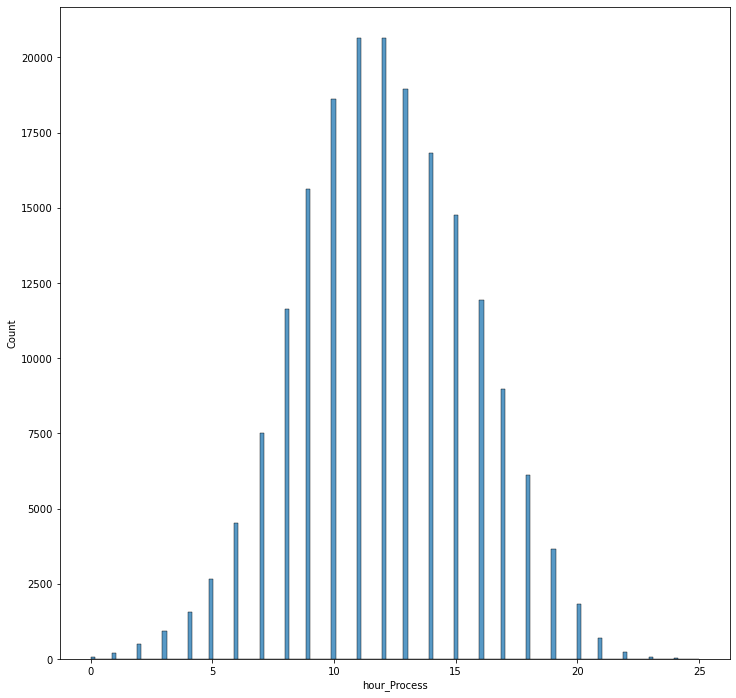

In [436]:

plt.figure(figsize=(12,12))
#sns.histplot(full_df[full_df['Compensation']<2000000]['Compensation'])
sns.histplot(full_df['hour_Process'])

<AxesSubplot:xlabel='hour_Process', ylabel='Count'>

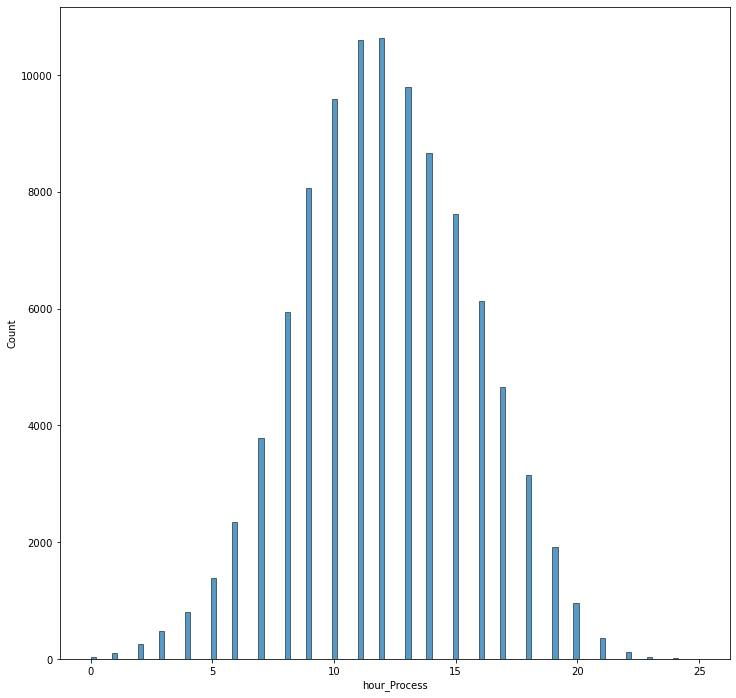

In [438]:

plt.figure(figsize=(12,12))
#sns.histplot(full_df[full_df['Compensation']<2000000]['Compensation'])
sns.histplot(full_df[full_df['Default'] == 0.0]['hour_Process'])

<AxesSubplot:xlabel='hour_Process', ylabel='Count'>

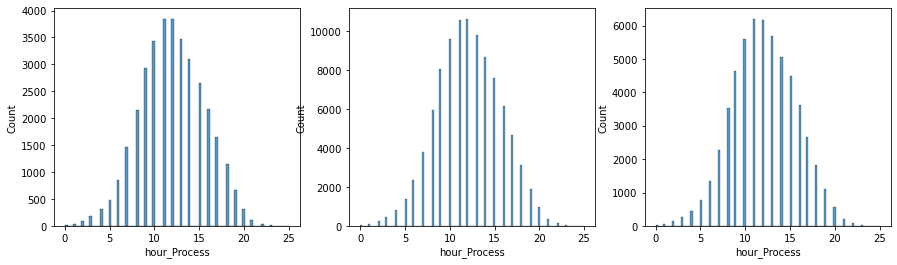

In [446]:

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
#sns.histplot(full_df[full_df['Compensation']<2000000]['Compensation'])
sns.histplot(full_df[full_df['Default'] == 1.0]['hour_Process'])
plt.subplot(1,3,2)
#sns.histplot(full_df[full_df['Compensation']<2000000]['Compensation'])
sns.histplot(full_df[full_df['Default'] == 0.0]['hour_Process'])
plt.subplot(1,3,3)
#sns.histplot(full_df[full_df['Compensation']<2000000]['Compensation'])
sns.histplot(full_df[full_df['Default'] == 3.0]['hour_Process'])

<AxesSubplot:xlabel='hour_Process', ylabel='Count'>

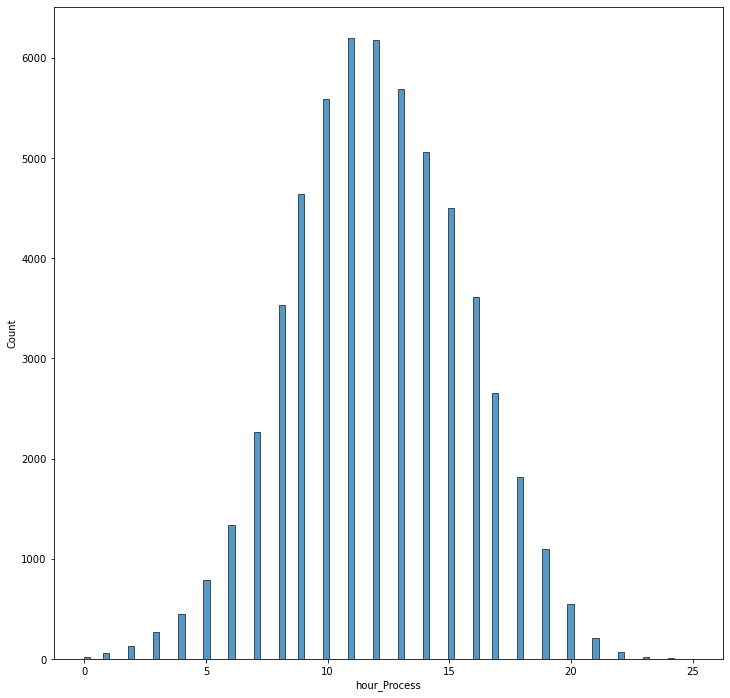

In [441]:

plt.figure(figsize=(12,12))
plt.subplot(1,2,2)
#sns.histplot(full_df[full_df['Compensation']<2000000]['Compensation'])
sns.histplot(full_df[full_df['Default'] == 3.0]['hour_Process'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

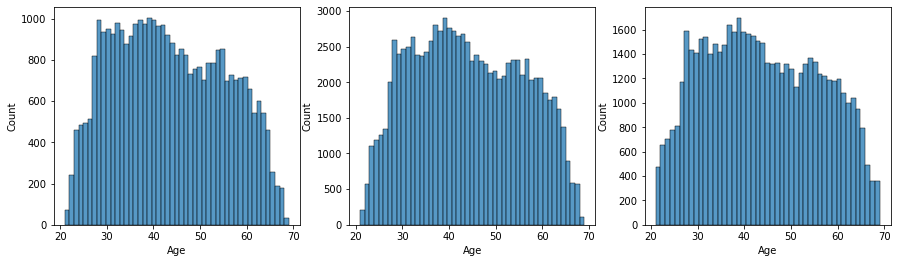

In [463]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
#sns.histplot(full_df[full_df['Compensation']<2000000]['Compensation'])
sns.histplot(full_df[full_df['Default'] == 1.0]['Age'],bins=49)
plt.subplot(1,3,2)
#sns.histplot(full_df[full_df['Compensation']<2000000]['Compensation'])
sns.histplot(full_df[full_df['Default'] == 0.0]['Age'],bins=49)
plt.subplot(1,3,3)
#sns.histplot(full_df[full_df['Compensation']<2000000]['Compensation'])
sns.histplot(full_df[full_df['Default'] == 3.0]['Age'])

In [464]:
print(full_df[full_df['Default'] == 1.0]['Age'].skew())
print(full_df[full_df['Default'] == 0.0]['Age'].skew())
print(full_df[full_df['Default'] == 3.0]['Age'].skew())

0.15028558362441086
0.10679909981065933
0.1189235587299446


In [465]:
print(full_df[full_df['Default'] == 1.0]['Age'].mean())
print(full_df[full_df['Default'] == 0.0]['Age'].mean())
print(full_df[full_df['Default'] == 3.0]['Age'].mean())

43.47000342817964
44.099685947699
43.94432699083862


In [468]:
from scipy import stats

In [499]:
a = full_df[full_df['Default'] == 1.0]['Age']
b = full_df[full_df['Default'] == 0.0]['Age']
c = full_df[full_df['Default'] == 3.0]['Age']

stats.f_oneway(a,b,c)

F_onewayResult(statistic=35.675807168967545, pvalue=3.2293465589228866e-16)

<AxesSubplot:xlabel='Default', ylabel='Age'>

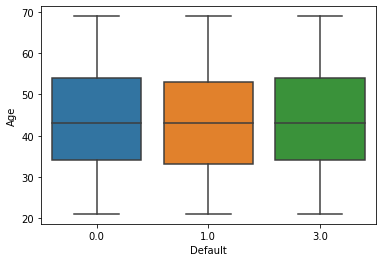

In [505]:
sns.boxplot(y = full_df['Age'],x=full_df['Default'])

In [506]:
stats.bartlett(a,b,c)

BartlettResult(statistic=0.2255126636031426, pvalue=0.8933683190454941)

In [467]:
print(full_df[full_df['Default'] == 1.0]['Age'].median())
print(full_df[full_df['Default'] == 0.0]['Age'].median())
print(full_df[full_df['Default'] == 3.0]['Age'].median())

43.0
43.0
43.0


In [469]:
print(full_df[full_df['Default'] == 1.0]['Age'].std())
print(full_df[full_df['Default'] == 0.0]['Age'].std())
print(full_df[full_df['Default'] == 3.0]['Age'].std())

11.961569732329322
11.958786735520514
11.979557098883323


In [500]:
print(full_df[full_df['Default'] == 1.0]['Age'].var())
print(full_df[full_df['Default'] == 0.0]['Age'].var())
print(full_df[full_df['Default'] == 3.0]['Age'].var())

143.07915046137697
143.0125801856614
143.5097882854058


In [457]:
full_df[(full_df['Age']<40)&(full_df['Age']>20)
       &(full_df['Default']==1.0)]['Age'].value_counts().sort_index()

21.0      74
22.0     243
23.0     460
24.0     485
25.0     493
26.0     515
27.0     817
28.0     995
29.0     934
30.0     949
31.0     925
32.0     980
33.0     945
34.0     877
35.0     913
36.0     974
37.0     991
38.0     974
39.0    1004
Name: Age, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

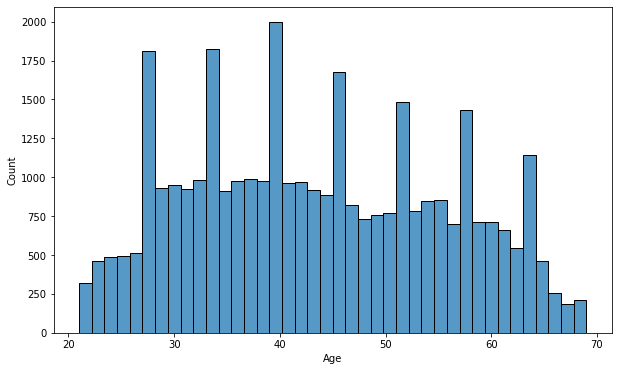

In [450]:
plt.figure(figsize=(10,6))
sns.histplot(full_df[full_df['Default'] == 1.0]['Age'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

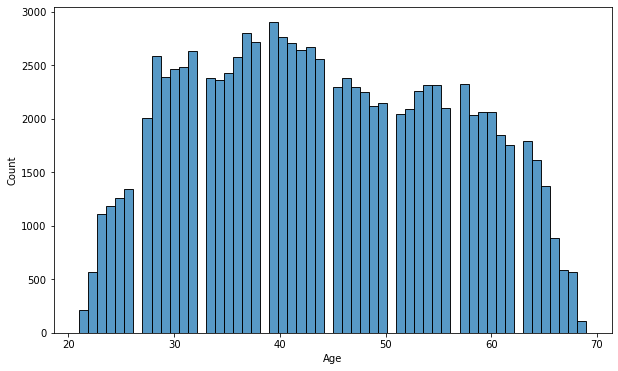

In [451]:
plt.figure(figsize=(10,6))
sns.histplot(full_df[full_df['Default'] == 0.0]['Age'])

<AxesSubplot:xlabel='Experience', ylabel='Count'>

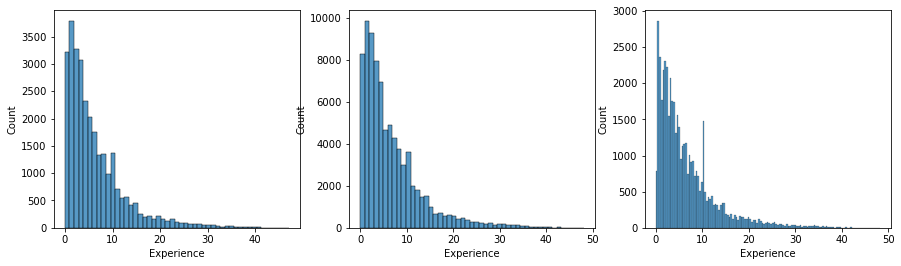

In [471]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
#sns.histplot(full_df[full_df['Compensation']<2000000]['Compensation'])
sns.histplot(full_df[full_df['Default'] == 1.0]['Experience'],bins=49)
plt.subplot(1,3,2)
#sns.histplot(full_df[full_df['Compensation']<2000000]['Compensation'])
sns.histplot(full_df[full_df['Default'] == 0.0]['Experience'],bins=49)
plt.subplot(1,3,3)
#sns.histplot(full_df[full_df['Compensation']<2000000]['Compensation'])
sns.histplot(full_df[full_df['Default'] == 3.0]['Experience'])

<AxesSubplot:ylabel='Density'>

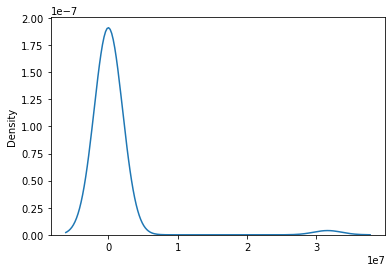

In [496]:
sns.kdeplot(l)

In [470]:
full_df.describe()

,ID,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Default
count,189200.000000,1.802080e+05,1.892000e+05,182626.000000,181509.000000,173477.000000,158004.000000,189200.000000,172416.000000,189200.000000,189200.000000,164324.000000,170224.000000,177525.000000,189200.000000,189200.000000
mean,489003.885650,7.442304e+05,4.147297e+05,10841.400309,0.020452,3.220830,6.583515,2.154075,2.029933,43.936580,12.066395,0.505772,0.506173,977.163160,3.391321,1.085011
std,58535.577453,4.442487e+05,2.750705e+05,2061.154305,0.015611,1.241502,6.335341,0.909041,0.504140,11.967729,3.562959,0.268588,0.268595,828.403262,2.173631,1.306817
min,387652.000000,1.483300e+05,3.427500e+04,5852.100000,0.000000,1.000000,0.000000,1.000000,1.000000,21.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000
25%,438319.500000,5.172465e+05,2.042660e+05,9346.677500,0.010400,2.000000,2.100000,2.000000,2.000000,34.000000,10.000000,0.268000,0.268000,287.000000,2.000000,0.000000
50%,488950.500000,6.661875e+05,3.493610e+05,10768.665000,0.020300,4.000000,4.600000,2.000000,2.000000,43.000000,12.000000,0.500000,0.500000,769.000000,3.000000,0.000000
75%,539701.250000,8.787985e+05,5.586600e+05,12158.097500,0.030400,4.000000,9.000000,3.000000,2.000000,54.000000,15.000000,0.769000,0.769000,1586.000000,5.000000,3.000000
max,590407.000000,7.037702e+07,2.872142e+06,41301.000000,2.037200,19.000000,48.100000,9.000000,3.000000,69.000000,25.000000,0.947000,0.947000,4309.000000,26.000000,3.000000


In [394]:
full_df[full_df['density_Ind']<0.25]['density_Ind'].var()

0.00013364190483185835

In [395]:
full_df[full_df['density_Ind']<0.25]['density_Ind'].skew()

0.002417095963935242

In [396]:
full_df[full_df['density_Ind']<0.25]['density_Ind'].kurt()

-1.2024277336686602

In [ ]:
full_df[full_df['density_Ind']<0.25]

In [376]:
pd.crosstab(full_df['Company_Rating'],full_df['Default'])

Default,0.0,1.0,3.0
Company_Rating,,,
1.0,10153,3375,5879
2.0,66266,23699,38476
3.0,12453,4763,7352


In [377]:
10153/3375

3.0082962962962965

In [378]:
66266/23699

2.796151736360184

In [379]:
12453/4763

2.614528658408566

In [380]:
10153/(10153+3375)

0.7505174452986398

In [381]:
66266/(66266+23699)

0.7365753348524426

In [382]:
12453/(12453+4763)

0.7233387546468402

In [ ]:
# 'Product_bought' column has to be taken care of to reduce dimensionality

In [59]:
df_num['Company_Rating'].value_counts()

2.0    89965
3.0    17216
1.0    13528
Name: Company_Rating, dtype: int64

In [61]:
df_num.isnull().sum().reset_index().rename(columns={'index':'features',0:'missing count'})

,features,missing count
0,ID,0
1,Compensation,6242
2,Loan_amt,0
3,Annuity_amt,4611
4,density_Ind,5416
5,Home_Appliances,10964
6,Experience,21845
7,Dependents,0
8,Company_Rating,11731
9,Age,0


## the most important thing is how are we going to fill the null values with ultra logical imputations
### points to remember:
#### 1. compare it with other categorical featues and check the average, deviation and range.
#### 2. after selecting multiple categorical featrues the numerical data point will reveal it's nature.
#### 3. To fill categorical make use of target and start with the one that has the least null value
#### 4. while looking for ways to fill missing values use the features that make sense and gives maximum explainability

In [50]:
df_num[['Compensation','Loan_amt']].head()

,Compensation,Loan_amt
0,801850.0,658040.0
1,884222.0,198075.0
2,284120.0,101056.0
3,341874.0,179008.0
4,1259895.0,573715.0


<AxesSubplot:xlabel='Compensation', ylabel='Loan_amt'>

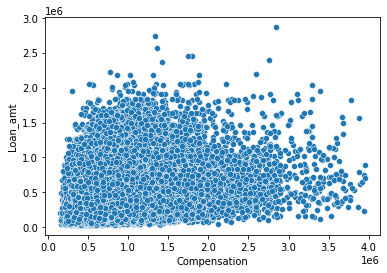

In [54]:
sns.scatterplot(data = df1[df1['Compensation']< 4000000],x= 'Compensation',y='Loan_amt')

In [57]:
df_num.corr()[df_num.corr()>0.3]

,ID,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Default
ID,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Compensation,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Loan_amt,NaN,NaN,1.000000,0.487726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annuity_amt,NaN,NaN,0.487726,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
density_Ind,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Home_Appliances,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.330201,NaN,NaN,NaN,NaN,NaN,NaN
Experience,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.329404,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Company_Rating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,NaN,NaN,NaN,NaN,NaN,0.330201,0.329404,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
nullpercent

,features,missing count
0,ID,0.000000
27,Permanent_Addr_tag,0.000000
26,Addr_permanent,0.000000
25,hour_Process,0.000000
24,Age,0.000000
23,Region,0.000000
21,Dependents,0.000000
20,Type_Loan,0.000000
19,Ph.No,0.000000
18,Day_Process,0.000000


In [85]:
full_df.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,Metro,1,Grad,Married,F,1_to_3,0.9,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,Metro,2,Grad,Married,M,1_to_3,3.0,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,46.0,12.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,Metro,3,Other,Married,M,1_to_3,NaN,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,57.0,5.0,Yes,Yes,0.538,0.538,281.0,4.0,0.0
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,Metro,1,Grad,Married,M,1_to_3,4.7,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,39.0,12.0,Yes,Yes,NaN,0.561,20.0,4.0,0.0
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,Rural,2,Grad,Married,F,4_to_6,6.9,Y,Sun,Yes,CLoan,3.0,1.0,North,32.0,16.0,Yes,Yes,NaN,0.200,2339.0,6.0,0.0


C:\Users\AR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


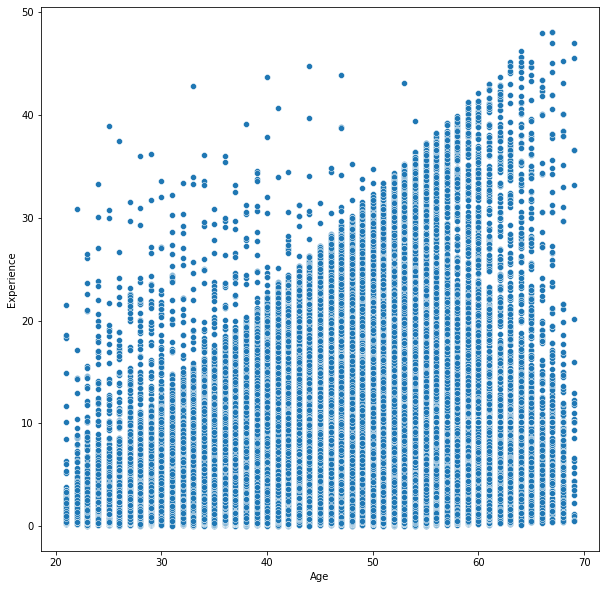

In [87]:
plt.figure(figsize=(10,10))
sns.scatterplot(full_df['Age'],full_df['Experience'])
plt.show()

In [ ]:
# this is were we have to use out brain we have to split the above into smaller chunks to approximate the missing values.
# features that help or closely related to Experince.
# salary increases with experience
# education  vs experience 
# `

In [ ]:
# find the aveage with each age(w.r.t Education_det) value and fill it.
# 

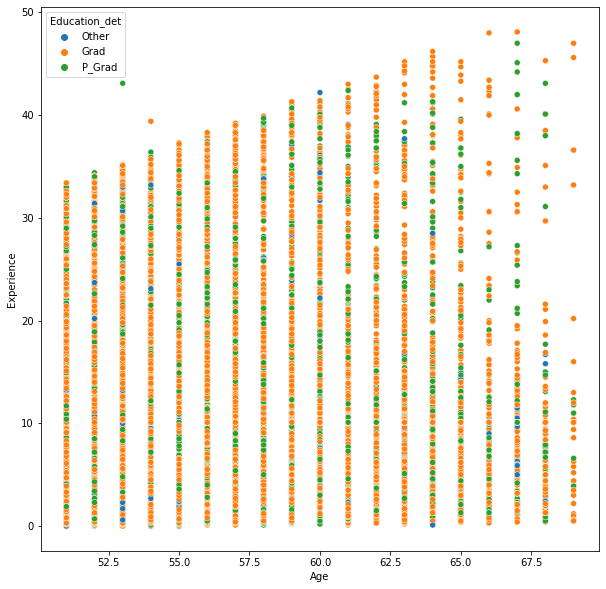

In [92]:
plt.figure(figsize=(10,10))
sns.scatterplot(data = full_df[full_df['Age'] > 50],x='Age',y='Experience',hue = 'Education_det')
plt.show()

In [ ]:
# how can someone be older with less than 10 years of experience

In [93]:
pd.crosstab(full_df['Experience'],full_df['Default'])

Default,0.0,1.0,3.0
Experience,,,
0.0,18,7,12
0.1,62,20,43
0.2,221,71,99
0.3,1077,426,626
0.4,1112,450,659
...,...,...,...
45.7,2,0,0
46.2,1,0,0
47.0,0,1,1


In [94]:
#full_df[full_df['Experience'].isnull()]['Age'].value_counts()

In [95]:
full_df['Prop_List'].value_counts()

One             130781
Morethan_One     36942
None             18601
Name: Prop_List, dtype: int64

In [96]:
full_df.head(1)

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,Metro,1,Grad,Married,F,1_to_3,0.9,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0


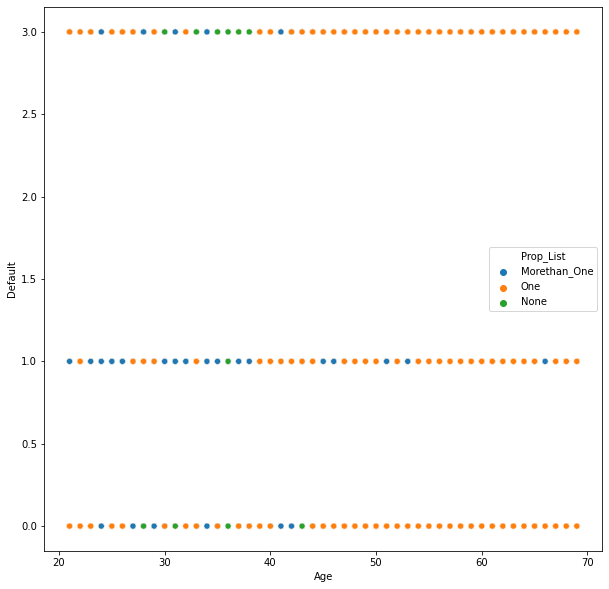

In [97]:
plt.figure(figsize=(10,10))
sns.scatterplot(data = full_df,x='Age',y='Default',hue = 'Prop_List')
plt.show()

In [657]:
age = np.unique(full_df['Age'])

In [697]:
l1= []
l2 = []
l3 = []
l4 = []
a = 0
b = 0
e,g,h = 0,0,0
for i in age:
    if i
    a = full_df[(full_df['Age'] == i)&(full_df['Prop_List'] == 'Morethan_One')]['Default'].value_counts().reset_index().sort_values('index').iloc[0,1]
    b = full_df[(full_df['Age'] == i)&(full_df['Prop_List'] == 'Morethan_One')]['Default'].value_counts().reset_index().sort_values('index').iloc[1,1]
    d = full_df[(full_df['Age'] == i)&(full_df['Prop_List'] == 'One')]['Default'].value_counts().reset_index().sort_values('index').iloc[0,1]
    e = full_df[(full_df['Age'] == i)&(full_df['Prop_List'] == 'One')]['Default'].value_counts().reset_index().sort_values('index').iloc[1,1]    
    g = full_df[(full_df['Age'] == i)&(full_df['Prop_List'] == 'None')]['Default'].value_counts().reset_index().sort_values('index').iloc[0,1]
    h = full_df[(full_df['Age'] == i)&(full_df['Prop_List'] == 'None')]['Default'].value_counts().reset_index().sort_values('index').iloc[1,1]
    c = b/(a+b)
    f = e/(d+e)
    j = h/(g+h)                                                                                                                                             
    l1.append(i)
    l2.append(c)
    l3.append(f)
    l4.append(j)                                                                                                                                         

In [732]:
def probability(column):
    vals = np.unique(full_df[column])
    l = []
    l1 = []
    for i in vals:
        good = full_df[full_df['Age'] == i]['Default'].value_counts().reset_index().sort_values('index').iloc[0,1]
        bad = full_df[full_df['Age'] == i]['Default'].value_counts().reset_index().sort_values('index').iloc[1,1]
        fin = bad/(good+bad)
        l.append(i)
        l2.append(fin)
    finnal = pd.DataFrame({'index':l,'prob':l2})

In [734]:
#pd.crosstab(full_df['Age'],full_df['Default'])

In [742]:
vals = np.unique(full_df['Age'])
l = []
l1 = []
for i in vals:
    good = full_df[full_df['Age'] == i]['Default'].value_counts().reset_index().sort_values('index').iloc[0,1]
    bad = full_df[full_df['Age'] == i]['Default'].value_counts().reset_index().sort_values('index').iloc[1,1]
    fin = bad/(good+bad)
    l.append(i)
    l1.append(fin)
finnal = pd.DataFrame({'index':l,'prob':l1})

In [744]:
finnal.sort_values('prob')

,index,prob
45,66.0,0.224739
48,69.0,0.227586
41,62.0,0.236063
36,57.0,0.237971
47,68.0,0.238926
46,67.0,0.239382
27,48.0,0.245479
35,56.0,0.249732
42,63.0,0.250733
44,65.0,0.251094


In [784]:
job_type_prob

,index,prob
0,IT,0.265250
1,Non-IT,0.260852
2,Govt.,0.267242


In [786]:
proplist_prob

,index,prob
0,One,0.263273
1,Morethan_One,0.266914
2,None,0.264593


In [788]:
region_type_prob

,index,prob
0,Metro,0.264793
1,Rural,0.262546
2,other,0.258990


In [791]:
credit_inq_prob

,index,prob
0,1,0.269874
1,2,0.264640
2,3,0.251790
3,>4,0.259247


In [793]:
edu_prob

,index,prob
0,Grad,0.268523
1,P_Grad,0.250855
2,Other,0.270857


In [795]:
marital_stat_prob

,index,prob
0,Married,0.264433
1,Single,0.266833
2,Divorce,0.258968
3,Widow,0.261659


In [797]:
credit_links_prob

,index,prob
0,1_to_3,0.262806
1,4_to_6,0.279169
2,>6,0.252116


In [799]:
day_Process_prob

,index,prob
0,Tue,0.263328
1,wed,0.263456
2,mon,0.261716
3,thur,0.267829
4,Fri,0.262569
5,SAT,0.269653
6,Sun,0.261469


In [801]:
region_prob

,index,prob
0,North,0.261313
1,East,0.263114
2,Central,0.263415
3,South,0.273524


In [810]:
depen_prob

,index,prob
0,2.0,0.263261
1,1.0,0.263930
2,3.0,0.266183
3,4.0,0.269734
4,5.0,0.249511
5,6.0,0.259887
6,7.0,0.258065
7,8.0,0.533333
8,9.0,0.500000


In [812]:
com_rat_prob

,index,prob
0,2.0,0.263425
1,3.0,0.276661
2,1.0,0.249483


In [815]:
process_h_prob

,index,prob
0,12.0,0.265415
1,11.0,0.266325
2,13.0,0.262147
3,10.0,0.264168
4,14.0,0.263109
5,9.0,0.266139
6,15.0,0.258105
7,16.0,0.261879
8,8.0,0.266889
9,17.0,0.262666


In [2]:
age_prob.sort_values('prob')

NameError: name 'age_prob' is not defined

In [817]:
age_prob.sort_values('prob')

,index,prob
0,39.0,0.256909
1,37.0,0.260927
2,40.0,0.264236
3,38.0,0.263957
4,41.0,0.261911
5,28.0,0.277778
6,42.0,0.268218
7,32.0,0.271243
8,43.0,0.255710
9,36.0,0.274289


In [816]:
k = 'Age'
vals = full_df[k].value_counts().index
l = []
l1 = []
for i in vals:
    good = full_df[full_df[k] == i]['Default'].value_counts().reset_index().sort_values('index').iloc[0,1]
    bad = full_df[full_df[k] == i]['Default'].value_counts().reset_index().sort_values('index').iloc[1,1]
    fin = bad/(good+bad)
    l.append(i)
    l1.append(fin)
age_prob = pd.DataFrame({'index':l,'prob':l1})

In [804]:
num_cat = ['Home_Appliances','Dependents','Company_Rating','Product_bought','hour_Process']

In [805]:
num_cat
# out of bound
# home
# product

['Home_Appliances',
 'Dependents',
 'Company_Rating',
 'Product_bought',
 'hour_Process']

# 
vehicle_stats_prob

In [782]:
non_binary_cat

['Job_Type',
 'Prop_List',
 'Region_Type',
 'Credit_Inq',
 'Education_det',
 'Marital_Stat',
 'Credit_Lnks',
 'Day_Process',
 'Region']

In [762]:
binary_cat

['Vehicle_Status',
 'Default_hist',
 'Gen',
 'Income_Alt',
 'Ph.No',
 'Type_Loan',
 'Addr_permanent',
 'Permanent_Addr_tag']

In [764]:
vehicle_stats_prob

,index,prob
0,N,0.266056
1,Y,0.260497


In [766]:
default_hist_prob

,index,prob
0,ndf,0.264219
1,df,0.265034


In [769]:
gen_prob

,index,prob
0,M,0.259467
1,F,0.273575


In [1047]:
i  = gen_prob
((max(i.iloc[0,1],i.iloc[1,1]))-(min(i.iloc[0,1],i.iloc[1,1])))*100

1.4107436156901354

In [771]:
alt_income_prob

,index,prob
0,Not_Specified,0.265660
1,Y,0.261071


In [1046]:
i  = alt_income_prob
((max(i.iloc[0,1],i.iloc[1,1]))-(min(i.iloc[0,1],i.iloc[1,1])))*100

0.4588454695859778

In [773]:
phno_prob

,index,prob
0,Yes,0.262176
1,No,0.272796


In [1045]:
i  = phno_prob
((max(i.iloc[0,1],i.iloc[1,1]))-(min(i.iloc[0,1],i.iloc[1,1])))*100

1.06196496663446

In [777]:
loan_type_prob

,index,prob
0,CLoan,0.265101
1,RLoan,0.256634


In [1044]:
i  = loan_type_prob
((max(i.iloc[0,1],i.iloc[1,1]))-(min(i.iloc[0,1],i.iloc[1,1])))*100

0.8467095389373458

In [779]:
perm_add_prob

,index,prob
0,Yes,0.262093
1,No,0.290369


In [1042]:
i  = perm_add_prob
((max(i.iloc[0,1],i.iloc[1,1]))-(min(i.iloc[0,1],i.iloc[1,1])))*100

2.827662245524032

In [1049]:
df.groupby(['Addr_permanent','Permanent_Addr_tag'])['Default'].count()

Addr_permanent  Permanent_Addr_tag
No              No                      3136
                Yes                    11525
Yes             No                     30848
                Yes                   143691
Name: Default, dtype: int64

In [1069]:
eleven.to_csv('eleven.csv')

In [1067]:
eleven = pd.pivot_table(data = df,index = ['Gen','Credit_Lnks','Marital_Stat','Type_Loan','Region','Addr_permanent','Permanent_Addr_tag','Ph.No','Education_det','Region_Type','Default_hist'],columns = 'Default',aggfunc= 'count',values = 'Age')

In [1059]:
pd.crosstab(df['Region'],df['Region_Type'])

Region_Type,Metro,Rural,other
Region,,,
Central,31059,6634,820
East,33591,6793,756
North,61471,12850,1635
South,27475,5527,589


In [1071]:
el = pd.read_csv('eleven.csv')

In [1085]:
df.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,Contact_age,Product_bought,Default,c_score,c_cat
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,Metro,1,Grad,Married,F,1_to_3,0.9,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,18.0,2.0,1.0,0.077,LCS
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,Metro,2,Grad,Married,M,1_to_3,3.0,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,46.0,12.0,Yes,Yes,306.0,4.0,0.0,0.184,LCS
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,Metro,3,Other,Married,M,1_to_3,NaN,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,57.0,5.0,Yes,Yes,281.0,4.0,0.0,0.538,HCS
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,Metro,1,Grad,Married,M,1_to_3,4.7,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,39.0,12.0,Yes,Yes,20.0,4.0,0.0,0.561,HCS
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,Rural,2,Grad,Married,F,4_to_6,6.9,Y,Sun,Yes,CLoan,3.0,1.0,North,32.0,16.0,Yes,Yes,2339.0,6.0,0.0,0.200,LCS


In [1103]:
k = el.iloc[0,:-3]

In [1104]:
a = k.index
b = k.values
dic = {a:b for a,b in zip(k.index,k.values)}

In [1105]:
dic

{'Gen': 'F',
 'Credit_Lnks': '1_to_3',
 'Marital_Stat': 'Divorce',
 'Type_Loan': 'CLoan',
 'Region': 'Central',
 'Addr_permanent': 'No',
 'Permanent_Addr_tag': 'No',
 'Ph.No': 'No',
 'Education_det': 'Grad',
 'Region_Type': 'Metro',
 'Default_hist': 'ndf'}

In [1134]:
dic['Education_det']

'Grad'

In [1082]:
el.shape

(5592, 14)

In [1114]:
el[(el['3.0'].isnull())&(el['1.0'].isnull())]['1.0'].value_counts()

Series([], Name: 1.0, dtype: int64)

In [1116]:
el[(el['3.0'].isnull())&(el['1.0'].isnull())]['0.0'].value_counts()

1.0    836
2.0    232
3.0     47
5.0     10
4.0     10
6.0      3
7.0      2
Name: 0.0, dtype: int64

In [1128]:
new_el = el[(el['3.0'].isnull())&(el['1.0'].isnull())]

In [1110]:
df[(df['Gen']=='F')&(df['Credit_Lnks']=='1_to_3')&(df['Marital_Stat']=='Divorce')&
   (df['Type_Loan']=='CLoan')&(df['Region']=='Central')&(df['Addr_permanent']=='No')&
   (df['Permanent_Addr_tag']=='No')&(df['Ph.No']=='No')&(df['Education_det']=='Grad')&
   (df['Region_Type']=='Metro')&(df['Default_hist']=='ndf')]

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,Contact_age,Product_bought,Default,c_score,c_cat
79993,569498,630455.0,N,149355.0,9417.72,0.0087,IT,ndf,NaN,4.0,Metro,1,Grad,Divorce,F,1_to_3,1.1,Not_Specified,thur,No,CLoan,1.0,2.0,Central,39.0,16.0,No,No,13.0,7.0,0.0,0.816,HCS


In [ ]:
# start with k 
for 1 in row in k
pass all values to dic
then from dic map it to actual df
the get the index of the row and store it in list

In [1119]:
df_ex = df.copy()

In [1130]:
new_el = new_el.reset_index()

In [1132]:
new_el.drop(columns='index',axis=1,inplace=True)

In [1139]:
new_el['0.0'].sum()

1563.0

In [1136]:
leg = []
for i in range(new_el.shape[0]):
    k = new_el.iloc[i,:-3]
    dic = {a:b for a,b in zip(k.index,k.values)}
    zz = df[(df['Gen']==dic['Gen'])&(df['Credit_Lnks']== dic['Credit_Lnks'])&(df['Marital_Stat']==dic['Marital_Stat'])&
   (df['Type_Loan']==dic['Type_Loan'])&(df['Region']==dic['Region'])&(df['Addr_permanent']==dic['Addr_permanent'])&
   (df['Permanent_Addr_tag']==dic['Permanent_Addr_tag'])&(df['Ph.No']==dic['Ph.No'])&(df['Education_det']==dic['Education_det'])&
   (df['Region_Type']==dic['Region_Type'])&(df['Default_hist']==dic['Default_hist'])].index
    leg.extend(zz)

In [1137]:
len(leg)

1563

# very important

In [1152]:
df_ex.drop(leg,axis=0,inplace = True)

In [1153]:
df_ex.shape

(187637, 33)

In [1155]:
df_ex.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,Contact_age,Product_bought,Default,c_score,c_cat
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,Metro,1,Grad,Married,F,1_to_3,0.9,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,18.0,2.0,1.0,0.077,LCS
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,Metro,2,Grad,Married,M,1_to_3,3.0,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,46.0,12.0,Yes,Yes,306.0,4.0,0.0,0.184,LCS
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,Metro,3,Other,Married,M,1_to_3,NaN,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,57.0,5.0,Yes,Yes,281.0,4.0,0.0,0.538,HCS
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,Metro,1,Grad,Married,M,1_to_3,4.7,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,39.0,12.0,Yes,Yes,20.0,4.0,0.0,0.561,HCS
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,Rural,2,Grad,Married,F,4_to_6,6.9,Y,Sun,Yes,CLoan,3.0,1.0,North,32.0,16.0,Yes,Yes,2339.0,6.0,0.0,0.200,LCS


<AxesSubplot:xlabel='Age', ylabel='Experience'>

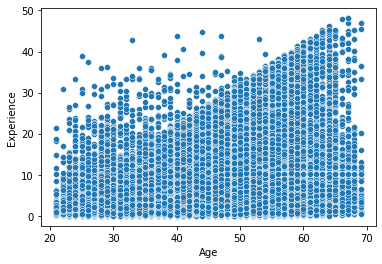

In [1157]:
sns.scatterplot(y = df_ex['Experience'],x = df_ex['Age'])

<AxesSubplot:xlabel='Age', ylabel='experience'>

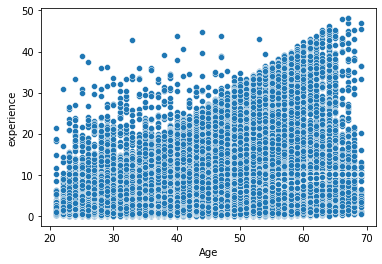

In [1185]:
sns.scatterplot(y = df_ex['experience'],x = df_ex['Age'])

In [1160]:
df['fake'] = np.where(df['Experience'] >=df['Age'],'fake','legit')

In [1161]:
df['fake'].value_counts()

legit    189168
fake         32
Name: fake, dtype: int64

In [1186]:
#df[df['Experience'].isnull()].groupby('Age')['ID'].count()

In [1187]:
#df_ex.groupby('Age')['Experience'].count()

In [1175]:
median_index = df_ex.groupby('Age')['Experience'].median().index
median_val = df_ex.groupby('Age')['Experience'].median().values

In [1176]:
new_dic = {a:b for a,b in zip(median_index,median_val)}

# filling experience with median of each age category 

In [1169]:
df[df['Age'] == 22]['Experience'].median()

1.8

In [1182]:
df_ex['experience'] = df_ex['Age'].map(new_dic)

In [1184]:
df_ex['experience'] = np.where(np.isnan(df_ex['Experience'].values),df_ex['experience'],df_ex['Experience'])

In [1189]:
# let's drop Experience
df_ex.drop(columns='Experience',axis = 1,inplace=True)

# let's fill Property list

In [1192]:
pd.crosstab(df_ex['Default_hist'],df_ex['Prop_List'])

Prop_List,Morethan_One,None,One
Default_hist,,,
df,77,18037,0
ndf,36584,0,130082


In [1194]:
df_ex[df_ex['Prop_List'].isnull()]['Default_hist'].value_counts()

ndf    2582
df      275
Name: Default_hist, dtype: int64

In [1198]:
pd.pivot_table(data = df,index = ['Education_det','Default_hist'],columns = 'Prop_List',aggfunc= 'count',values = 'Default')

Prop_List                   Morethan_One     None      One
Education_det Default_hist                                
Grad          df                    65.0  12737.0      NaN
              ndf                24931.0      NaN  94488.0
Other         df                     4.0    874.0      NaN
              ndf                 1768.0      NaN   6004.0
P_Grad        df                    10.0   4990.0      NaN
              ndf                10164.0      NaN  30289.0

pd.pivot_table(data = df,index = ['Marital_Stat','Default_hist'],columns = 'Prop_List',aggfunc= 'count',values = 'Default')

In [1200]:
df_ex['prop_list'] = df_ex['Prop_List']

In [1202]:
df_ex['prop_list'].value_counts()

One             130082
Morethan_One     36661
None             18037
Name: prop_list, dtype: int64

In [1204]:
df_ex['Prop_List'] = df_ex['Prop_List'].fillna('unknown')

In [1205]:
df_ex['prop_list'] = np.where(((df_ex['Prop_List']=='unknown')&(df_ex['Default_hist']=='df')),'None',df_ex['prop_list'])


In [1207]:
df_ex['prop_list'] = np.where(((df_ex['Prop_List']=='unknown')&(df_ex['Default_hist']=='ndf')),'One',df_ex['prop_list'])

In [1208]:
df_ex['prop_list'].value_counts()

One             132664
Morethan_One     36661
None             18312
Name: prop_list, dtype: int64

In [1209]:
# now let's us drop the old column
df_ex.drop(columns='Prop_List',axis=1,inplace=True)

# Prop_List filled

# filling Income_Alt

In [1213]:
pd.pivot_table(data = df,index = ['Gen','Marital_Stat','Education_det'],columns = 'Income_Alt',aggfunc= 'count',values = 'Default')

Income_Alt                      Not_Specified      Y
Gen Marital_Stat Education_det                      
F   Divorce      Grad                    1348    454
                 Other                     98     31
                 P_Grad                   450    172
    Married      Grad                   25678   9151
                 Other                   1555    646
                 P_Grad                  7845   3362
    Single       Grad                    5072   1501
                 Other                    616    218
                 P_Grad                  1740    657
    Widow        Grad                     369    118
                 Other                     18      7
                 P_Grad                    90     38
M   Divorce      Grad                    4487   1714
                 Other                    250    100
                 P_Grad                  1548    738
    Married      Grad                   42287  16745
                 Other                   2367    990
                 P_Grad                 14124   6566
    Single       Grad                    7995   2613
                 Other                    771    299
                 P_Grad                  3455   1408
    Widow        Grad                    5029   1901
                 Other                    229     83
                 P_Grad                   868    418

In [1212]:
pd.pivot_table(data = df,index = ['Gen','Education_det'],columns = 'Income_Alt',aggfunc= 'count',values = 'Default')

Income_Alt         Not_Specified      Y
Gen Education_det                      
F   Grad                   32467  11224
    Other                   2287    902
    P_Grad                 10125   4229
M   Grad                   59798  22973
    Other                   3617   1472
    P_Grad                 19995   9130

In [1215]:
pd.crosstab(df_ex['Education_det'],df_ex['Income_Alt'])

Income_Alt,Not_Specified,Y
Education_det,,
Grad,91784,34001
Other,5695,2291
P_Grad,29780,13196


In [1218]:
df_ex['Income_Alt'] = df_ex['Income_Alt'].fillna(method='ffill')

In [1219]:
#pd.crosstab(df_ex[df_ex['Income_Alt'].notnull()]['Age'],df_ex[df_ex['Income_Alt'].notnull()]['Income_Alt'])

In [ ]:
pd.pivot_table(data = df,index = ['Gen','Age','Education_det'],columns = 'Income_Alt',aggfunc= 'count',values = 'Default')

In [1229]:
df_ex[df_ex['Compensation'] > 10000000]

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,Contact_age,Product_bought,Default,c_score,c_cat,experience,prop_list
41308,496277,25707152.0,Y,410945.0,11608.77,0.0231,IT,ndf,4.0,Metro,1,P_Grad,Married,F,1_to_3,Y,Tue,No,CLoan,2.0,2.0,East,53.0,15.0,Yes,No,706.0,6.0,0.0,0.748,HCS,1.2,One
51110,539955,11843720.0,Y,569862.0,12864.73,0.0331,Non-IT,ndf,NaN,Metro,2,Grad,Married,F,1_to_3,Not_Specified,Tue,No,CLoan,2.0,2.0,North,43.0,12.0,Yes,Yes,16.0,5.0,1.0,0.785,HCS,9.0,One
52069,559171,63052885.0,Y,491729.0,14574.52,0.0026,IT,df,2.0,Metro,2,Grad,Married,F,1_to_3,Not_Specified,thur,Yes,CLoan,4.0,2.0,North,43.0,24.0,Yes,Yes,1147.0,5.0,0.0,0.200,LCS,13.6,None
93188,494807,30689828.0,Y,878136.6,NaN,0.0350,Non-IT,ndf,4.0,Metro,1,P_Grad,Married,M,1_to_3,Not_Specified,Fri,Yes,CLoan,2.0,2.0,East,45.0,14.0,Yes,Yes,16.0,2.0,1.0,0.216,LCS,23.2,One
102367,579813,15368408.0,N,523758.0,12386.70,0.0383,IT,ndf,NaN,Metro,1,Grad,Married,F,1_to_3,Not_Specified,Fri,No,CLoan,2.0,NaN,Central,51.0,14.0,No,Yes,630.0,5.0,0.0,0.641,HCS,9.1,One
110210,494319,14653408.0,Y,1024586.8,21899.69,0.0129,Non-IT,ndf,4.0,Metro,2,P_Grad,Married,F,1_to_3,Not_Specified,thur,Yes,CLoan,2.0,1.0,North,51.0,12.0,No,Yes,17.0,0.0,0.0,0.737,HCS,3.0,One
112658,430988,70377021.0,Y,493122.0,15849.59,0.0090,IT,df,NaN,Metro,2,Grad,Married,F,1_to_3,Not_Specified,thur,Yes,CLoan,4.0,2.0,North,43.0,23.0,Yes,Yes,1147.0,2.0,1.0,0.814,HCS,13.6,None
119053,461914,15458134.0,N,618555.0,11473.55,0.0330,IT,ndf,NaN,Metro,1,Grad,Married,F,1_to_3,Not_Specified,Fri,No,CLoan,2.0,2.0,Central,51.0,14.0,No,Yes,624.0,3.0,0.0,0.141,LCS,9.1,One
128429,553768,13241943.0,N,738136.0,14129.79,0.0369,IT,ndf,NaN,Metro,1,P_Grad,Married,M,1_to_3,Y,mon,Yes,CLoan,1.0,1.0,East,38.0,7.0,Yes,No,333.0,8.0,0.0,0.360,LCS,5.2,Morethan_One
149973,452851,17276168.0,Y,1596623.0,30376.29,0.0057,Non-IT,ndf,4.0,Metro,1,P_Grad,Single,F,1_to_3,Y,SAT,Yes,RLoan,1.0,2.0,Central,30.0,13.0,Yes,Yes,547.0,4.0,3.0,0.772,HCS,1.0,One


In [1241]:
df_ex[df_ex['Compensation'] > 10000000][['Age','Compensation','Default']].sort_values('Age')

,Age,Compensation,Default
172800,29.0,13557908.0,3.0
149973,30.0,17276168.0,3.0
128429,38.0,13241943.0,0.0
51110,43.0,11843720.0,1.0
52069,43.0,63052885.0,0.0
112658,43.0,70377021.0,1.0
93188,45.0,30689828.0,1.0
102367,51.0,15368408.0,0.0
110210,51.0,14653408.0,0.0
119053,51.0,15458134.0,0.0


In [1240]:
#we have to drop the extreme values
128429,
df_ex['Default'].value_counts()

0.0    95873
3.0    56760
1.0    35004
Name: Default, dtype: int64

C:\Users\AR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


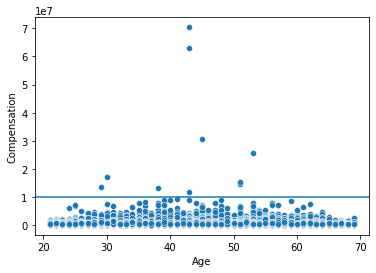

In [1236]:
sns.scatterplot(df_ex['Age'],df_ex['Compensation'])
plt.axhline(10000000)

In [1243]:
comp_data = df_ex.groupby(['Age','Gen','Education_det'])['Compensation'].describe()

In [1245]:
comp_data.to_csv('compensation.csv')

In [1246]:
df_comp = pd.read_csv('compensation.csv')

In [1282]:
df_comp.head()

,Age,Gen,Education_det,50%
0,21.0,F,Grad,605998.0
1,21.0,F,Other,703123.0
2,21.0,F,P_Grad,1057292.5
3,21.0,M,Grad,486032.0
4,21.0,M,Other,540145.0


# grand imputation for compensation by considering the age,gender and education_details features

In [1251]:
df_comp = df_comp.iloc[:,[0,1,2,8]]

In [1277]:
df_comp[df_comp['Age']==34]

,Age,Gen,Education_det,50%
78,34.0,F,Grad,740998.0
79,34.0,F,Other,781720.0
80,34.0,F,P_Grad,904494.5
81,34.0,M,Grad,600530.0
82,34.0,M,Other,637436.0
83,34.0,M,P_Grad,711108.0


In [1259]:
df_ex['compensation'] = 0

In [1264]:
for i in range(df_comp.shape[0]):
    k = df_comp.iloc[i,:]
    dic = {a:b for a,b in zip(k.index,k.values)}
    df_ex['compensation'] = np.where(((df_ex['Age']==dic['Age'])&(df_ex['Gen']==dic['Gen'])&
                                      (df_ex['Education_det']==dic['Education_det'])),dic['50%'],df_ex['compensation'])

In [1278]:
df_ex['compensation'] = np.where((np.isnan(df_ex['Compensation'].values)),df_ex['compensation'],df_ex['Compensation'])

# compensation feature has been imputed

In [1284]:
df_ex.drop(columns='Compensation',inplace=True,axis= 1)

In [ ]:
pd.pivot_table(data = df,index = ['Gen','Age','Education_det'],columns = 'Income_Alt',aggfunc= 'count',values = 'Default')

In [1286]:
df_ex.groupby(['Region_Type','Region'])['density_Ind'].describe()

count      mean       std     min       25%     50%  \
Region_Type Region                                                           
Metro       Central  29599.0  0.020418  0.016485  0.0001  0.010200  0.0203   
            East     32075.0  0.020326  0.011588  0.0001  0.010300  0.0202   
            North    58849.0  0.020537  0.016359  0.0001  0.010500  0.0204   
            South    26146.0  0.020325  0.011556  0.0001  0.010300  0.0203   
Rural       Central   6239.0  0.020514  0.011677  0.0001  0.010200  0.0207   
            East      6383.0  0.020517  0.027472  0.0000  0.010400  0.0200   
            North    12180.0  0.020380  0.021517  0.0001  0.010200  0.0200   
            South     5163.0  0.020799  0.011547  0.0002  0.010800  0.0209   
other       Central    690.0  0.020307  0.011488  0.0003  0.010325  0.0201   
            East       652.0  0.020975  0.011149  0.0003  0.012200  0.0213   
            North     1501.0  0.020833  0.011501  0.0005  0.011200  0.0208   
            South      521.0  0.020752  0.011694  0.0003  0.010900  0.0210   

                          75%     max  
Region_Type Region                     
Metro       Central  0.030400  2.0372  
            East     0.030400  0.0414  
            North    0.030500  2.0178  
            South    0.030300  0.0414  
Rural       Central  0.030700  0.0409  
            East     0.030100  2.0156  
            North    0.030100  2.0222  
            South    0.030800  0.0410  
other       Central  0.030400  0.0404  
            East     0.030025  0.0406  
            North    0.031000  0.0406  
            South    0.030400  0.0405

In [1295]:
density_df = pd.Series(round(df_ex['density_Ind'],2)).reset_index() 

In [1307]:
density_df.set_index('index',inplace=True)

In [1308]:
density_df

,density_Ind
index,
0,0.03
1,0.02
2,0.01
3,0.04
4,0.01
...,...
189195,0.00
189196,0.03
189197,0.03


In [1309]:
df_ex['density']=density_df['density_Ind']

In [1310]:
df_ex[df_ex['density_Ind'] > 0.9]

,ID,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,Contact_age,Product_bought,Default,c_score,c_cat,experience,prop_list,compensation,density
32007,449916,N,203066.4,11250.67,2.0178,Govt.,df,2.0,Metro,2,Grad,Married,F,1_to_3,Not_Specified,Fri,Yes,CLoan,4.0,2.0,North,32.0,8.0,No,Yes,1164.0,6.0,1.0,0.777,HCS,6.0,None,457246.0,2.02
77422,490092,NaN,165310.0,10785.40,2.0156,IT,ndf,4.0,Rural,1,P_Grad,Married,M,1_to_3,Not_Specified,wed,Yes,CLoan,2.0,2.0,East,32.0,13.0,Yes,Yes,1264.0,0.0,0.0,0.180,LCS,0.7,One,440037.0,2.02
114865,557736,N,161340.0,9750.54,2.0033,Non-IT,ndf,4.0,Metro,2,Grad,Married,M,1_to_3,Y,thur,Yes,CLoan,2.0,2.0,North,53.0,16.0,Yes,Yes,NaN,6.0,0.0,0.345,LCS,3.4,One,588160.0,2.00
156955,433379,Y,530682.0,10336.06,2.0372,NaN,ndf,4.0,Metro,1,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,CLoan,2.0,2.0,Central,54.0,18.0,Yes,Yes,20.0,3.0,3.0,0.756,HCS,7.6,One,708084.0,2.04
173670,436716,NaN,667750.0,11218.20,2.0222,IT,df,2.0,Rural,1,Grad,Married,F,1_to_3,Not_Specified,mon,Yes,CLoan,4.0,2.0,North,37.0,12.0,Yes,Yes,526.0,11.0,3.0,0.740,HCS,2.9,None,765450.0,2.02


In [1311]:
pd.crosstab(df_ex['density'],df_ex['Default'])

Default,0.0,1.0,3.0
density,,,
0.00,10761,3848,6213
0.01,22812,8303,13715
0.02,23016,8526,13638
0.03,22862,8286,13442
0.04,12514,4582,7475
2.00,1,0,0
2.02,1,1,1
2.04,0,0,1


In [1315]:
pd.pivot_table(data = df_ex,index = ['Region','Region_Type'],columns = 'Default',aggfunc= 'mean',values = 'density_Ind')

Default                   0.0       1.0       3.0
Region  Region_Type                              
Central Metro        0.020293  0.020510  0.020581
        Rural        0.020389  0.021019  0.020408
        other        0.020017  0.019658  0.021135
East    Metro        0.020232  0.020477  0.020391
        Rural        0.020618  0.020370  0.020437
        other        0.020531  0.022302  0.020822
North   Metro        0.020617  0.020558  0.020389
        Rural        0.020189  0.020474  0.020642
        other        0.021477  0.020720  0.019946
South   Metro        0.020343  0.020190  0.020382
        Rural        0.020902  0.019952  0.021172
        other        0.020534  0.020937  0.020929

In [1316]:
df_ex['density'].fillna(method='ffill',inplace=True)

In [1318]:
df_ex.drop(columns ='density_Ind',axis= 1,inplace=True)

# density has been filled.

In [1321]:
df_ex[df_ex['Company_Rating'].isnull()]['Default'].value_counts()

0.0    8453
3.0    5053
1.0    3167
Name: Default, dtype: int64

In [1346]:
cr_data = pd.pivot_table(data = df_ex,index = ['Age','Gen','Education_det','Region_Type','Region'],columns = 'c_cat',aggfunc= 'count',values = 'ID')

In [1347]:
cr_data.to_csv('credit_cat.csv')

In [1388]:
cr_data = pd.read_csv('credit_cat.csv')

In [1389]:
cr_data = cr_data[cr_data['100'].notnull()]

In [1390]:
cr_data = cr_data.reset_index()

In [1391]:
cr_data.drop(columns='index',inplace=True,axis=1)

In [1392]:
cr_data['guess'] = 'o'

In [1393]:
cr_data.head()

,Age,Gen,Education_det,Region_Type,Region,100,HCS,LCS,guess
0,21.0,F,Grad,Metro,East,1.0,13.0,10.0,o
1,21.0,F,Other,Metro,Central,1.0,NaN,1.0,o
2,21.0,F,P_Grad,Metro,East,1.0,1.0,NaN,o
3,21.0,M,Grad,Metro,North,1.0,24.0,22.0,o
4,21.0,M,Grad,Metro,South,2.0,17.0,20.0,o


In [ ]:
# to solve the above problem I am taking 3 steps.
# first create a column with fake values
# when 1 column is null fill with other column and vice versa otherwise no change
# then choose df with no null values since they have already done their job. fill with the bigger value

In [1394]:
cr_data['guess'] = np.where(np.isnan(cr_data['HCS'].values),'LCS',cr_data['guess'])
cr_data['guess'] = np.where(np.isnan(cr_data['LCS'].values),'HCS',cr_data['guess'])

In [1395]:
cr_data['guess'] = np.where(cr_data['HCS'] > cr_data['LCS'],'HCS',cr_data['guess'])
cr_data['guess'] = np.where(cr_data['HCS'] < cr_data['LCS'],'LCS',cr_data['guess'])

In [1396]:
cr_data[cr_data['HCS'] < cr_data['LCS']]['guess'].value_counts()

LCS    461
Name: guess, dtype: int64

In [1397]:
cr_data[cr_data['HCS'] > cr_data['LCS']]['guess'].value_counts()

HCS    453
Name: guess, dtype: int64

In [1425]:
cr_data.guess.value_counts()

HCS    471
LCS    468
o       51
Name: guess, dtype: int64

In [ ]:
# i think this due to comparison operator. == was never used . this case would be for HCS == LCS

In [1398]:
cr_data = cr_data.iloc[:,[0,1,2,3,4,8]]

In [1423]:
cr_data[cr_data['Age']==24]

,Age,Gen,Education_det,Region_Type,Region,guess
35,24.0,F,Grad,Metro,Central,o
36,24.0,F,Grad,Metro,East,HCS
37,24.0,F,Grad,Metro,North,HCS
38,24.0,F,Grad,Rural,East,LCS
39,24.0,F,Other,Metro,East,o
40,24.0,F,P_Grad,Metro,North,LCS
41,24.0,M,Grad,Metro,Central,HCS
42,24.0,M,Grad,Metro,East,HCS
43,24.0,M,Grad,Metro,North,LCS
44,24.0,M,Grad,Metro,South,LCS


In [1415]:
df_ex['credit_cat'] = 'o'

In [1417]:
for i in range(cr_data.shape[0]):
    k = cr_data.iloc[i,:]
    dic = {a:b for a,b in zip(k.index,k.values)}
    df_ex['credit_cat'] = np.where(((df_ex['Age']==dic['Age'])&(df_ex['Gen']==dic['Gen'])&
                                      (df_ex['Education_det']==dic['Education_det'])&
                                     (df_ex['Region']==dic['Region'])&
                                     (df_ex['Region_Type']==dic['Region_Type'])),dic['guess'],df_ex['credit_cat'])

In [1418]:
df_ex[(df_ex['c_cat'] == '100')&(df_ex['Age']==21)&(df_ex['Gen']=='F')]

,ID,Vehicle_Status,Loan_amt,Annuity_amt,Job_Type,Default_hist,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,Contact_age,Product_bought,Default,c_score,c_cat,experience,prop_list,compensation,density,credit_cat
109543,506387,N,172016.0,11335.11,IT,ndf,4.0,Metro,1,Other,Single,F,1_to_3,Y,wed,Yes,RLoan,1.0,2.0,Central,21.0,12.0,Yes,Yes,316.0,1.0,0.0,NaN,100,0.5,One,585960.0,0.01,LCS
139078,408551,N,329791.0,11327.75,IT,ndf,4.0,Metro,2,P_Grad,Single,F,1_to_3,Not_Specified,wed,No,CLoan,1.0,1.0,East,21.0,7.0,Yes,No,152.0,5.0,3.0,NaN,100,0.4,One,1101087.0,0.03,HCS
188286,415666,Y,104460.0,7881.05,IT,ndf,4.0,Metro,NaN,Grad,Single,F,4_to_6,Not_Specified,Fri,Yes,RLoan,1.0,2.0,East,21.0,12.0,Yes,No,540.0,5.0,3.0,NaN,100,2.2,One,605998.0,0.01,HCS


In [1419]:
df_ex['c_cat'] = np.where(df_ex['c_cat']=='100',df_ex['credit_cat'],df_ex['c_cat'])

In [1430]:
df_ex['c_cat'] = df_ex['c_cat'].replace({'o':np.nan})

In [1431]:
df_ex['c_cat'].value_counts()

HCS    94018
LCS    93548
Name: c_cat, dtype: int64

In [1432]:
df_ex['c_cat'].fillna(method='ffill',inplace=True)

In [1433]:
df_ex['c_cat'].value_counts()

HCS    94054
LCS    93583
Name: c_cat, dtype: int64

In [ ]:
#np.isnan(df_ex['Experience'].values)

In [1435]:
df_ex.drop(columns='c_score',inplace=True,axis=1)

In [1437]:
df_ex.drop(columns='credit_cat',inplace=True,axis=1)

# imputing  job_type column

In [1443]:
job_df = pd.pivot_table(data = df_ex,index = ['Age','Gen','Education_det','Ph.No','Credit_Lnks','Region_Type'],columns = 'Job_Type',aggfunc= 'count',values = 'ID')

In [1444]:
job_df.to_csv('job_type.csv')

In [1482]:
job_df = pd.read_csv('job_type.csv')

In [1483]:
job_df[job_df['Govt.'].isnull()]

,Age,Gen,Education_det,Ph.No,Credit_Lnks,Region_Type,Govt.,IT,Non-IT
0,21.0,F,Grad,No,1_to_3,Metro,NaN,8.0,3.0
1,21.0,F,Grad,No,1_to_3,Rural,NaN,2.0,NaN
2,21.0,F,Grad,No,1_to_3,other,NaN,1.0,NaN
3,21.0,F,Grad,No,4_to_6,Metro,NaN,2.0,NaN
4,21.0,F,Grad,No,4_to_6,Rural,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...
2891,69.0,F,Other,Yes,1_to_3,Rural,NaN,NaN,1.0
2892,69.0,F,P_Grad,Yes,1_to_3,Metro,NaN,6.0,NaN
2893,69.0,F,P_Grad,Yes,1_to_3,Rural,NaN,2.0,2.0
2898,69.0,M,Grad,Yes,4_to_6,Metro,NaN,1.0,NaN


In [1484]:
job_df[job_df['IT'].isnull()]

,Age,Gen,Education_det,Ph.No,Credit_Lnks,Region_Type,Govt.,IT,Non-IT
32,21.0,M,Other,Yes,4_to_6,Rural,1.0,NaN,NaN
43,22.0,F,Grad,No,>6,Metro,2.0,NaN,1.0
55,22.0,F,Other,Yes,1_to_3,Rural,1.0,NaN,1.0
57,22.0,F,Other,Yes,4_to_6,other,NaN,NaN,1.0
62,22.0,F,P_Grad,Yes,1_to_3,Rural,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...
2878,68.0,M,Other,Yes,4_to_6,Metro,1.0,NaN,NaN
2891,69.0,F,Other,Yes,1_to_3,Rural,NaN,NaN,1.0
2899,69.0,M,Grad,Yes,>6,Metro,1.0,NaN,2.0
2900,69.0,M,Grad,Yes,>6,other,1.0,NaN,NaN


In [1485]:
job_df['j_type']= 'o'

In [1486]:
job_df['j_type'] = np.where(((job_df['Non-IT'].isnull())&(job_df['Govt.'].isnull())),'IT',job_df['j_type'])
job_df['j_type'] = np.where(((job_df['IT'].isnull())&(job_df['Non-IT'].isnull())),'Govt.',job_df['j_type'])
job_df['j_type'] = np.where(((job_df['IT'].isnull())&(job_df['Govt.'].isnull())),'Non-IT',job_df['j_type'])

In [1487]:
job_df['j_type'] = np.where(((job_df['Non-IT'].isnull())&(job_df['Govt.'].notnull())
                             &(job_df['IT'].notnull())&(job_df['IT']<job_df['Govt.'])),'Govt.',job_df['j_type'])
job_df['j_type'] = np.where(((job_df['Non-IT'].isnull())&(job_df['Govt.'].notnull())
                             &(job_df['IT'].notnull())&(job_df['IT']>job_df['Govt.'])),'IT',job_df['j_type'])
job_df['j_type'] = np.where(((job_df['Non-IT'].notnull())&(job_df['Govt.'].isnull())
                             &(job_df['IT'].notnull())&(job_df['IT']<job_df['Non-IT'])),'Non-IT',job_df['j_type'])
job_df['j_type'] = np.where(((job_df['Non-IT'].notnull())&(job_df['Govt.'].isnull())
                             &(job_df['IT'].notnull())&(job_df['IT']>job_df['Non-IT'])),'IT',job_df['j_type'])
job_df['j_type'] = np.where(((job_df['Non-IT'].notnull())&(job_df['Govt.'].notnull())
                             &(job_df['IT'].isnull())&(job_df['Govt.']<job_df['Non-IT'])),'Non-IT',job_df['j_type'])
job_df['j_type'] = np.where(((job_df['Non-IT'].notnull())&(job_df['Govt.'].notnull())
                             &(job_df['IT'].isnull())&(job_df['Govt.']>job_df['Non-IT'])),'Govt.',job_df['j_type'])

In [1488]:
job_df['j_type'] = np.where(((job_df['IT'].notnull())&(job_df['Non-IT'].notnull())&(job_df['Govt.'].notnull())&(job_df['Govt.']>job_df['IT'])&(job_df['Govt.']>job_df['Non-IT'])),'Govt.',job_df['j_type'])
job_df['j_type'] = np.where(((job_df['IT'].notnull())&(job_df['Non-IT'].notnull())&(job_df['Govt.'].notnull())&(job_df['Govt.']<job_df['IT'])&(job_df['IT']>job_df['Non-IT'])),'IT',job_df['j_type'])
job_df['j_type'] = np.where(((job_df['IT'].notnull())&(job_df['Non-IT'].notnull())&(job_df['Govt.'].notnull())&(job_df['Non-IT']>job_df['IT'])&(job_df['Govt.']<job_df['Non-IT'])),'Non-IT',job_df['j_type'])

In [1489]:
job_df['j_type'] = job_df['j_type'].replace({'o':np.nan})

In [1490]:
job_df['j_type'].value_counts()

IT        1964
Non-IT     427
Govt.      220
Name: j_type, dtype: int64

In [1491]:
job_df = job_df.iloc[:,[0,1,2,3,4,5,9]]

In [1493]:
job_df.head(2)

,Age,Gen,Education_det,Ph.No,Credit_Lnks,Region_Type,j_type
0,21.0,F,Grad,No,1_to_3,Metro,IT
1,21.0,F,Grad,No,1_to_3,Rural,IT


In [1497]:
for i in range(job_df.shape[0]):
    k = job_df.iloc[i,:]
    dic = {a:b for a,b in zip(k.index,k.values)}
    df_ex['Job_Type'] = np.where(((df_ex['Job_Type'].isnull())&(df_ex['Age']==dic['Age'])&(df_ex['Gen']==dic['Gen'])&
                                      (df_ex['Education_det']==dic['Education_det'])&
                                     (df_ex['Ph.No']==dic['Ph.No'])&(df_ex['Credit_Lnks']==dic['Credit_Lnks'])&
                                     (df_ex['Region_Type']==dic['Region_Type'])),dic['j_type'],df_ex['Job_Type'])

In [1501]:
df_ex['Job_Type'].fillna(method='ffill',inplace=True)

# job_type column has been filled

In [1509]:
vehicle_df = pd.pivot_table(data = df_ex,index = ['Age','Gen','Marital_Stat','Ph.No','Region','Region_Type'],columns = 'Vehicle_Status',aggfunc= 'count',values = 'ID')

In [1510]:
vehicle_df.to_csv('vehicle_data.csv')

In [1511]:
vdf = pd.read_csv('vehicle_data.csv')

In [1512]:
vdf.head()

,Age,Gen,Marital_Stat,Ph.No,Region,Region_Type,N,Y
0,21.0,F,Married,No,East,Metro,5.0,1.0
1,21.0,F,Married,No,North,Metro,3.0,NaN
2,21.0,F,Married,No,South,Metro,NaN,1.0
3,21.0,F,Married,No,South,Rural,NaN,1.0
4,21.0,F,Married,Yes,Central,Metro,1.0,1.0


In [1513]:
vdf['vehicle'] = 'o'

In [1518]:
vdf['vehicle'] = np.where(((vdf['N'].isnull())&(vdf['Y'].notnull())),'Y',vdf['vehicle'])
vdf['vehicle'] = np.where(((vdf['N'].notnull())&(vdf['Y'].isnull())),'N',vdf['vehicle'])
vdf['vehicle'] = np.where(((vdf['N'].notnull())&(vdf['Y'].notnull())&(vdf['Y'] > vdf['N'])),'Y',vdf['vehicle'])
vdf['vehicle'] = np.where(((vdf['N'].notnull())&(vdf['Y'].notnull())&(vdf['Y'] < vdf['N'])),'N',vdf['vehicle'])

In [1522]:
vdf['vehicle']=vdf['vehicle'].replace({'o':np.nan})

In [1524]:
vdf = vdf.iloc[:,[0,1,2,3,4,5,8]]

In [1525]:
for i in range(vdf.shape[0]):
    k = vdf.iloc[i,:]
    dic = {a:b for a,b in zip(k.index,k.values)}
    df_ex['Vehicle_Status'] = np.where(((df_ex['Vehicle_Status'].isnull())&(df_ex['Age']==dic['Age'])&(df_ex['Gen']==dic['Gen'])&
                                      (df_ex['Marital_Stat']==dic['Marital_Stat'])&
                                     (df_ex['Ph.No']==dic['Ph.No'])&(df_ex['Region']==dic['Region'])&
                                     (df_ex['Region_Type']==dic['Region_Type'])),dic['vehicle'],df_ex['Vehicle_Status'])

In [1529]:
df_ex['Vehicle_Status'].fillna(method='ffill',inplace=True)

In [1530]:
df_ex['Vehicle_Status'].isnull().sum()

0

# vehicle status column has been filled.

In [1532]:
pd.crosstab(df_ex['Default_hist'],df_ex['Home_Appliances'])

Home_Appliances,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,12.0,14.0,19.0
Default_hist,,,,,,,,,,,,,
df,0,14650,2113,0,42,17,3,2,1,3,2,2,2
ndf,34067,0,0,121145,0,0,0,0,0,0,0,0,0


In [1533]:
df_ex[df_ex['Home_Appliances']==19]

,ID,Vehicle_Status,Loan_amt,Annuity_amt,Job_Type,Default_hist,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,Contact_age,Product_bought,Default,c_cat,experience,prop_list,compensation,density
8825,426372,N,211113.0,11262.05,IT,df,19.0,Rural,1,Grad,Married,M,1_to_3,Not_Specified,Tue,Yes,CLoan,3.0,2.0,Central,39.0,12.0,Yes,No,770.0,4.0,0.0,HCS,3.3,Morethan_One,373959.0,0.01
177566,403844,N,182916.0,NaN,Govt.,df,19.0,Rural,NaN,Grad,Single,M,1_to_3,Y,Sun,No,CLoan,4.0,2.0,East,30.0,12.0,Yes,Yes,762.0,4.0,3.0,LCS,3.3,Morethan_One,485064.0,0.01


In [1534]:
df_ex[df_ex['Home_Appliances']==14]

,ID,Vehicle_Status,Loan_amt,Annuity_amt,Job_Type,Default_hist,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,Contact_age,Product_bought,Default,c_cat,experience,prop_list,compensation,density
122044,466282,Y,500556.0,12477.02,IT,df,14.0,Metro,NaN,Grad,Married,M,1_to_3,Not_Specified,Tue,Yes,CLoan,5.0,2.0,North,56.0,16.0,No,Yes,1804.0,4.0,0.0,LCS,7.8,Morethan_One,228253.0,0.03
160657,395845,Y,686960.0,10232.01,IT,df,14.0,Metro,3,Grad,Married,M,1_to_3,Not_Specified,Tue,Yes,CLoan,5.0,2.0,North,56.0,14.0,No,Yes,1798.0,4.0,3.0,HCS,7.8,Morethan_One,278382.0,0.02


In [1535]:
df_ex[df_ex['Home_Appliances']==12]

,ID,Vehicle_Status,Loan_amt,Annuity_amt,Job_Type,Default_hist,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,Contact_age,Product_bought,Default,c_cat,experience,prop_list,compensation,density
21723,458382,N,631760.0,11297.92,IT,df,12.0,Rural,2,Grad,Married,M,1_to_3,Not_Specified,Fri,Yes,CLoan,5.0,1.0,Central,39.0,16.0,Yes,Yes,377.0,5.0,1.0,LCS,7.4,Morethan_One,1250935.0,0.03
104617,473925,N,162764.0,11671.91,IT,df,12.0,Rural,2,Grad,Married,M,1_to_3,Y,Tue,No,RLoan,5.0,NaN,Central,38.0,11.0,Yes,Yes,178.0,1.0,0.0,HCS,7.0,Morethan_One,840385.0,0.04


In [1536]:
df_ex[df_ex['Home_Appliances']==10]

,ID,Vehicle_Status,Loan_amt,Annuity_amt,Job_Type,Default_hist,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,Contact_age,Product_bought,Default,c_cat,experience,prop_list,compensation,density
20729,457877,N,118861.4,7063.26,Non-IT,df,10.0,Rural,1,Grad,Married,F,1_to_3,Not_Specified,thur,Yes,CLoan,5.0,3.0,North,41.0,8.0,Yes,Yes,2530.0,3.0,0.0,LCS,3.9,Morethan_One,389504.0,0.04
38387,564139,N,106388.0,8383.36,IT,df,10.0,Metro,2,P_Grad,Married,M,1_to_3,Not_Specified,Fri,Yes,CLoan,5.0,2.0,Central,31.0,10.0,Yes,Yes,1588.0,2.0,1.0,LCS,2.0,Morethan_One,356972.0,0.02
80629,509857,N,87573.0,9408.28,IT,df,10.0,Metro,2,P_Grad,Married,M,1_to_3,Not_Specified,Fri,Yes,CLoan,5.0,2.0,Central,31.0,11.0,Yes,Yes,1588.0,2.0,0.0,HCS,2.0,Morethan_One,334096.0,0.03


In [1537]:
df_ex[df_ex['Home_Appliances']==9]

,ID,Vehicle_Status,Loan_amt,Annuity_amt,Job_Type,Default_hist,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,Contact_age,Product_bought,Default,c_cat,experience,prop_list,compensation,density
100731,395210,N,331225.0,13270.32,IT,df,9.0,Metro,2,P_Grad,Single,M,1_to_3,Not_Specified,thur,No,CLoan,5.0,2.0,South,30.0,12.0,Yes,Yes,379.0,1.0,1.0,HCS,2.9,Morethan_One,709415.0,0.03


In [1538]:
df_ex[df_ex['Home_Appliances']==8]

,ID,Vehicle_Status,Loan_amt,Annuity_amt,Job_Type,Default_hist,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,Contact_age,Product_bought,Default,c_cat,experience,prop_list,compensation,density
119672,550027,Y,163746.0,11953.38,IT,df,8.0,Rural,1,Grad,Married,M,1_to_3,Not_Specified,wed,No,CLoan,5.0,2.0,South,31.0,14.0,Yes,Yes,515.0,4.0,0.0,LCS,9.7,Morethan_One,452574.0,0.04
139341,489703,Y,233880.0,8200.32,IT,df,8.0,Rural,1,Grad,Married,M,1_to_3,Not_Specified,wed,No,CLoan,5.0,2.0,South,31.0,13.0,Yes,Yes,513.0,5.0,3.0,HCS,9.7,Morethan_One,414528.0,0.02


In [1539]:
df_ex[df_ex['Home_Appliances']==7]

,ID,Vehicle_Status,Loan_amt,Annuity_amt,Job_Type,Default_hist,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,Contact_age,Product_bought,Default,c_cat,experience,prop_list,compensation,density
36732,518718,N,139156.0,12399.51,Govt.,df,7.0,Rural,1,Grad,Married,F,1_to_3,Not_Specified,Fri,Yes,CLoan,9.0,1.0,North,48.0,9.0,Yes,No,1466.0,0.0,0.0,LCS,5.2,Morethan_One,929880.0,0.01
41401,584007,N,668660.0,13900.27,IT,df,7.0,Metro,1,Grad,Married,M,1_to_3,Not_Specified,thur,Yes,CLoan,9.0,3.0,East,41.0,6.0,Yes,Yes,1773.0,5.0,1.0,LCS,0.3,Morethan_One,849520.0,0.01
165277,440285,N,314295.1,11169.01,Govt.,df,7.0,Metro,2,Grad,Married,F,1_to_3,Not_Specified,Fri,Yes,CLoan,9.0,2.0,East,48.0,8.0,Yes,Yes,83.0,1.0,3.0,HCS,2.9,Morethan_One,353920.0,0.00


In [1540]:
df_ex[df_ex['Home_Appliances']==6]

,ID,Vehicle_Status,Loan_amt,Annuity_amt,Job_Type,Default_hist,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,Contact_age,Product_bought,Default,c_cat,experience,prop_list,compensation,density
1122,432289,N,335395.0,11342.81,Non-IT,df,6.0,Metro,NaN,P_Grad,Married,F,1_to_3,Y,Tue,Yes,CLoan,8.0,2.0,North,41.0,18.0,No,Yes,2481.0,5.0,0.0,LCS,4.1,Morethan_One,808240.0,0.02
10158,512789,Y,84739.2,9791.45,IT,df,6.0,Metro,1,Grad,Married,F,1_to_3,Not_Specified,thur,Yes,CLoan,8.0,3.0,East,35.0,16.0,Yes,No,NaN,7.0,0.0,LCS,2.8,Morethan_One,673588.0,0.03
19272,533694,N,270174.0,9174.23,IT,df,6.0,Metro,1,Grad,Married,F,1_to_3,Y,Tue,No,CLoan,8.0,2.0,East,48.0,13.0,Yes,No,NaN,6.0,1.0,HCS,8.3,Morethan_One,539600.0,0.04
26989,432220,Y,553626.0,9333.81,Govt.,df,6.0,Metro,>4,Grad,Married,F,1_to_3,Y,Fri,No,CLoan,8.0,2.0,South,42.0,8.0,Yes,No,2032.0,5.0,1.0,LCS,2.9,Morethan_One,722647.0,0.01
31884,494390,N,183666.0,11568.64,IT,df,6.0,Rural,1,Other,Married,F,1_to_3,Not_Specified,wed,Yes,RLoan,8.0,2.0,Central,35.0,12.0,Yes,No,1401.0,5.0,1.0,HCS,7.1,Morethan_One,594633.0,0.04
63516,529373,N,320705.0,10480.58,IT,df,6.0,Metro,1,Grad,Married,F,1_to_3,Y,Tue,No,CLoan,8.0,2.0,East,48.0,11.0,Yes,No,867.0,4.0,0.0,HCS,8.3,Morethan_One,479944.0,0.02
66822,566362,N,466728.0,12587.71,Govt.,df,6.0,Metro,1,P_Grad,Married,M,1_to_3,Y,thur,Yes,CLoan,8.0,2.0,East,46.0,18.0,Yes,Yes,483.0,1.0,1.0,LCS,21.3,Morethan_One,465990.0,0.02
66977,459392,N,306534.0,12040.53,IT,df,6.0,Metro,1,Grad,Married,M,1_to_3,Not_Specified,SAT,No,CLoan,8.0,2.0,North,35.0,15.0,Yes,Yes,1137.0,5.0,1.0,LCS,0.4,Morethan_One,634725.0,0.04
78743,484203,N,407976.0,11022.98,IT,df,6.0,Metro,1,Grad,Married,M,1_to_3,Not_Specified,SAT,No,CLoan,8.0,2.0,North,35.0,14.0,Yes,Yes,1140.0,2.0,1.0,HCS,0.4,Morethan_One,588525.0,0.04
105398,494139,Y,181554.0,10437.86,Non-IT,df,6.0,Metro,1,Grad,Married,M,1_to_3,Not_Specified,mon,Yes,CLoan,8.0,2.0,South,41.0,8.0,Yes,Yes,2552.0,1.0,0.0,HCS,3.0,Morethan_One,517569.0,0.03


In [1553]:
ha_data = pd.pivot_table(data = df_ex,index = ['Gen','Marital_Stat','Credit_Lnks','Default_hist','Region','Region_Type'],columns = 'Home_Appliances',aggfunc= 'count',values = 'ID')

In [1554]:
ha_data.to_csv('home_appliances.csv')

In [1555]:
ha_df = pd.read_csv('home_appliances.csv')

In [1562]:
ha_df = ha_df.iloc[:,0:10]

In [1563]:
ha_df.head()

,Gen,Marital_Stat,Credit_Lnks,Default_hist,Region,Region_Type,1.0,2.0,3.0,4.0
0,F,Divorce,1_to_3,df,Central,Metro,NaN,16.0,2.0,NaN
1,F,Divorce,1_to_3,df,Central,Rural,NaN,2.0,NaN,NaN
2,F,Divorce,1_to_3,df,Central,other,NaN,1.0,NaN,NaN
3,F,Divorce,1_to_3,df,East,Metro,NaN,45.0,2.0,NaN
4,F,Divorce,1_to_3,df,North,Metro,NaN,41.0,7.0,NaN


In [1568]:
ha_df[(ha_df['1.0'].isnull())&(ha_df['2.0'].isnull())&(ha_df['3.0'].isnull())&(ha_df['4.0'].notnull())]
ha_df[(ha_df['1.0'].isnull())&(ha_df['2.0'].isnull())&(ha_df['3.0'].notnull())&(ha_df['4.0'].isnull())]
ha_df[(ha_df['1.0'].isnull())&(ha_df['2.0'].notnull())&(ha_df['3.0'].isnull())&(ha_df['4.0'].isnull())]
ha_df[(ha_df['1.0'].notnull())&(ha_df['2.0'].isnull())&(ha_df['3.0'].isnull())&(ha_df['4.0'].isnull())]

,Gen,Marital_Stat,Credit_Lnks,Default_hist,Region,Region_Type,1.0,2.0,3.0,4.0
11,F,Divorce,1_to_3,ndf,Central,other,1.0,NaN,NaN,NaN
14,F,Divorce,1_to_3,ndf,East,other,2.0,NaN,NaN,NaN
29,F,Divorce,4_to_6,ndf,East,other,1.0,NaN,NaN,NaN
34,F,Divorce,4_to_6,ndf,South,Rural,1.0,NaN,NaN,NaN
103,F,Married,>6,ndf,South,Rural,2.0,NaN,NaN,NaN
229,M,Divorce,>6,ndf,Central,Rural,1.0,NaN,NaN,NaN


In [ ]:
ha_df['app'] = max(ha_df['1.0'],ha_df['2.0'])
ha_df['app'] = max(ha_df['2.0'],ha_df['app'])
ha_df['app'] = max(ha_df['3.0'],ha_df['app'])
ha_df['app'] = max(ha_df['4.0'],ha_df['app'])

In [1588]:
ha_df.drop(columns='app',axis=1,inplace=True)

In [1590]:
ha_df['app'] = 0.0

In [1582]:
ha_df.fillna(0.1,inplace=True)

In [1592]:
ha_df['app'] = np.where(((ha_df['1.0']>ha_df['2.0'])&(ha_df['1.0']>ha_df['3.0'])&(ha_df['1.0']>ha_df['4.0'])),1.0,ha_df['app'])
ha_df['app'] = np.where(((ha_df['1.0']<ha_df['2.0'])&(ha_df['2.0']>ha_df['3.0'])&(ha_df['2.0']>ha_df['4.0'])),2.0,ha_df['app'])
ha_df['app'] = np.where(((ha_df['1.0']<ha_df['3.0'])&(ha_df['2.0']<ha_df['3.0'])&(ha_df['3.0']>ha_df['4.0'])),3.0,ha_df['app'])
ha_df['app'] = np.where(((ha_df['1.0']<ha_df['4.0'])&(ha_df['2.0']<ha_df['4.0'])&(ha_df['3.0']<ha_df['4.0'])),4.0,ha_df['app'])

In [1597]:
pd.crosstab(df_ex['Default_hist'],df_ex['Home_Appliances'])

Home_Appliances,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,12.0,14.0,19.0
Default_hist,,,,,,,,,,,,,
df,0,14650,2113,0,42,17,3,2,1,3,2,2,2
ndf,34067,0,0,121145,0,0,0,0,0,0,0,0,0


# by including the default_hist we are implying its restrictions in the null value filling process

In [1595]:
ha_df[ha_df['app'] == 0.0]

,Gen,Marital_Stat,Credit_Lnks,Default_hist,Region,Region_Type,1.0,2.0,3.0,4.0,app
325,M,Single,4_to_6,df,Central,other,0.1,1.0,1.0,0.1,0.0
344,M,Single,>6,ndf,Central,Rural,1.0,0.1,0.1,1.0,0.0


In [1598]:
ha_df['app'].replace({0.0:np.nan},inplace =True)

In [1601]:
ha_df = ha_df.iloc[:,[0,1,2,3,4,5,10]]

In [1602]:
ha_df.head(1)

,Gen,Marital_Stat,Credit_Lnks,Default_hist,Region,Region_Type,app
0,F,Divorce,1_to_3,df,Central,Metro,2.0


In [1604]:
for i in range(ha_df.shape[0]):
    k = ha_df.iloc[i,:]
    dic = {a:b for a,b in zip(k.index,k.values)}
    df_ex['Home_Appliances'] = np.where(((df_ex['Home_Appliances'].isnull())&(df_ex['Marital_Stat']==dic['Marital_Stat'])
                                         &(df_ex['Gen']==dic['Gen'])&
                                      (df_ex['Default_hist']==dic['Default_hist'])&
                                     (df_ex['Region']==dic['Region'])&(df_ex['Credit_Lnks']==dic['Credit_Lnks'])&
                                     (df_ex['Region_Type']==dic['Region_Type'])),dic['app'],df_ex['Home_Appliances'])

In [1605]:
df_ex['Home_Appliances'].isnull().sum()

3

In [1608]:
df_ex['Home_Appliances'].fillna(method='ffill',inplace=True)

# home appliances feature have been filled

In [1614]:
df_ex['Credit_Inq'].value_counts()

1     94839
2     42990
3     33138
>4    12850
Name: Credit_Inq, dtype: int64

In [1630]:
ci_data = pd.pivot_table(data = df_ex,index = ['Age','Gen','Marital_Stat','Credit_Lnks','Default_hist','Region_Type'],columns = 'Credit_Inq',aggfunc= 'count',values = 'ID')

Credit_Inq                                                     1    2     3  \
Age  Gen Marital_Stat Credit_Lnks Default_hist Region_Type                    
21.0 F   Married      1_to_3      df           Metro         1.0  NaN   1.0   
                                  ndf          Metro        19.0  9.0   1.0   
                                               Rural         2.0  NaN   NaN   
                      4_to_6      ndf          Metro         2.0  3.0   NaN   
                      >6          ndf          Metro         1.0  NaN   NaN   
...                                                          ...  ...   ...   
69.0 M   Single       >6          ndf          other         NaN  NaN   1.0   
         Widow        1_to_3      ndf          Metro         4.0  NaN  45.0   
                                               Rural         NaN  NaN   7.0   
                                               other         NaN  NaN   1.0   
                      >6          ndf          Metro         NaN  NaN   1.0   

Credit_Inq                                                   >4  
Age  Gen Marital_Stat Credit_Lnks Default_hist Region_Type       
21.0 F   Married      1_to_3      df           Metro        NaN  
                                  ndf          Metro        1.0  
                                               Rural        NaN  
                      4_to_6      ndf          Metro        NaN  
                      >6          ndf          Metro        NaN  
...                                                         ...  
69.0 M   Single       >6          ndf          other        NaN  
         Widow        1_to_3      ndf          Metro        3.0  
                                               Rural        NaN  
                                               other        NaN  
                      >6          ndf          Metro        NaN  

[2932 rows x 4 columns]

In [1621]:
ci_data.to_csv('credit_inq.csv')

In [1623]:
df_ci = pd.read_csv('credit_inq.csv')

In [1625]:
df_ci['enquiry'] = 0

In [1626]:
df_ci.fillna(0.1,inplace = True)

In [ ]:
#we are converting '>4' to 4. categorically they both represent the same

In [1628]:
df_ci['enquiry'] = np.where(((df_ci['1']>df_ci['2'])&(df_ci['1']>df_ci['3'])&(df_ci['1']>df_ci['>4'])),1,df_ci['enquiry'])
df_ci['enquiry'] = np.where(((df_ci['2']>df_ci['1'])&(df_ci['2']>df_ci['3'])&(df_ci['2']>df_ci['>4'])),2,df_ci['enquiry'])
df_ci['enquiry'] = np.where(((df_ci['3']>df_ci['1'])&(df_ci['3']>df_ci['2'])&(df_ci['3']>df_ci['>4'])),3,df_ci['enquiry'])
df_ci['enquiry'] = np.where(((df_ci['>4']>df_ci['2'])&(df_ci['>4']>df_ci['3'])&(df_ci['1']<df_ci['>4'])),4,df_ci['enquiry'])

In [1631]:
df_ci['enquiry'].value_counts()

1    1809
3     559
2     264
0     234
4      66
Name: enquiry, dtype: int64

In [1634]:
df_ci['enquiry'].replace({0:np.nan})

0       NaN
1       1.0
2       1.0
3       2.0
4       1.0
       ... 
2927    3.0
2928    3.0
2929    3.0
2930    3.0
2931    3.0
Name: enquiry, Length: 2932, dtype: float64

In [1637]:
df_ci = df_ci.iloc[:,[0,1,2,3,4,5,10]]

In [1638]:
df_ci.head(1)

,Age,Gen,Marital_Stat,Credit_Lnks,Default_hist,Region_Type,enquiry
0,21.0,F,Married,1_to_3,df,Metro,0


In [1639]:
for i in range(df_ci.shape[0]):
    k = df_ci.iloc[i,:]
    dic = {a:b for a,b in zip(k.index,k.values)}
    df_ex['Credit_Inq'] = np.where(((df_ex['Credit_Inq'].isnull())&(df_ex['Marital_Stat']==dic['Marital_Stat'])
                                         &(df_ex['Gen']==dic['Gen'])&
                                      (df_ex['Default_hist']==dic['Default_hist'])&
                                     (df_ex['Age']==dic['Age'])&(df_ex['Credit_Lnks']==dic['Credit_Lnks'])&
                                     (df_ex['Region_Type']==dic['Region_Type'])),dic['enquiry'],df_ex['Credit_Inq'])

In [1642]:
df_ex['Credit_Inq'].replace({'1':1,'2':2,'3':3,'>4':4},inplace = True)

In [1645]:
df_ex['Credit_Inq'].replace({0.0:np.nan},inplace=True)

In [1648]:
df_ex['Credit_Inq'].fillna(method='ffill',inplace=True)

# 'Credit_Inq' feature has been completely filled

# lets fill Company_Rating feature

In [1699]:
com_rat = pd.pivot_table(data = df_ex,index = ['Age','Gen','Education_det','Credit_Lnks','Default_hist','Region_Type','Job_Type'],columns = 'Company_Rating',aggfunc= 'count',values = 'ID')

In [1709]:
com_rat['points'] = 0

In [1710]:
com_rat.fillna(0.1,inplace=True)

In [1712]:
com_rat['points'] = np.where(((com_rat[1.0]>com_rat[2.0])&(com_rat[1.0]>com_rat[3.0])),1.0,com_rat['points'])
com_rat['points'] = np.where(((com_rat[1.0]<com_rat[2.0])&(com_rat[2.0]>com_rat[3.0])),2.0,com_rat['points'])
com_rat['points'] = np.where(((com_rat[3.0]>com_rat[2.0])&(com_rat[1.0]<com_rat[3.0])),3.0,com_rat['points'])

In [1719]:
com_rat['points'].replace({0.0:np.nan},inplace=True)

In [1726]:
com_rat.to_csv('company_rating.csv')

In [1727]:
com_rat = pd.read_csv('company_rating.csv')

In [1729]:
com_rat = com_rat.iloc[:,[0,1,2,3,4,5,6,10]]

In [1730]:
com_rat.head(2)

,Age,Gen,Education_det,Credit_Lnks,Default_hist,Region_Type,Job_Type,points
0,21.0,F,Grad,1_to_3,df,Metro,IT,2.0
1,21.0,F,Grad,1_to_3,ndf,Metro,Govt.,2.0


In [1731]:
for i in range(com_rat.shape[0]):
    k = com_rat.iloc[i,:]
    dic = {a:b for a,b in zip(k.index,k.values)}
    df_ex['Company_Rating'] = np.where(((df_ex['Company_Rating'].isnull())&(df_ex['Education_det']==dic['Education_det'])
                                         &(df_ex['Gen']==dic['Gen'])&
                                      (df_ex['Default_hist']==dic['Default_hist'])&
                                     (df_ex['Age']==dic['Age'])&(df_ex['Credit_Lnks']==dic['Credit_Lnks'])&
                                     (df_ex['Region_Type']==dic['Region_Type'])&
                                   (df_ex['Job_Type']==dic['Job_Type'])),dic['points'],df_ex['Company_Rating'])

In [1734]:
df_ex['Company_Rating'].fillna(method='ffill',inplace =True)

# Company_Rating feature has been filled.

In [1700]:
df_ex.head()

,ID,Vehicle_Status,Loan_amt,Annuity_amt,Job_Type,Default_hist,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,Contact_age,Product_bought,Default,c_cat,experience,prop_list,compensation,density
0,540071,Y,658040.0,13816.52,IT,ndf,4.0,Metro,1.0,Grad,Married,F,1_to_3,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,18.0,2.0,1.0,LCS,0.9,Morethan_One,801850.0,0.03
1,511643,N,198075.0,11173.06,IT,ndf,1.0,Metro,2.0,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,46.0,12.0,Yes,Yes,306.0,4.0,0.0,LCS,3.0,Morethan_One,884222.0,0.02
2,506688,N,101056.0,8390.40,Govt.,ndf,4.0,Metro,3.0,Other,Married,M,1_to_3,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,57.0,5.0,Yes,Yes,281.0,4.0,0.0,HCS,7.4,One,284120.0,0.01
3,499360,N,179008.0,7184.13,Non-IT,df,2.0,Metro,1.0,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,39.0,12.0,Yes,Yes,20.0,4.0,0.0,HCS,4.7,None,341874.0,0.04
4,438350,Y,573715.0,13212.77,Non-IT,ndf,1.0,Rural,2.0,Grad,Married,F,4_to_6,Y,Sun,Yes,CLoan,3.0,1.0,North,32.0,16.0,Yes,Yes,2339.0,6.0,0.0,LCS,6.9,Morethan_One,1259895.0,0.01


# annuity amount imputation

<AxesSubplot:xlabel='Annuity_amt', ylabel='Count'>

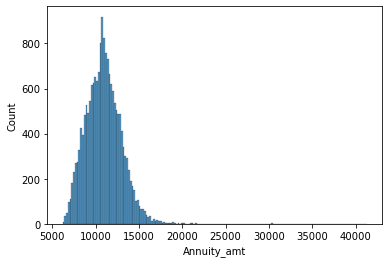

In [1702]:
sns.histplot(df_ex[df_ex['Default_hist']=='df']['Annuity_amt'])

<AxesSubplot:xlabel='Annuity_amt', ylabel='Count'>

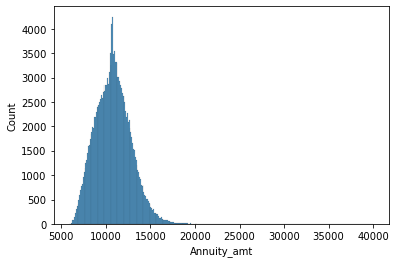

In [1703]:
sns.histplot(df_ex[df_ex['Default_hist']=='ndf']['Annuity_amt'])

C:\Users\AR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Annuity_amt'>

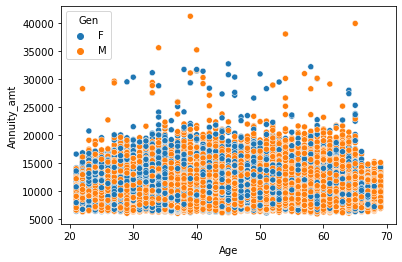

In [1704]:
sns.scatterplot(df_ex['Age'],df_ex['Annuity_amt'],hue= df_ex['Gen'])

In [1675]:
annuity_data = df_ex.groupby(['Age','Gen','Education_det'])['Annuity_amt'].describe()

In [1679]:
annuity_data.to_csv('annuity_data.csv')

In [1680]:
annuity_df = pd.read_csv('annuity_data.csv')

In [1681]:
annuity_df.head()

,Age,Gen,Education_det,count,mean,std,min,25%,50%,75%,max
0,21.0,F,Grad,70.0,9561.957143,1977.010445,6336.90,8031.5425,9653.915,10691.0975,16580.00
1,21.0,F,Other,16.0,9341.650000,1753.073276,6582.89,7756.3900,9729.075,10871.7800,11528.87
2,21.0,F,P_Grad,9.0,10205.978889,1734.909199,6518.87,9398.2100,10575.940,11336.5000,12150.65
3,21.0,M,Grad,193.0,9111.189637,1563.378872,6451.20,7832.7700,8994.220,10302.6000,13907.98
4,21.0,M,Other,53.0,9198.966981,1565.724974,6719.82,7945.1900,9278.850,10278.2900,12809.10


In [1683]:
annuity_df = annuity_df.iloc[:,[0,1,2,8]]

In [1684]:
for i in range(annuity_df.shape[0]):
    k = annuity_df.iloc[i,:]
    dic = {a:b for a,b in zip(k.index,k.values)}
    df_ex['Annuity_amt'] = np.where(((df_ex['Annuity_amt'].isnull())&(df_ex['Education_det']==dic['Education_det'])
                                         &(df_ex['Gen']==dic['Gen'])&
                                     (df_ex['Age']==dic['Age'])),dic['50%'],df_ex['Annuity_amt'])

# Annuity_amt has been filled

In [1737]:
df_ex['Contact_age'].value_counts()

19.0      2566
17.0      2541
20.0      2530
18.0      2490
16.0      2454
          ... 
3875.0       1
3549.0       1
3527.0       1
2859.0       1
3933.0       1
Name: Contact_age, Length: 3682, dtype: int64

<AxesSubplot:xlabel='Contact_age', ylabel='Count'>

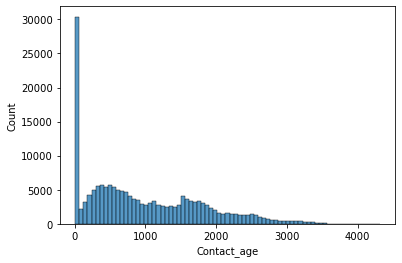

In [1779]:
plt.figu
sns.histplot(df_ex['Contact_age'],bins = 75)

In [1754]:
k = []
q = 0
for i in range(40):
    q += 100
    k.append(q)

In [1775]:
dicc = {}
for i in k:
    a = df_ex[df_ex['Contact_age'] < i]['Default'].value_counts()
    b = df_ex[df_ex['Contact_age'] > i]['Default'].value_counts()
    c = round(a[1.0]/(a[1.0]+a[0.0]),7)
    d = round(b[1.0]/(b[1.0]+b[0.0]),7)
    dicc[i] = [c,d]

In [1780]:
df_ex['contact_age']=df_ex['Contact_age'].fillna(method='ffill')

In [1782]:
df_ex['contact_age'].isnull().sum()

0

In [1783]:
df_ex.drop(columns = 'Contact_age',axis=1,inplace=True)

In [1784]:
df_ex.shape

(187637, 32)

In [1785]:
df_ex.head()

,ID,Vehicle_Status,Loan_amt,Annuity_amt,Job_Type,Default_hist,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,Product_bought,Default,c_cat,experience,prop_list,compensation,density,contact_age
0,540071,Y,658040.0,13816.52,IT,ndf,4.0,Metro,1.0,Grad,Married,F,1_to_3,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,2.0,1.0,LCS,0.9,Morethan_One,801850.0,0.03,18.0
1,511643,N,198075.0,11173.06,IT,ndf,1.0,Metro,2.0,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,46.0,12.0,Yes,Yes,4.0,0.0,LCS,3.0,Morethan_One,884222.0,0.02,306.0
2,506688,N,101056.0,8390.40,Govt.,ndf,4.0,Metro,3.0,Other,Married,M,1_to_3,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,57.0,5.0,Yes,Yes,4.0,0.0,HCS,7.4,One,284120.0,0.01,281.0
3,499360,N,179008.0,7184.13,Non-IT,df,2.0,Metro,1.0,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,39.0,12.0,Yes,Yes,4.0,0.0,HCS,4.7,None,341874.0,0.04,20.0
4,438350,Y,573715.0,13212.77,Non-IT,ndf,1.0,Rural,2.0,Grad,Married,F,4_to_6,Y,Sun,Yes,CLoan,3.0,1.0,North,32.0,16.0,Yes,Yes,6.0,0.0,LCS,6.9,Morethan_One,1259895.0,0.01,2339.0


In [1787]:
df_ex.to_csv('cleaned_data.csv')

# data ready for model building

In [1786]:
df_ex.isnull().sum().reset_index().sort_values(0,ascending=False)

,index,0
0,ID,0
1,Vehicle_Status,0
30,density,0
29,compensation,0
28,prop_list,0
27,experience,0
26,c_cat,0
25,Default,0
24,Product_bought,0
23,Permanent_Addr_tag,0


In [1790]:
perm_addtag_prob

,index,prob
0,Yes,0.263359
1,No,0.268595


In [1791]:
perm_add_prob

,index,prob
0,Yes,0.262093
1,No,0.290369


In [1792]:
loan_type_prob

,index,prob
0,CLoan,0.265101
1,RLoan,0.256634


In [1793]:
phno_prob

,index,prob
0,Yes,0.262176
1,No,0.272796


In [1794]:
alt_income_prob

,index,prob
0,Not_Specified,0.265660
1,Y,0.261071


In [1812]:
gen_prob

,index,prob
0,M,0.259467
1,F,0.273575


In [1811]:
default_hist_prob

,index,prob
0,M,0.259467
1,F,0.273575


In [1797]:
vehicle_stats_prob

,index,prob
0,N,0.266056
1,Y,0.260497


In [1856]:
age_prob.sort_values('prob')

,index,prob
43,66.0,0.224739
48,69.0,0.227586
36,62.0,0.236063
23,57.0,0.237971
46,68.0,0.238926
45,67.0,0.239382
24,48.0,0.245479
28,56.0,0.249732
35,63.0,0.250733
39,65.0,0.251094


In [1857]:
pd.crosstab(df_ex['Age'],df_ex['Default'])

Default,0.0,1.0,3.0
Age,,,
21.0,195,74,117
22.0,540,243,357
23.0,1068,460,654
24.0,1151,485,704
25.0,1226,493,776
26.0,1293,515,807
27.0,1952,817,1172
28.0,2525,995,1588
29.0,2331,934,1429


In [1854]:
process_h_prob.sort_values('prob')


,index,prob
25,25.0,0.200000
24,24.0,0.200000
20,22.0,0.226415
18,21.0,0.243644
15,20.0,0.244038
13,19.0,0.255932
6,15.0,0.258105
7,16.0,0.261879
21,1.0,0.262069
2,13.0,0.262147


In [1855]:
df_ex['Age'].value_counts()

39.0    5551
37.0    5361
40.0    5280
38.0    5209
41.0    5207
42.0    5123
28.0    5108
32.0    5094
43.0    5059
36.0    4962
44.0    4891
31.0    4862
30.0    4761
29.0    4694
35.0    4691
34.0    4675
33.0    4662
46.0    4525
54.0    4497
55.0    4488
45.0    4421
47.0    4412
53.0    4356
57.0    4262
48.0    4208
50.0    4177
49.0    4167
52.0    4107
56.0    4032
60.0    3971
27.0    3941
59.0    3941
58.0    3912
51.0    3847
61.0    3578
63.0    3422
62.0    3283
64.0    3109
65.0    2618
26.0    2615
25.0    2495
24.0    2340
23.0    2182
66.0    1635
22.0    1140
67.0    1137
68.0    1037
21.0     386
69.0     206
Name: Age, dtype: int64

In [1800]:
job_type_prob

,index,prob
0,IT,0.265250
1,Non-IT,0.260852
2,Govt.,0.267242


In [1801]:
proplist_prob

,index,prob
0,One,0.263273
1,Morethan_One,0.266914
2,None,0.264593


In [1802]:
region_type_prob

,index,prob
0,Metro,0.264793
1,Rural,0.262546
2,other,0.258990


In [1803]:
credit_inq_prob 

,index,prob
0,1,0.269874
1,2,0.264640
2,3,0.251790
3,>4,0.259247


In [1804]:
edu_prob

,index,prob
0,Grad,0.268523
1,P_Grad,0.250855
2,Other,0.270857


In [1805]:
marital_stat_prob

,index,prob
0,Married,0.264433
1,Single,0.266833
2,Divorce,0.258968
3,Widow,0.261659


In [1806]:
credit_links_prob 


,index,prob
0,1_to_3,0.262806
1,4_to_6,0.279169
2,>6,0.252116


In [1807]:
day_Process_prob 


,index,prob
0,Tue,0.263328
1,wed,0.263456
2,mon,0.261716
3,thur,0.267829
4,Fri,0.262569
5,SAT,0.269653
6,Sun,0.261469


In [1808]:
region_prob 


,index,prob
0,North,0.261313
1,East,0.263114
2,Central,0.263415
3,South,0.273524


In [1809]:

depen_prob 


,index,prob
0,2.0,0.263261
1,1.0,0.263930
2,3.0,0.266183
3,4.0,0.269734
4,5.0,0.249511
5,6.0,0.259887
6,7.0,0.258065
7,8.0,0.533333
8,9.0,0.500000


In [1810]:
com_rat_prob

,index,prob
0,2.0,0.263425
1,3.0,0.276661
2,1.0,0.249483


In [1150]:
#deleted_nulls = df_ex.iloc[leg,:].isnull().sum().reset_index().sort_values(0,ascending=False)

In [781]:
perm_addtag_prob

,index,prob
0,Yes,0.263359
1,No,0.268595


In [ ]:
# 1 after n-1 encoding
perm_addtag_prob
perm_add_prob
loan_type_prob
phno_prob
alt_income_prob
gen_prob
default_hist_prob
vehicle_stats_prob

age_prob
process_h_prob


job_type_prob - 3
proplist_prob - 3
region_type_prob - 3
credit_inq_prob - 4
edu_prob - 3
marital_stat_prob - 4
credit_links_prob - 3
day_Process_prob - 7
region_prob - 4

depen_prob - 9
com_rat_prob - 3


In [1817]:
df_ex.set_index('ID',inplace=True)

In [1819]:
df_ex.head()

,Vehicle_Status,Loan_amt,Annuity_amt,Job_Type,Default_hist,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,Product_bought,Default,c_cat,experience,prop_list,compensation,density,contact_age
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
540071,Y,658040.0,13816.52,IT,ndf,4.0,Metro,1.0,Grad,Married,F,1_to_3,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,2.0,1.0,LCS,0.9,Morethan_One,801850.0,0.03,18.0
511643,N,198075.0,11173.06,IT,ndf,1.0,Metro,2.0,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,46.0,12.0,Yes,Yes,4.0,0.0,LCS,3.0,Morethan_One,884222.0,0.02,306.0
506688,N,101056.0,8390.40,Govt.,ndf,4.0,Metro,3.0,Other,Married,M,1_to_3,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,57.0,5.0,Yes,Yes,4.0,0.0,HCS,7.4,One,284120.0,0.01,281.0
499360,N,179008.0,7184.13,Non-IT,df,2.0,Metro,1.0,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,39.0,12.0,Yes,Yes,4.0,0.0,HCS,4.7,None,341874.0,0.04,20.0
438350,Y,573715.0,13212.77,Non-IT,ndf,1.0,Rural,2.0,Grad,Married,F,4_to_6,Y,Sun,Yes,CLoan,3.0,1.0,North,32.0,16.0,Yes,Yes,6.0,0.0,LCS,6.9,Morethan_One,1259895.0,0.01,2339.0


In [1825]:
pd.pivot_table(data = df_ex,index=['Default_hist','prop_list','Age'],columns='Default',aggfunc='count')

Addr_permanent               Annuity_amt  \
Default                                   0.0    1.0    3.0         0.0   
Default_hist prop_list    Age                                             
df           Morethan_One 28.0            1.0    NaN    NaN         1.0   
                          30.0            1.0    1.0    1.0         1.0   
                          31.0            3.0    1.0    1.0         3.0   
                          33.0            NaN    NaN    2.0         NaN   
                          34.0            2.0    NaN    1.0         2.0   
...                                       ...    ...    ...         ...   
ndf          One          65.0         1336.0  448.0  786.0      1336.0   
                          66.0          866.0  254.0  473.0       866.0   
                          67.0          578.0  179.0  344.0       578.0   
                          68.0          546.0  170.0  285.0       546.0   
                          69.0          109.0   32.0   61.0       109.0   

                                             Company_Rating                \
Default                           1.0    3.0            0.0    1.0    3.0   
Default_hist prop_list    Age                                               
df           Morethan_One 28.0    NaN    NaN            1.0    NaN    NaN   
                          30.0    1.0    1.0            1.0    1.0    1.0   
                          31.0    1.0    1.0            3.0    1.0    1.0   
                          33.0    NaN    2.0            NaN    NaN    2.0   
                          34.0    NaN    1.0            2.0    NaN    1.0   
...                               ...    ...            ...    ...    ...   
ndf          One          65.0  448.0  786.0         1336.0  448.0  786.0   
                          66.0  254.0  473.0          866.0  254.0  473.0   
                          67.0  179.0  344.0          578.0  179.0  344.0   
                          68.0  170.0  285.0          546.0  170.0  285.0   
                          69.0   32.0   61.0          109.0   32.0   61.0   

                               Credit_Inq               Credit_Lnks         \
Default                               0.0    1.0    3.0         0.0    1.0   
Default_hist prop_list    Age                                                
df           Morethan_One 28.0        1.0    NaN    NaN         1.0    NaN   
                          30.0        1.0    1.0    1.0         1.0    1.0   
                          31.0        3.0    1.0    1.0         3.0    1.0   
                          33.0        NaN    NaN    2.0         NaN    NaN   
                          34.0        2.0    NaN    1.0         2.0    NaN   
...                                   ...    ...    ...         ...    ...   
ndf          One          65.0     1336.0  448.0  786.0      1336.0  448.0   
                          66.0      866.0  254.0  473.0       866.0  254.0   
                          67.0      578.0  179.0  344.0       578.0  179.0   
                          68.0      546.0  170.0  285.0       546.0  170.0   
                          69.0      109.0   32.0   61.0       109.0   32.0   

                                      Day_Process                ...   c_cat  \
Default                           3.0         0.0    1.0    3.0  ...     0.0   
Default_hist prop_list    Age                                    ...           
df           Morethan_One 28.0    NaN         1.0    NaN    NaN  ...     1.0   
                          30.0    1.0         1.0    1.0    1.0  ...     1.0   
                          31.0    1.0         3.0    1.0    1.0  ...     3.0   
                          33.0    2.0         NaN    NaN    2.0  ...     NaN   
                          34.0    1.0         2.0    NaN    1.0  ...     2.0   
...                               ...         ...    ...    ...  ...     ...   
ndf          One          65.0  786.0      1336.0  448.0  786.0  ...  1336.0   
        

In [1818]:
df.shape

(189200, 34)

<AxesSubplot:xlabel='compensation', ylabel='Count'>

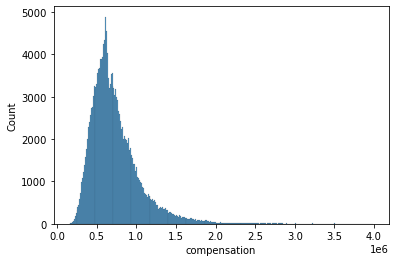

In [1828]:
sns.histplot(df_ex[df_ex['compensation']<4000000]['compensation'])

In [1859]:
df_ex.shape

(187637, 33)

In [1845]:
df_ex['compensation'].quantile(0.995)

2368091.100000001

In [1843]:
df_ex['compensation'].max()

70377021.0

In [1846]:
def newclass(a):
    if a < 200000:
        return('0 - 2')
    elif a <= 400000:
        return('2 - 4')
    elif a <= 600000:
        return('4 - 6')
    elif a <= 800000:
        return('6 - 8')
    elif a <= 1000000:
        return('8 - 10')
    elif a <= 1200000:
        return('10 - 12')
    elif a <= 1400000:
        return('12 - 14')
    elif a <= 1600000:
        return('14 - 16')
    elif a <= 1800000:
        return('16 - 18')
    elif a <= 2000000:
        return('18 - 20')
    elif a <= 2200000:
        return('20 - 22')
    elif a <= 3000000:
        return('22 - 30')
    elif a <= 4000000:
        return('30 - 40')
    else:
        return('>40')

In [1849]:
df_ex['comp_group'] = df_ex['compensation'].map(newclass)

In [1851]:
pd.crosstab(df_ex['comp_group'],df_ex['Default'])

Default,0.0,1.0,3.0
comp_group,,,
0 - 2,66,16,25
10 - 12,7091,2573,4183
12 - 14,3490,1292,2096
14 - 16,1848,622,1011
16 - 18,979,326,573
18 - 20,527,199,286
2 - 4,7908,2842,4675
20 - 22,184,68,112
22 - 30,423,153,235


In [1852]:
df_ex['tenure'] = df_ex['Loan_amt']/df_ex['Annuity_amt']

<AxesSubplot:xlabel='Loan_amt', ylabel='Count'>

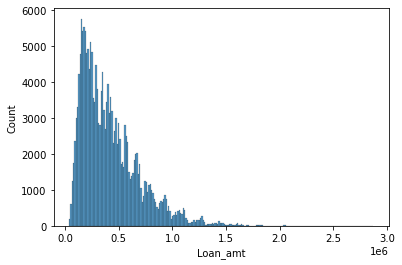

In [1853]:
sns.histplot(df['Loan_amt'])

In [1830]:
df_ex['compensation'].describe()

count    1.876370e+05
mean     7.408677e+05
std      4.349844e+05
min      1.483300e+05
25%      5.242530e+05
50%      6.651490e+05
75%      8.679460e+05
max      7.037702e+07
Name: compensation, dtype: float64

In [963]:
com_rat_prob

,index,prob
0,2.0,0.263425
1,3.0,0.276661
2,1.0,0.249483


In [1858]:
df_ex.to_csv('once_more.csv')

In [1820]:
df.isnull().sum()

ID                        0
Compensation           8992
Vehicle_Status        12987
Loan_amt                  0
Annuity_amt            6574
density_Ind            7691
Job_Type              14568
Default_hist              0
Prop_List              2876
Home_Appliances       15723
Region_Type               0
Credit_Inq             3856
Education_det             0
Marital_Stat              0
Gen                       0
Credit_Lnks               0
Experience            31196
Income_Alt            10981
Day_Process               0
Ph.No                     0
Type_Loan                 0
Dependents                0
Company_Rating        16784
Region                    0
Age                       0
hour_Process              0
Addr_permanent            0
Permanent_Addr_tag        0
Contact_age           11675
Product_bought            0
Default                   0
c_score                2555
c_cat                     0
fake                      0
dtype: int64

In [1018]:
df.groupby(['Education_det','Gen','Addr_permanent'])['c_score'].count()

Education_det  Gen  Addr_permanent
Grad           F    No                 4284
                    Yes               41371
               M    No                 5527
                    Yes               81312
Other          F    No                  390
                    Yes                2943
               M    No                  553
                    Yes                4782
P_Grad         F    No                 1394
                    Yes               13617
               M    No                 2323
                    Yes               28149
Name: c_score, dtype: int64

In [ ]:
(df['Prop_List'].isnull())

In [1000]:
df[(df['c_score'] >-1) & (df['c_score'] <0.5)]['c_score'].count()

93142

In [1002]:
df[(df['c_score']>0.5)]['c_score'].count()

93151

In [1003]:
df['c_score'].isnull().sum()

2555

# there is no one between 0.45 and 0.5
# also there are two distributions

<AxesSubplot:xlabel='c1_rated', ylabel='Count'>

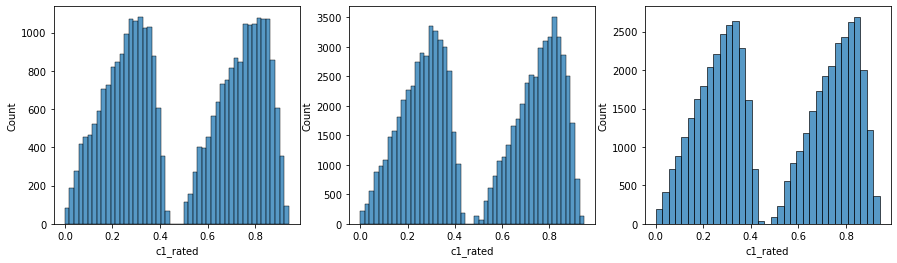

In [1014]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
#sns.histplot(full_df[full_df['Compensation']<2000000]['Compensation'])
sns.histplot(full_df[full_df['Default'] == 1.0]['c1_rated'],bins=49)
plt.subplot(1,3,2)
#sns.histplot(full_df[full_df['Compensation']<2000000]['Compensation'])
sns.histplot(full_df[full_df['Default'] == 0.0]['c1_rated'],bins=49)
plt.subplot(1,3,3)
#sns.histplot(full_df[full_df['Compensation']<2000000]['Compensation'])
sns.histplot(full_df[full_df['Default'] == 3.0]['c1_rated'])

<AxesSubplot:xlabel='c1_rated', ylabel='Count'>

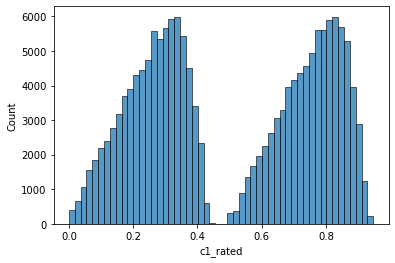

In [975]:
sns.histplot(full_df['c1_rated'])

<AxesSubplot:xlabel='density_Ind', ylabel='Count'>

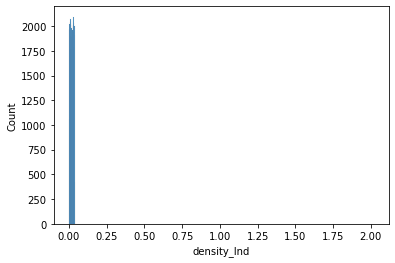

In [1019]:
sns.histplot(df[df['c_cat'] == 'LCS']['density_Ind'])

In [1020]:
df['density_Ind'].max()

2.0372

In [1022]:
df[df['density_Ind'] > 2]

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,Contact_age,Product_bought,Default,c_score,c_cat
32007,449916,457246.0,N,203066.4,11250.67,2.0178,Govt.,df,None,2.0,Metro,2,Grad,Married,F,1_to_3,6.0,Not_Specified,Fri,Yes,CLoan,4.0,2.0,North,32.0,8.0,No,Yes,1164.0,6.0,1.0,0.777,HCS
77422,490092,440037.0,NaN,165310.0,10785.40,2.0156,IT,ndf,One,4.0,Rural,1,P_Grad,Married,M,1_to_3,0.7,Not_Specified,wed,Yes,CLoan,2.0,2.0,East,32.0,13.0,Yes,Yes,1264.0,0.0,0.0,0.180,LCS
114865,557736,588160.0,N,161340.0,9750.54,2.0033,Non-IT,ndf,One,4.0,Metro,2,Grad,Married,M,1_to_3,3.4,Y,thur,Yes,CLoan,2.0,2.0,North,53.0,16.0,Yes,Yes,NaN,6.0,0.0,0.345,LCS
156955,433379,708084.0,Y,530682.0,10336.06,2.0372,NaN,ndf,One,4.0,Metro,1,Grad,Married,M,1_to_3,7.6,Not_Specified,wed,Yes,CLoan,2.0,2.0,Central,54.0,18.0,Yes,Yes,20.0,3.0,3.0,0.756,HCS
173670,436716,765450.0,NaN,667750.0,11218.20,2.0222,IT,df,None,2.0,Rural,1,Grad,Married,F,1_to_3,2.9,Not_Specified,mon,Yes,CLoan,4.0,2.0,North,37.0,12.0,Yes,Yes,526.0,11.0,3.0,0.740,HCS


In [998]:
df.drop(columns='c_cat',axis = 1,inplace = True)

In [1008]:
df['c_cat']= np.where((df['c_score'].values<0.5),'LCS',df['c_cat'])
df['c_cat']= np.where(((df['c_score'].values>=0.5)&(df['c_score'].values<1.5)),'HCS',df['c_cat'])

In [1010]:
df['c_cat'].value_counts()

HCS    93503
LCS    93142
100     2555
Name: c_cat, dtype: int64

In [997]:
df['c_score'].isnull().sum()

2555

In [1006]:
df['c_cat'] = 100

In [1007]:
df['c_cat'].count()

189200

<AxesSubplot:xlabel='c_score', ylabel='Count'>

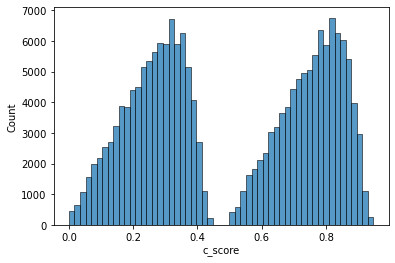

In [974]:
sns.histplot(df['c_score'])

# so we now have probability for 20 cat features
# with this we can build a small model and check performace.

# totally 21 cols

In [967]:
df[df['c_score'].notnull()]['Default'].value_counts(normalize=True)

0.0    0.514962
3.0    0.300024
1.0    0.185014
Name: Default, dtype: float64

In [968]:
df[df['c_score'].isnull()]['Default'].value_counts(normalize=True)

0.0    0.517025
3.0    0.298239
1.0    0.184736
Name: Default, dtype: float64

In [1015]:
df.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,Contact_age,Product_bought,Default,c_score,c_cat
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,Metro,1,Grad,Married,F,1_to_3,0.9,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,18.0,2.0,1.0,0.077,LCS
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,Metro,2,Grad,Married,M,1_to_3,3.0,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,46.0,12.0,Yes,Yes,306.0,4.0,0.0,0.184,LCS
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,Metro,3,Other,Married,M,1_to_3,NaN,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,57.0,5.0,Yes,Yes,281.0,4.0,0.0,0.538,HCS
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,Metro,1,Grad,Married,M,1_to_3,4.7,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,39.0,12.0,Yes,Yes,20.0,4.0,0.0,0.561,HCS
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,Rural,2,Grad,Married,F,4_to_6,6.9,Y,Sun,Yes,CLoan,3.0,1.0,North,32.0,16.0,Yes,Yes,2339.0,6.0,0.0,0.200,LCS


In [1016]:
df.shape

(189200, 33)

In [1017]:
df.to_csv('some_engineering.csv')

In [949]:
df['Experience'].max()

48.1

In [951]:
df[df['Experience'] == 0.0]

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,Contact_age,Product_bought,Default,c_score
13885,493066,721008.0,N,505659.00,10028.65,0.0106,Govt.,ndf,One,4.0,Metro,1,Grad,Married,F,1_to_3,0.0,Y,wed,Yes,CLoan,6.0,1.0,Central,53.0,9.0,Yes,Yes,2215.0,1.0,0.0,0.338
19647,537922,689758.0,N,455240.80,10068.92,0.0393,IT,ndf,One,4.0,Metro,2,Grad,Married,M,1_to_3,0.0,Y,wed,Yes,CLoan,2.0,2.0,South,48.0,11.0,No,Yes,16.0,2.0,0.0,0.711
22194,459697,696675.0,N,1488276.00,15097.36,0.0325,IT,ndf,One,4.0,Metro,1,Grad,Married,F,1_to_3,0.0,Not_Specified,Fri,Yes,CLoan,2.0,2.0,East,54.0,10.0,Yes,Yes,13.0,6.0,0.0,0.384
25583,460442,401154.0,N,429386.00,9556.25,0.0222,IT,ndf,One,4.0,Metro,1,Grad,Married,M,1_to_3,0.0,Y,Tue,Yes,CLoan,2.0,NaN,Central,52.0,3.0,Yes,Yes,1993.0,2.0,0.0,0.707
28018,463995,777630.0,N,440430.00,12832.55,0.0111,IT,ndf,One,4.0,Metro,3,Grad,Married,M,1_to_3,0.0,Not_Specified,thur,Yes,CLoan,2.0,NaN,East,37.0,6.0,Yes,Yes,639.0,7.0,0.0,0.731
28054,509037,344352.0,N,226009.00,11777.05,0.0268,IT,ndf,One,4.0,Metro,2,P_Grad,Married,M,1_to_3,0.0,Not_Specified,wed,Yes,RLoan,2.0,2.0,North,37.0,12.0,Yes,No,638.0,3.0,1.0,0.820
34914,533057,650201.0,N,516505.00,14881.93,0.0282,IT,ndf,One,NaN,Metro,2,Grad,Married,M,1_to_3,0.0,Y,Fri,Yes,CLoan,2.0,3.0,East,51.0,13.0,Yes,Yes,11.0,2.0,1.0,0.346
50895,483693,346460.0,N,564060.00,11064.08,0.0334,IT,ndf,One,NaN,Rural,1,Grad,Married,M,4_to_6,0.0,Not_Specified,Sun,Yes,CLoan,2.0,1.0,Central,54.0,13.0,Yes,Yes,18.0,1.0,0.0,0.057
64743,501066,401014.0,N,623857.20,13303.52,0.0226,NaN,ndf,One,NaN,Metro,1,Grad,Married,M,1_to_3,0.0,Not_Specified,wed,No,CLoan,2.0,3.0,South,23.0,8.0,Yes,Yes,661.0,4.0,0.0,0.805
67791,402464,1019375.0,N,500237.10,11256.36,0.0260,IT,ndf,Morethan_One,1.0,Metro,2,P_Grad,Divorce,F,1_to_3,0.0,Y,Fri,Yes,CLoan,2.0,NaN,North,42.0,15.0,Yes,Yes,894.0,2.0,1.0,0.704


In [774]:
full_df[full_df['Ph.No'] == 'Yes']['Default'].value_counts()

0.0    78168
3.0    45399
1.0    27776
Name: Default, dtype: int64

In [775]:
27776/(78168+27776)

0.2621762440534622

In [843]:
ind = np.unique(df['ID'])

In [847]:
ind[6]

387658

In [846]:
df['c_score'] = 100

In [872]:
df[df['c1_rated'].isnull()]['ID']

3         499360
4         438350
14        501807
19        477915
28        445137
           ...  
189167    473015
189169    480326
189174    395079
189183    561220
189196    450327
Name: ID, Length: 24876, dtype: int64

In [912]:
a = df[df['ID']==499360]['c1_rated'].iloc[0] 

In [911]:
a == np.nan

False

In [914]:
df['c_score']= np.where(np.isnan(df['c1_rated'].values),df['c2_rated'],df['c1_rated'])

In [933]:
df.shape

(189200, 35)

In [934]:
df[df['c_score'].notnull()].shape

(186645, 35)

In [929]:
df['c_score'].isnull().sum()

2555

In [935]:
186645 - 2555

184090

In [923]:
df[df['c2_rated'].isnull()][['c1_rated','c2_rated','c_score']]

,c1_rated,c2_rated,c_score
9,0.757,NaN,0.757
18,0.184,NaN,0.184
36,0.567,NaN,0.567
37,0.174,NaN,0.174
55,0.196,NaN,0.196
...,...,...,...
189168,0.204,NaN,0.204
189173,0.668,NaN,0.668
189176,0.098,NaN,0.098
189180,0.879,NaN,0.879


In [936]:
df[(df['c1_rated'].isnull())&(df['c2_rated'].isnull())].shape

(2555, 35)

In [925]:
df[(df['c1_rated'].notnull())&(df['c2_rated'].notnull())&(df['c_score'].notnull())]

,index,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default,c_score
0,0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,Metro,1,Grad,Married,F,1_to_3,0.9,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0,0.077
1,1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,Metro,2,Grad,Married,M,1_to_3,3.0,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,46.0,12.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0,0.184
2,2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,Metro,3,Other,Married,M,1_to_3,NaN,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,57.0,5.0,Yes,Yes,0.538,0.538,281.0,4.0,0.0,0.538
5,5,470028,1307402.0,Y,741690.0,10477.13,0.0236,Non-IT,ndf,One,4.0,Metro,2,Grad,Married,F,1_to_3,19.6,Not_Specified,mon,Yes,CLoan,2.0,NaN,North,43.0,14.0,Yes,Yes,0.703,0.703,1202.0,7.0,0.0,0.703
6,6,525234,757887.0,N,977270.0,10708.27,0.0089,IT,df,None,2.0,Metro,1,Grad,Married,F,1_to_3,4.1,Not_Specified,Tue,No,CLoan,4.0,2.0,South,36.0,12.0,Yes,Yes,0.142,0.142,721.0,3.0,1.0,0.142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189194,56754,585595,384978.0,Y,380184.0,10549.84,0.0239,IT,ndf,One,4.0,Metro,2,Other,Married,F,1_to_3,0.4,Not_Specified,Fri,Yes,CLoan,2.0,2.0,South,25.0,17.0,Yes,Yes,0.198,0.198,1027.0,4.0,3.0,0.198
189195,56755,513665,671640.0,N,260085.0,9654.50,0.0050,IT,ndf,One,4.0,Metro,1,Grad,Single,F,1_to_3,3.6,Not_Specified,wed,Yes,CLoan,1.0,2.0,North,42.0,11.0,Yes,Yes,0.716,0.716,215.0,7.0,3.0,0.716
189197,56757,476417,551374.0,NaN,231420.0,11299.78,0.0334,Govt.,df,None,2.0,Metro,1,Grad,Divorce,M,1_to_3,0.3,Not_Specified,thur,Yes,RLoan,3.0,2.0,East,35.0,10.0,No,Yes,0.175,0.175,776.0,5.0,3.0,0.175
189198,56758,461152,975117.0,N,1096620.0,10223.30,0.0052,IT,ndf,One,4.0,Metro,2,Other,Single,M,>6,1.4,Y,mon,Yes,CLoan,1.0,1.0,North,22.0,13.0,Yes,No,0.669,0.669,873.0,3.0,3.0,0.669


In [940]:
np.isnan(np.nan)

True

In [941]:
df.drop(columns=['c1_rated','c2_rated'],axis=1,inplace=True)

In [944]:
df.drop(columns=['index'],axis=1,inplace=True)

In [945]:
df.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,Contact_age,Product_bought,Default,c_score
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,Metro,1,Grad,Married,F,1_to_3,0.9,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,18.0,2.0,1.0,0.077
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,Metro,2,Grad,Married,M,1_to_3,3.0,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,46.0,12.0,Yes,Yes,306.0,4.0,0.0,0.184
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,Metro,3,Other,Married,M,1_to_3,NaN,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,57.0,5.0,Yes,Yes,281.0,4.0,0.0,0.538
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,Metro,1,Grad,Married,M,1_to_3,4.7,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,39.0,12.0,Yes,Yes,20.0,4.0,0.0,0.561
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,Rural,2,Grad,Married,F,4_to_6,6.9,Y,Sun,Yes,CLoan,3.0,1.0,North,32.0,16.0,Yes,Yes,2339.0,6.0,0.0,0.200


In [946]:
df.shape

(189200, 32)

In [745]:
full_df.head()

,index,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,...,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default,laaa,pain,Loan_ratio,rounded_l_ratio
0,0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,Metro,1,Grad,Married,F,1_to_3,0.9,...,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0,47.627044,0.206770,0.820652,0.8
1,1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,Metro,2,Grad,Married,M,1_to_3,3.0,...,Yes,CLoan,3.0,1.0,North,46.0,12.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0,17.727910,0.151632,0.224010,0.2
2,2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,Metro,3,Other,Married,M,1_to_3,NaN,...,Yes,CLoan,2.0,3.0,North,57.0,5.0,Yes,Yes,0.538,0.538,281.0,4.0,0.0,12.044241,0.354374,0.355681,0.4
3,3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,Metro,1,Grad,Married,M,1_to_3,4.7,...,Yes,RLoan,4.0,2.0,South,39.0,12.0,Yes,Yes,NaN,0.561,20.0,4.0,0.0,24.917144,0.252168,0.523608,0.5
4,4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,Rural,2,Grad,Married,F,4_to_6,6.9,...,Yes,CLoan,3.0,1.0,North,32.0,16.0,Yes,Yes,NaN,0.200,2339.0,6.0,0.0,43.421251,0.125846,0.455367,0.5


In [723]:
good = full_df[full_df['Age'] == 69]['Default'].value_counts().reset_index().sort_values('index').iloc[0,1]
bad = full_df[full_df['Age'] == 69]['Default'].value_counts().reset_index().sort_values('index').iloc[0,1]

112

In [711]:
l1 = []
l4 = []
g,h = 0,0
for i in age:
    if i == 69:
        
    g = full_df[(full_df['Age'] == i)&(full_df['Prop_List'] == 'None')]['Default'].value_counts().reset_index().sort_values('index')
    h = full_df[(full_df['Age'] == i)&(full_df['Prop_List'] == 'None')]['Default'].value_counts().reset_index().sort_values('index')
    j = h/(g+h)
    l1.append(i)
    l4.append(j)

In [715]:
h

,index,Default
0,0.0,1


In [706]:
pd.crosstab(full_df[full_df['Prop_List'] == 'None']['Age'],full_df[full_df['Prop_List'] == 'None']['Default'])

Default,0.0,1.0,3.0
Age,,,
21.0,5,2,2
22.0,12,6,2
23.0,16,8,13
24.0,42,14,26
25.0,56,11,31
26.0,81,20,52
27.0,181,83,107
28.0,277,115,186
29.0,365,124,180


In [701]:
full_df[full_df['Prop_List'] == 'None']

,index,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,...,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default,laaa,pain,Loan_ratio,rounded_l_ratio
3,3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,Metro,1,Grad,Married,M,1_to_3,4.7,...,Yes,RLoan,4.0,2.0,South,39.0,12.0,Yes,Yes,NaN,0.561,20.0,4.0,0.0,24.917144,0.252168,0.523608,0.5
6,6,525234,757887.0,N,977270.0,10708.27,0.0089,IT,df,None,2.0,Metro,1,Grad,Married,F,1_to_3,4.1,...,No,CLoan,4.0,2.0,South,36.0,12.0,Yes,Yes,0.142,0.142,721.0,3.0,1.0,91.263108,0.169549,1.289467,1.3
14,14,501807,346944.0,Y,187999.0,9332.92,0.0017,IT,df,None,2.0,Rural,1,Grad,Married,M,1_to_3,2.5,...,Yes,CLoan,4.0,2.0,East,34.0,13.0,Yes,Yes,NaN,0.755,18.0,4.0,1.0,20.143642,0.322804,0.541871,0.5
20,20,400669,1273392.0,N,400722.0,12955.32,0.0172,Non-IT,df,None,3.0,Metro,2,Grad,Married,F,>6,3.9,...,No,CLoan,5.0,2.0,Central,35.0,14.0,Yes,Yes,0.631,0.631,1514.0,3.0,0.0,30.931077,0.122086,0.314689,0.3
24,24,410249,641268.0,Y,1406455.4,17406.99,0.0155,NaN,df,None,2.0,Metro,>4,Grad,Married,M,1_to_3,6.3,...,Yes,CLoan,4.0,2.0,Central,31.0,12.0,Yes,Yes,0.367,0.367,NaN,3.0,1.0,80.798311,0.325736,2.193241,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189171,56731,405868,922151.0,Y,258312.0,9140.85,0.0264,IT,df,None,2.0,Rural,>4,Grad,Married,F,1_to_3,4.8,...,No,RLoan,4.0,2.0,East,37.0,17.0,Yes,No,0.295,0.295,2296.0,4.0,3.0,28.259079,0.118950,0.280119,0.3
189172,56732,461476,571862.0,N,583471.0,12190.81,0.0270,IT,df,None,3.0,Metro,NaN,Grad,Married,M,1_to_3,8.2,...,Yes,CLoan,5.0,3.0,North,38.0,5.0,Yes,Yes,0.575,0.575,469.0,5.0,3.0,47.861545,0.255813,1.020300,1.0
189174,56734,395079,609840.0,Y,89619.0,8733.75,0.0052,Non-IT,df,None,2.0,Metro,1,P_Grad,Married,F,1_to_3,4.2,...,Yes,CLoan,4.0,2.0,North,36.0,17.0,Yes,Yes,NaN,0.686,1118.0,0.0,3.0,10.261228,0.171857,0.146955,0.1
189185,56745,423811,847189.0,Y,776783.0,11119.14,0.0326,IT,df,None,2.0,Metro,1,Grad,Married,M,1_to_3,2.6,...,Yes,CLoan,4.0,2.0,South,36.0,13.0,Yes,Yes,0.910,0.910,14.0,2.0,3.0,69.859989,0.157497,0.916895,0.9


In [699]:
agevsp = pd.DataFrame({'age':l1,'more prob':l2,'One prob':l3})

In [700]:
agevsp

,age,more prob,One prob
0,21.0,0.234043,0.263158
1,22.0,0.283465,0.302752
2,23.0,0.335938,0.282455
3,24.0,0.305369,0.290347
4,25.0,0.322335,0.275294
5,26.0,0.292208,0.277995
6,27.0,0.274457,0.290468
7,28.0,0.275180,0.275505
8,29.0,0.289296,0.282125
9,30.0,0.272814,0.276888


In [685]:
full_df[(full_df['Age'] == 22)&(full_df['Prop_List'] == 'Morethan_One')]['Default'].value_counts().reset_index().sort_values('index').iloc[1,1]

36

In [684]:
full_df[(full_df['Age'] == 22)&(full_df['Prop_List'] == 'Morethan_One')]['Default'].value_counts().reset_index().sort_values('index').iloc[0,1]

91

In [98]:
pd.crosstab(full_df['Age'],full_df['Prop_List'])

Prop_List,Morethan_One,None,One
Age,,,
21.0,62,9,327
22.0,177,20,955
23.0,352,37,1803
24.0,431,82,1832
25.0,559,98,1845
26.0,665,153,1811
27.0,1071,371,2489
28.0,1579,578,2946
29.0,1471,669,2549


In [108]:
pd.crosstab(full_df['Education_det'],full_df['Prop_List'])

Prop_List,Morethan_One,None,One
Education_det,,,
Grad,24996,12737,94488
Other,1772,874,6004
P_Grad,10174,4990,30289


In [104]:
full_df.groupby('Prop_List')['Loan_amt'].min()

Prop_List
Morethan_One    35460.0
None            37290.0
One             34275.0
Name: Loan_amt, dtype: float64

In [105]:
pd.crosstab(full_df['Job_Type'],full_df['Prop_List'])

Prop_List,Morethan_One,None,One
Job_Type,,,
Govt.,6590,3366,26220
IT,19168,9640,65523
Non-IT,8307,4179,28974


In [121]:
pd.pivot_table(data = full_df,index = ['Education_det','Job_Type'],columns = 'Prop_List',aggfunc='count',values = 'Age')

Prop_List               Morethan_One  None    One
Education_det Job_Type                           
Grad          Govt.             4529  2361  19515
              IT               13512  6895  48545
              Non-IT            5017  2540  19166
Other         Govt.              330   154   1108
              IT                 901   434   3166
              Non-IT             404   211   1285
P_Grad        Govt.             1731   851   5597
              IT                4755  2311  13812
              Non-IT            2886  1428   8523

In [125]:
pd.pivot_table(data = full_df,index = ['Education_det','Job_Type'],columns = 'Prop_List',aggfunc='median',values = 'Age')

Prop_List               Morethan_One  None   One
Education_det Job_Type                          
Grad          Govt.             39.0  36.0  51.0
              IT                37.0  36.0  49.0
              Non-IT            39.0  37.5  50.0
Other         Govt.             33.0  34.0  39.0
              IT                33.0  34.0  35.0
              Non-IT            33.0  36.0  38.0
P_Grad        Govt.             36.0  36.0  45.0
              IT                36.0  36.0  43.0
              Non-IT            38.0  38.0  45.0

In [131]:
pd.pivot_table(data = full_df,index = ['Education_det','Job_Type'],columns = 'Prop_List',aggfunc= 'max',values = 'Age')

Prop_List               Morethan_One  None   One
Education_det Job_Type                          
Grad          Govt.             69.0  68.0  69.0
              IT                69.0  69.0  69.0
              Non-IT            68.0  68.0  69.0
Other         Govt.             60.0  61.0  69.0
              IT                68.0  68.0  69.0
              Non-IT            67.0  63.0  69.0
P_Grad        Govt.             68.0  68.0  69.0
              IT                69.0  68.0  69.0
              Non-IT            68.0  67.0  69.0

In [130]:
pd.pivot_table(data = full_df,index = ['Education_det','Job_Type'],columns = 'Prop_List',aggfunc= 'min',values = 'Age')

Prop_List               Morethan_One  None   One
Education_det Job_Type                          
Grad          Govt.             21.0  21.0  21.0
              IT                21.0  21.0  21.0
              Non-IT            21.0  21.0  21.0
Other         Govt.             21.0  25.0  21.0
              IT                21.0  23.0  21.0
              Non-IT            22.0  26.0  21.0
P_Grad        Govt.             21.0  23.0  21.0
              IT                21.0  23.0  21.0
              Non-IT            22.0  24.0  21.0

In [ ]:
full_df.groupby('Prop_List')['Loan_amt'].min()

In [138]:
pd.pivot_table(data = full_df,index = ['Age','Education_det','Job_Type'],columns = 'Prop_List',aggfunc= 'count',values = 'Marital_Stat')

Prop_List                    Morethan_One  None    One
Age  Education_det Job_Type                           
21.0 Grad          Govt.             12.0   1.0   42.0
                   IT                27.0   6.0  145.0
                   Non-IT             8.0   1.0   20.0
     Other         Govt.              4.0   NaN    9.0
                   IT                 1.0   NaN   47.0
...                                   ...   ...    ...
69.0 Other         IT                 NaN   NaN    3.0
                   Non-IT             NaN   NaN    2.0
     P_Grad        Govt.              NaN   NaN    4.0
                   IT                 1.0   NaN   24.0
                   Non-IT             NaN   NaN    7.0

[441 rows x 3 columns]

In [145]:
pivot_prop = pd.pivot_table(data = full_df,index = ['Age','Education_det','Job_Type'],columns = 'Prop_List',aggfunc= 'count',values = 'Permanent_Addr_tag')

In [141]:
full_df[(full_df['Age']==21)&(full_df['Education_det']=='Grad')&(full_df['Job_Type']== 'Govt.')]

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
4532,478196,324345.0,Y,94235.0,7752.67,0.0118,Govt.,ndf,Morethan_One,1.0,Metro,1,Grad,Divorce,M,4_to_6,0.4,Not_Specified,Tue,Yes,RLoan,2.0,NaN,South,21.0,16.0,Yes,Yes,0.702,0.702,413.0,1.0,0.0
9128,567243,439416.0,N,103465.0,10302.60,0.0274,Govt.,ndf,One,4.0,Metro,1,Grad,Single,M,4_to_6,2.4,Y,Fri,Yes,RLoan,1.0,2.0,South,21.0,8.0,Yes,Yes,NaN,NaN,648.0,5.0,0.0
9168,539252,579240.0,N,167128.0,7619.20,0.0234,Govt.,ndf,One,4.0,Metro,1,Grad,Single,F,1_to_3,2.0,Y,wed,Yes,RLoan,1.0,2.0,South,21.0,13.0,Yes,Yes,0.600,0.600,53.0,2.0,1.0
15559,497473,685269.0,Y,128220.0,7859.64,0.0095,Govt.,ndf,Morethan_One,1.0,Metro,1,Grad,Married,M,1_to_3,2.0,Y,SAT,Yes,RLoan,3.0,2.0,East,21.0,15.0,Yes,Yes,0.171,0.171,437.0,1.0,1.0
20078,456344,390600.0,N,110650.0,8326.70,0.0183,Govt.,ndf,One,4.0,Rural,NaN,Grad,Single,M,4_to_6,1.3,NaN,mon,No,RLoan,1.0,NaN,South,21.0,10.0,Yes,Yes,0.067,0.067,384.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35930,489319,352943.0,N,276056.8,9926.44,0.0213,Govt.,ndf,One,4.0,Rural,1,Grad,Married,M,1_to_3,3.1,Y,thur,No,CLoan,2.0,2.0,South,21.0,13.0,Yes,No,0.239,0.239,16.0,0.0,3.0
37104,563843,764160.0,Y,344624.0,7600.75,0.0288,Govt.,ndf,Morethan_One,1.0,Metro,1,Grad,Divorce,M,1_to_3,2.1,NaN,thur,Yes,RLoan,2.0,NaN,North,21.0,8.0,Yes,Yes,0.574,0.574,19.0,7.0,3.0
38597,498034,320145.0,Y,85460.0,9762.30,0.0298,Govt.,ndf,Morethan_One,1.0,Metro,1,Grad,Divorce,M,4_to_6,0.4,Not_Specified,Tue,Yes,RLoan,2.0,3.0,South,21.0,19.0,Yes,Yes,0.702,0.702,412.0,1.0,3.0
42997,498710,454070.0,N,100895.0,9243.58,0.0072,Govt.,ndf,One,4.0,Metro,1,Grad,Single,M,4_to_6,2.4,Not_Specified,Tue,No,RLoan,1.0,3.0,East,21.0,16.0,Yes,Yes,0.651,0.651,652.0,3.0,3.0


In [159]:
pivot_prop.tail(20)

Prop_List                    Morethan_One  None    One
Age  Education_det Job_Type                           
67.0 P_Grad        IT                 4.0   2.0  109.0
                   Non-IT             2.0   1.0   40.0
68.0 Grad          Govt.              2.0   1.0  163.0
                   IT                 8.0   6.0  364.0
                   Non-IT             2.0   3.0  142.0
     Other         Govt.              NaN   NaN    8.0
                   IT                 1.0   2.0   22.0
                   Non-IT             NaN   NaN   10.0
     P_Grad        Govt.              1.0   1.0   35.0
                   IT                 3.0   3.0  112.0
                   Non-IT             1.0   NaN   38.0
69.0 Grad          Govt.              1.0   NaN   41.0
                   IT                 1.0   1.0   75.0
                   Non-IT             NaN   NaN   25.0
     Other         Govt.              NaN   NaN    4.0
                   IT                 NaN   NaN    3.0
                   Non-IT             NaN   NaN    2.0
     P_Grad        Govt.              NaN   NaN    4.0
                   IT                 1.0   NaN   24.0
                   Non-IT             NaN   NaN    7.0

In [168]:
pivot_prop.iloc[300:,:].head(6)

Prop_List                    Morethan_One  None    One
Age  Education_det Job_Type                           
54.0 Other         Govt.              4.0   NaN   20.0
                   IT                11.0   NaN   39.0
                   Non-IT             1.0   NaN   21.0
     P_Grad        Govt.             10.0   3.0  149.0
                   IT                26.0   8.0  321.0
                   Non-IT            27.0   9.0  250.0

In [241]:
pivot_prop.loc[(24,)]

Prop_List               Morethan_One  None    One
Education_det Job_Type                           
Grad          Govt.             51.0   4.0  180.0
              IT               183.0  47.0  613.0
              Non-IT            47.0  10.0  179.0
Other         Govt.              5.0   NaN   43.0
              IT                26.0   3.0  147.0
              Non-IT            12.0   NaN   45.0
P_Grad        Govt.             16.0   3.0   98.0
              IT                37.0   9.0  273.0
              Non-IT            14.0   2.0  109.0

In [ ]:
pivot_prop = pd.pivot_table(data = full_df,index = ['Age','Education_det','Job_Type'],columns = 'Prop_List',aggfunc= 'count',values = 'Permanent_Addr_tag')

In [242]:
full_df.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,Metro,1,Grad,Married,F,1_to_3,0.9,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,Metro,2,Grad,Married,M,1_to_3,3.0,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,46.0,12.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,Metro,3,Other,Married,M,1_to_3,NaN,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,57.0,5.0,Yes,Yes,0.538,0.538,281.0,4.0,0.0
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,Metro,1,Grad,Married,M,1_to_3,4.7,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,39.0,12.0,Yes,Yes,NaN,0.561,20.0,4.0,0.0
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,Rural,2,Grad,Married,F,4_to_6,6.9,Y,Sun,Yes,CLoan,3.0,1.0,North,32.0,16.0,Yes,Yes,NaN,0.200,2339.0,6.0,0.0


In [245]:
full_df.groupby('Prop_List')['Compensation'].min()

Prop_List
Morethan_One    151708.0
None            184464.0
One             148330.0
Name: Compensation, dtype: float64

In [266]:
pd.crosstab(full_df['Default_hist'],full_df['Income_Alt'])

Income_Alt,Not_Specified,Y
Default_hist,,
df,13259,4646
ndf,115030,45284


In [267]:
pd.crosstab(full_df['Income_Alt'],full_df['Prop_List'])

Prop_List,Morethan_One,None,One
Income_Alt,,,
Not_Specified,26012,13002,87352
Y,8790,4576,35785


In [274]:
full_df[(full_df['Default_hist'] == 'df')&(full_df['Prop_List'] == 'Morethan_One')]

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
1122,432289,808240.0,N,335395.0,11342.81,0.0163,Non-IT,df,Morethan_One,6.0,Metro,NaN,P_Grad,Married,F,1_to_3,4.1,Y,Tue,Yes,CLoan,8.0,2.0,North,41.0,18.0,No,Yes,0.246,0.246,2481.0,5.0,0.0
6125,509217,1298376.0,Y,579698.0,13792.75,0.0250,Non-IT,df,Morethan_One,5.0,Metro,1,P_Grad,Married,F,1_to_3,9.2,Not_Specified,thur,Yes,CLoan,7.0,3.0,North,54.0,9.0,Yes,Yes,NaN,0.646,920.0,5.0,1.0
6477,392553,741912.0,N,371882.0,12595.61,0.0385,Non-IT,df,Morethan_One,5.0,Metro,1,Grad,Married,M,1_to_3,2.3,Not_Specified,SAT,No,CLoan,7.0,2.0,North,36.0,8.0,Yes,No,0.560,NaN,566.0,3.0,1.0
8711,427707,1886168.0,Y,321624.0,12283.12,0.0127,Non-IT,df,Morethan_One,5.0,Metro,2,Grad,Married,F,1_to_3,3.7,Not_Specified,mon,Yes,CLoan,7.0,2.0,South,48.0,8.0,Yes,Yes,0.769,0.769,19.0,4.0,0.0
8825,426372,373959.0,N,211113.0,11262.05,0.0127,IT,df,Morethan_One,19.0,Rural,1,Grad,Married,M,1_to_3,3.3,Not_Specified,Tue,Yes,CLoan,3.0,2.0,Central,39.0,12.0,Yes,No,0.590,0.590,770.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47514,486551,1432795.0,N,286843.0,12182.18,NaN,Govt.,df,Morethan_One,5.0,Metro,2,Grad,Married,M,4_to_6,9.8,Not_Specified,mon,Yes,CLoan,2.0,2.0,North,43.0,20.0,Yes,Yes,0.737,0.737,1622.0,2.0,3.0
51305,456378,958284.0,Y,1038495.6,13725.33,0.0221,IT,df,Morethan_One,5.0,Metro,1,P_Grad,Married,M,1_to_3,7.0,Not_Specified,mon,Yes,CLoan,7.0,1.0,Central,39.0,18.0,Yes,Yes,NaN,0.670,344.0,3.0,3.0
51740,405931,306918.0,N,295794.0,7810.21,0.0056,IT,df,Morethan_One,NaN,Metro,1,Grad,Married,M,1_to_3,8.6,Not_Specified,Fri,Yes,CLoan,7.0,3.0,Central,36.0,10.0,Yes,Yes,0.698,NaN,1303.0,2.0,3.0
51853,392659,950985.0,Y,527893.8,13594.28,0.0385,IT,df,Morethan_One,5.0,Rural,2,Grad,Married,F,1_to_3,6.0,Not_Specified,Fri,Yes,CLoan,7.0,2.0,East,41.0,18.0,Yes,Yes,0.863,0.863,133.0,4.0,3.0


In [279]:
pd.crosstab(full_df['Region_Type'],full_df['Prop_List'],margins=True)

Prop_List,Morethan_One,None,One,All
Region_Type,,,,
Metro,29520,14730,106982,151232
Rural,6611,3467,21264,31342
other,811,404,2535,3750
All,36942,18601,130781,186324


In [277]:
pd.crosstab(full_df['Default_hist'],full_df['Region_Type'],margins=True)

Region_Type,Metro,Rural,other,All
Default_hist,,,,
df,15028,3523,409,18960
ndf,138568,28281,3391,170240
All,153596,31804,3800,189200


# MLP

# Randomizedcv

In [643]:
pd.crosstab(full_df['Default_hist'],full_df['Prop_List'])

Prop_List,Morethan_One,None,One
Default_hist,,,
df,79,18601,0
ndf,36863,0,130781


In [644]:
pd.crosstab(full_df['Default'],full_df['Prop_List'])

Prop_List,Morethan_One,None,One
Default,,,
0.0,18984,9575,67454
1.0,6912,3445,24105
3.0,11046,5581,39222


In [645]:
pd.crosstab(full_df['Default'],full_df['Default_hist'])

Default_hist,df,ndf
Default,,
0.0,9753,87683
1.0,3517,31487
3.0,5690,51070


In [367]:
pd.crosstab(df_copy1['Default_hist'],df_copy1['property_list'],margins=True)

property_list,Morethan_One,None,One,All
Default_hist,,,,
df,1160,13802,3998,18960
ndf,35769,5017,129454,170240
All,36929,18819,133452,189200


In [ ]:
# client with defalut history is highly related to no properties
# client with no default history atleast have one property

property

In [297]:
full_df[full_df['Prop_List'].isnull()]['Default_hist'].value_counts()

ndf    2596
df      280
Name: Default_hist, dtype: int64

In [344]:
18601+ 280

18881

In [361]:
130781+2596

133377

In [362]:
186324+ 2596 + 280

189200

In [363]:
full_df.shape[0]

189200

In [346]:
df_copy1 = full_df.copy()

In [312]:
df_copy1[['Default_hist','Prop_List']].head()

,Default_hist,Prop_List
0,ndf,Morethan_One
1,ndf,Morethan_One
2,ndf,One
3,df,None
4,ndf,Morethan_One


In [355]:
def propertyfill(a):
    if ((a[0] == 'df')&(a[1] is np.nan)):
        return('None')
    elif ((a[0]=='ndf') &(a[1] is np.nan)):
        return('One')
    else:
        return(a[1])

In [356]:
df_copy1['property_list'] = df_copy1[].map(propertyfill)

In [359]:
df_copy1['property_list'].isnull().sum()

0

In [358]:
df_copy1['Prop_List'].value_counts()

One             130781
Morethan_One     36942
None             18601
Name: Prop_List, dtype: int64

In [365]:
df_copy1['property_list'].value_counts()

One             133452
Morethan_One     36929
None             18819
Name: property_list, dtype: int64

In [366]:
133452 -130781

2671

In [354]:
pd.crosstab(df_copy1['Prop_List'],df_copy1['property_list'])

property_list,Morethan_One,None,One
Prop_List,,,
Morethan_One,28026,1097,7819
None,1084,13600,3917
One,7618,3849,119314


In [347]:
aa = pd.Series(zip(df_copy1['Default_hist'],df_copy1['Prop_List']))

In [369]:
aa

0         (ndf, Morethan_One)
1         (ndf, Morethan_One)
2                  (ndf, One)
3                  (df, None)
4         (ndf, Morethan_One)
                 ...         
189195             (ndf, One)
189196             (ndf, One)
189197             (df, None)
189198             (ndf, One)
189199             (ndf, One)
Length: 189200, dtype: object

In [299]:
df_copy1[df_copy1['Default_hist']=='df']['Prop_List'].fillna('None',inplace=True)

C:\Users\AR\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [300]:
df_copy1['Prop_List'].value_counts()

One             130781
Morethan_One     36942
None             18601
Name: Prop_List, dtype: int64

In [301]:
full_df['Prop_List'].value_counts()

One             130781
Morethan_One     36942
None             18601
Name: Prop_List, dtype: int64

In [ ]:
full_df['']

In [286]:
pd.crosstab(full_df['Prop_List'],full_df['Default'])

Default,0.0,1.0,3.0
Prop_List,,,
Morethan_One,18984,6912,11046
None,9575,3445,5581
One,67454,24105,39222


In [302]:
11046/6912

1.5980902777777777

In [303]:
39222/24105

1.6271313005600498

In [294]:
18984/6912

2.7465277777777777

In [295]:
67454/24105

2.7983405932379175

In [291]:
18984/67454

0.28143623802887896

In [292]:
6912/24105

0.2867454884878656

In [287]:
18984/(18964+6912)

0.7336528056886691

In [288]:
67454/(67454+24105)

0.7367271376926353

In [289]:
(18964+6912)/(18964+6912+11046)

0.70082877417258

In [290]:
(67454+24105)/(67454+24105+39222)

0.7000940503589971

In [293]:
# we can combine the two sub categories.
# Prop_List will become a binary categorical feature

In [280]:
full_df[(full_df['Prop_List'] == 'Morethan_One') & (full_df['Default_hist'] == 'df') &
       (full_df['Region_Type'] == 'Metro') ]

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
1122,432289,808240.0,N,335395.0,11342.81,0.0163,Non-IT,df,Morethan_One,6.0,Metro,NaN,P_Grad,Married,F,1_to_3,4.1,Y,Tue,Yes,CLoan,8.0,2.0,North,41.0,18.0,No,Yes,0.246,0.246,2481.0,5.0,0.0
6125,509217,1298376.0,Y,579698.0,13792.75,0.0250,Non-IT,df,Morethan_One,5.0,Metro,1,P_Grad,Married,F,1_to_3,9.2,Not_Specified,thur,Yes,CLoan,7.0,3.0,North,54.0,9.0,Yes,Yes,NaN,0.646,920.0,5.0,1.0
6477,392553,741912.0,N,371882.0,12595.61,0.0385,Non-IT,df,Morethan_One,5.0,Metro,1,Grad,Married,M,1_to_3,2.3,Not_Specified,SAT,No,CLoan,7.0,2.0,North,36.0,8.0,Yes,No,0.560,NaN,566.0,3.0,1.0
8711,427707,1886168.0,Y,321624.0,12283.12,0.0127,Non-IT,df,Morethan_One,5.0,Metro,2,Grad,Married,F,1_to_3,3.7,Not_Specified,mon,Yes,CLoan,7.0,2.0,South,48.0,8.0,Yes,Yes,0.769,0.769,19.0,4.0,0.0
10158,512789,673588.0,Y,84739.2,9791.45,0.0333,IT,df,Morethan_One,6.0,Metro,1,Grad,Married,F,1_to_3,2.8,Not_Specified,thur,Yes,CLoan,8.0,3.0,East,35.0,16.0,Yes,No,0.290,0.290,NaN,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40474,427670,528323.0,N,163719.6,7011.90,0.0190,Govt.,df,Morethan_One,5.0,Metro,1,Grad,Married,M,1_to_3,12.2,NaN,SAT,Yes,CLoan,7.0,2.0,Central,41.0,9.0,Yes,Yes,0.096,0.096,2950.0,8.0,3.0
43022,567847,557028.0,Y,802662.0,14129.77,0.0395,IT,df,Morethan_One,5.0,Metro,1,Grad,Married,M,1_to_3,3.7,Not_Specified,thur,No,CLoan,7.0,2.0,South,33.0,13.0,Yes,Yes,0.671,0.671,1222.0,0.0,3.0
47514,486551,1432795.0,N,286843.0,12182.18,NaN,Govt.,df,Morethan_One,5.0,Metro,2,Grad,Married,M,4_to_6,9.8,Not_Specified,mon,Yes,CLoan,2.0,2.0,North,43.0,20.0,Yes,Yes,0.737,0.737,1622.0,2.0,3.0
51305,456378,958284.0,Y,1038495.6,13725.33,0.0221,IT,df,Morethan_One,5.0,Metro,1,P_Grad,Married,M,1_to_3,7.0,Not_Specified,mon,Yes,CLoan,7.0,1.0,Central,39.0,18.0,Yes,Yes,NaN,0.670,344.0,3.0,3.0


In [1788]:
df_ex['Default'].value_counts()

0.0    95873
3.0    56760
1.0    35004
Name: Default, dtype: int64

In [ ]:
# metro and morethan_one = 29520
# metro and df = 15028
# df and morethan_one = 79
# metro - 153596
# df - 18680
# morethan_one - 36942

In [281]:
pd.pivot_table(data = full_df,index = ['Default_hist','Income_Alt','Region_Type'],columns = 'Prop_List',aggfunc= 'count',values = 'Permanent_Addr_tag')

Prop_List                               Morethan_One     None      One
Default_hist Income_Alt    Region_Type                                
df           Not_Specified Metro                43.0  10250.0      NaN
                           Rural                16.0   2460.0      NaN
                           other                 1.0    292.0      NaN
             Y             Metro                11.0   3649.0      NaN
                           Rural                 2.0    839.0      NaN
                           other                 NaN     88.0      NaN
ndf          Not_Specified Metro             20715.0      NaN  71161.0
                           Rural              4677.0      NaN  14399.0
                           other               560.0      NaN   1792.0
             Y             Metro              7059.0      NaN  29570.0
                           Rural              1514.0      NaN   5647.0
                           other               204.0      NaN    568.0

In [284]:
pivot_prop.loc[(41,)]

Prop_List               Morethan_One   None     One
Education_det Job_Type                             
Grad          Govt.            203.0   96.0   402.0
              IT               597.0  303.0  1049.0
              Non-IT           234.0  124.0   364.0
Other         Govt.             11.0    2.0    16.0
              IT                35.0   13.0    43.0
              Non-IT            17.0    9.0    27.0
P_Grad        Govt.             69.0   43.0   120.0
              IT               181.0   95.0   302.0
              Non-IT           122.0   74.0   187.0

In [283]:
full_df[(full_df['Default_hist'] == 'df')&(full_df['Prop_List'] == 'Morethan_One')]

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
1122,432289,808240.0,N,335395.0,11342.81,0.0163,Non-IT,df,Morethan_One,6.0,Metro,NaN,P_Grad,Married,F,1_to_3,4.1,Y,Tue,Yes,CLoan,8.0,2.0,North,41.0,18.0,No,Yes,0.246,0.246,2481.0,5.0,0.0
6125,509217,1298376.0,Y,579698.0,13792.75,0.0250,Non-IT,df,Morethan_One,5.0,Metro,1,P_Grad,Married,F,1_to_3,9.2,Not_Specified,thur,Yes,CLoan,7.0,3.0,North,54.0,9.0,Yes,Yes,NaN,0.646,920.0,5.0,1.0
6477,392553,741912.0,N,371882.0,12595.61,0.0385,Non-IT,df,Morethan_One,5.0,Metro,1,Grad,Married,M,1_to_3,2.3,Not_Specified,SAT,No,CLoan,7.0,2.0,North,36.0,8.0,Yes,No,0.560,NaN,566.0,3.0,1.0
8711,427707,1886168.0,Y,321624.0,12283.12,0.0127,Non-IT,df,Morethan_One,5.0,Metro,2,Grad,Married,F,1_to_3,3.7,Not_Specified,mon,Yes,CLoan,7.0,2.0,South,48.0,8.0,Yes,Yes,0.769,0.769,19.0,4.0,0.0
8825,426372,373959.0,N,211113.0,11262.05,0.0127,IT,df,Morethan_One,19.0,Rural,1,Grad,Married,M,1_to_3,3.3,Not_Specified,Tue,Yes,CLoan,3.0,2.0,Central,39.0,12.0,Yes,No,0.590,0.590,770.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47514,486551,1432795.0,N,286843.0,12182.18,NaN,Govt.,df,Morethan_One,5.0,Metro,2,Grad,Married,M,4_to_6,9.8,Not_Specified,mon,Yes,CLoan,2.0,2.0,North,43.0,20.0,Yes,Yes,0.737,0.737,1622.0,2.0,3.0
51305,456378,958284.0,Y,1038495.6,13725.33,0.0221,IT,df,Morethan_One,5.0,Metro,1,P_Grad,Married,M,1_to_3,7.0,Not_Specified,mon,Yes,CLoan,7.0,1.0,Central,39.0,18.0,Yes,Yes,NaN,0.670,344.0,3.0,3.0
51740,405931,306918.0,N,295794.0,7810.21,0.0056,IT,df,Morethan_One,NaN,Metro,1,Grad,Married,M,1_to_3,8.6,Not_Specified,Fri,Yes,CLoan,7.0,3.0,Central,36.0,10.0,Yes,Yes,0.698,NaN,1303.0,2.0,3.0
51853,392659,950985.0,Y,527893.8,13594.28,0.0385,IT,df,Morethan_One,5.0,Rural,2,Grad,Married,F,1_to_3,6.0,Not_Specified,Fri,Yes,CLoan,7.0,2.0,East,41.0,18.0,Yes,Yes,0.863,0.863,133.0,4.0,3.0


In [265]:
full_df[full_df['Prop_List'].isnull()]['Default_hist'].value_counts()

ndf    2596
df      280
Name: Default_hist, dtype: int64

In [260]:
full_df[(full_df['Default_hist'] == 'df')&(full_df['Prop_List'] == 'Morethan_One')]['Default'].value_counts()

0.0    39
1.0    20
3.0    20
Name: Default, dtype: int64

In [262]:
full_df[(full_df['Default_hist'] == 'df')&(full_df['Prop_List'] == 'Morethan_One')]['Income_Alt'].value_counts()

Not_Specified    60
Y                13
Name: Income_Alt, dtype: int64

In [271]:
pd.crosstab(full_df['Vehicle_Status'],full_df['Income_Alt'],normalize=True)*100

Income_Alt,Not_Specified,Y
Vehicle_Status,,
N,47.241305,18.606431
Y,24.743896,9.408369


In [249]:
full_df['Prop_List'].isnull().sum()

2876

In [269]:
pd.crosstab(full_df['Vehicle_Status'],full_df['Prop_List'],normalize=True)*100

Prop_List,Morethan_One,None,One
Vehicle_Status,,,
N,11.932918,5.594744,48.369064
Y,7.901107,4.389696,21.812471


In [251]:
pd.crosstab(full_df['Vehicle_Status'],full_df['Default_hist'])

Default_hist,df,ndf
Vehicle_Status,,
N,9903,106188
Y,7763,52359


In [253]:
pd.crosstab(full_df['Gen'],full_df['Prop_List'])

Prop_List,Morethan_One,None,One
Gen,,,
F,13725,7165,42988
M,23217,11436,87793


In [257]:
pd.crosstab(full_df['Region'],full_df['Prop_List'],margins=True)

Prop_List,Morethan_One,None,One,All
Region,,,,
Central,8617,4902,24393,37912
East,9607,4797,26144,40548
North,11053,4971,58768,74792
South,7665,3931,21476,33072
All,36942,18601,130781,186324


In [255]:
pd.crosstab(full_df['Addr_permanent'],full_df['Prop_List'])

Prop_List,Morethan_One,None,One
Addr_permanent,,,
No,3429,1474,9563
Yes,33513,17127,121218


In [256]:
pd.crosstab(full_df['Addr_permanent'],full_df['Vehicle_Status'])

Vehicle_Status,N,Y
Addr_permanent,,
No,8880,4746
Yes,107211,55376


# revelation 1

In [174]:
full_df[(full_df['Prop_List'].isnull())&(full_df['Age']== 63)][['Age','Education_det','Job_Type']].head(50)

,Age,Education_det,Job_Type
71,63.0,Grad,Govt.
4115,63.0,Grad,Non-IT
7586,63.0,Grad,IT
8047,63.0,Grad,IT
8640,63.0,Other,Non-IT
8849,63.0,Grad,Non-IT
9259,63.0,Grad,Non-IT
11422,63.0,Grad,Govt.
11593,63.0,Grad,IT
18457,63.0,P_Grad,Govt.


In [175]:
full_df.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,Metro,1,Grad,Married,F,1_to_3,0.9,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,Metro,2,Grad,Married,M,1_to_3,3.0,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,46.0,12.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,Metro,3,Other,Married,M,1_to_3,NaN,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,57.0,5.0,Yes,Yes,0.538,0.538,281.0,4.0,0.0
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,Metro,1,Grad,Married,M,1_to_3,4.7,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,39.0,12.0,Yes,Yes,NaN,0.561,20.0,4.0,0.0
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,Rural,2,Grad,Married,F,4_to_6,6.9,Y,Sun,Yes,CLoan,3.0,1.0,North,32.0,16.0,Yes,Yes,NaN,0.200,2339.0,6.0,0.0


In [176]:
pd.crosstab(full_df['Prop_List'],full_df['Default'])

Default,0.0,1.0,3.0
Prop_List,,,
Morethan_One,18984,6912,11046
None,9575,3445,5581
One,67454,24105,39222


In [177]:
pd.crosstab(full_df['Prop_List'],full_df['Job_Type'])

Job_Type,Govt.,IT,Non-IT
Prop_List,,,
Morethan_One,6590,19168,8307
None,3366,9640,4179
One,26220,65523,28974


In [189]:
pd.crosstab(full_df['Prop_List'],full_df['Education_det'])

Education_det,Grad,Other,P_Grad
Prop_List,,,
Morethan_One,24996,1772,10174
None,12737,874,4990
One,94488,6004,30289


In [235]:
pd.crosstab(full_df['Prop_List'],full_df['Credit_Inq'],margins=True,normalize=True)*100

Credit_Inq,1,2,3,>4,All
Prop_List,,,,,
Morethan_One,12.152589,5.359696,0.649212,1.661654,19.823151
None,6.341458,2.408932,0.254754,0.988884,9.994028
One,33.175550,15.653951,16.980315,4.373004,70.182820
All,51.669598,23.422579,17.884281,7.023541,100.000000


In [238]:
pd.crosstab(full_df['Age'],full_df['Credit_Inq'],margins=True)

Credit_Inq,1,2,3,>4,All
Age,,,,,
21.0,251,120,5,21,397
22.0,713,353,11,63,1140
23.0,1386,623,33,132,2174
24.0,1440,717,21,149,2327
25.0,1546,770,35,130,2481
26.0,1619,775,32,188,2614
27.0,2447,1137,53,273,3910
28.0,3149,1495,60,377,5081
29.0,2814,1370,67,401,4652


In [237]:
pd.crosstab(full_df['Product_bought'],full_df['Prop_List'])

Prop_List,Morethan_One,None,One
Product_bought,,,
0.0,2625,1286,8722
1.0,4937,2404,16406
2.0,6638,3419,22561
3.0,7823,3896,26658
4.0,5832,2891,20451
5.0,3941,2017,14659
6.0,2398,1313,9280
7.0,1314,646,5358
8.0,711,386,3320


In [240]:
pd.crosstab(full_df['Age'],full_df['Prop_List'],margins=True)

Prop_List,Morethan_One,None,One,All
Age,,,,
21.0,62,9,327,398
22.0,177,20,955,1152
23.0,352,37,1803,2192
24.0,431,82,1832,2345
25.0,559,98,1845,2502
26.0,665,153,1811,2629
27.0,1071,371,2489,3931
28.0,1579,578,2946,5103
29.0,1471,669,2549,4689


In [178]:
binary_cat

['Vehicle_Status',
 'Default_hist',
 'Gen',
 'Income_Alt',
 'Ph.No',
 'Type_Loan',
 'Addr_permanent',
 'Permanent_Addr_tag']

In [185]:
Prop_list_df = full_df.groupby(['Vehicle_Status',
 'Default_hist',
 'Gen',
 'Income_Alt',
 'Ph.No',
 'Type_Loan',
 'Addr_permanent',
 'Permanent_Addr_tag','Prop_List']).count().reset_index().iloc[:,:10]

In [186]:
Prop_list_df[Prop_list_df['Prop_List'] == 'Morethan_One']

,Vehicle_Status,Default_hist,Gen,Income_Alt,Ph.No,Type_Loan,Addr_permanent,Permanent_Addr_tag,Prop_List,ID
7,N,df,F,Not_Specified,No,RLoan,Yes,Yes,Morethan_One,1
10,N,df,F,Not_Specified,Yes,CLoan,No,Yes,Morethan_One,2
12,N,df,F,Not_Specified,Yes,CLoan,Yes,No,Morethan_One,2
14,N,df,F,Not_Specified,Yes,CLoan,Yes,Yes,Morethan_One,8
22,N,df,F,Y,No,CLoan,Yes,No,Morethan_One,2
...,...,...,...,...,...,...,...,...,...,...
390,Y,ndf,M,Y,Yes,CLoan,Yes,Yes,Morethan_One,578
392,Y,ndf,M,Y,Yes,RLoan,No,No,Morethan_One,1
394,Y,ndf,M,Y,Yes,RLoan,No,Yes,Morethan_One,6
396,Y,ndf,M,Y,Yes,RLoan,Yes,No,Morethan_One,13


In [188]:
full_df[full_df['Prop_List'].isnull()]

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
71,585485,419840.0,N,504102.0,10685.91,0.0245,Govt.,ndf,NaN,4.0,Rural,1,Grad,Widow,M,1_to_3,NaN,Not_Specified,Fri,Yes,CLoan,1.0,2.0,North,63.0,17.0,Yes,Yes,0.076,0.076,404.0,2.0,0.0
275,478268,762756.0,Y,426942.0,11605.41,0.0380,IT,ndf,NaN,1.0,Metro,>4,P_Grad,Married,F,1_to_3,9.0,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,29.0,11.0,Yes,No,0.886,0.886,1940.0,2.0,0.0
416,514246,1453032.0,Y,1201160.4,11196.98,0.0184,Non-IT,ndf,NaN,4.0,Metro,2,Grad,Married,F,1_to_3,0.7,Y,thur,Yes,CLoan,2.0,1.0,North,50.0,14.0,Yes,Yes,0.000,0.000,2236.0,2.0,1.0
437,433066,975384.0,N,386680.0,12766.51,0.0027,Non-IT,ndf,NaN,NaN,Metro,2,Grad,Married,F,1_to_3,8.9,Y,thur,Yes,CLoan,2.0,2.0,Central,43.0,11.0,Yes,No,0.203,0.203,2632.0,4.0,0.0
450,489813,570840.0,N,501270.0,10509.53,0.0078,Non-IT,ndf,NaN,4.0,Metro,3,Grad,Married,M,1_to_3,NaN,Not_Specified,thur,Yes,CLoan,2.0,NaN,North,59.0,7.0,Yes,Yes,0.170,0.170,744.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56638,491891,1940256.0,Y,969815.0,14075.16,0.0103,Govt.,ndf,NaN,4.0,Metro,2,Grad,Single,M,1_to_3,1.2,Y,thur,Yes,RLoan,1.0,2.0,North,58.0,17.0,Yes,Yes,0.405,0.405,361.0,1.0,3.0
56694,393900,459762.0,Y,604779.7,NaN,0.0098,IT,ndf,NaN,4.0,Metro,1,Grad,Married,M,1_to_3,10.5,Y,Fri,No,CLoan,2.0,2.0,Central,42.0,12.0,Yes,Yes,0.824,0.824,387.0,4.0,3.0
56741,466790,1450270.0,N,896077.0,13998.95,0.0245,NaN,ndf,NaN,4.0,Metro,2,Grad,Married,F,1_to_3,5.1,NaN,SAT,Yes,CLoan,2.0,2.0,North,31.0,11.0,Yes,No,0.785,0.785,1203.0,3.0,3.0
56743,561220,516555.0,N,389956.0,11539.73,0.0029,Govt.,ndf,NaN,4.0,Metro,2,P_Grad,Married,M,1_to_3,2.3,Not_Specified,wed,Yes,CLoan,2.0,2.0,South,39.0,10.0,Yes,Yes,NaN,0.311,643.0,2.0,3.0


In [ ]:
pivott_prop = pd.pivot_table(data = full_df,index = ['Age','Education_det','Job_Type'],columns = 'Prop_List',aggfunc= 'count',values = 'Permanent_Addr_tag')

<AxesSubplot:xlabel='Compensation', ylabel='Count'>

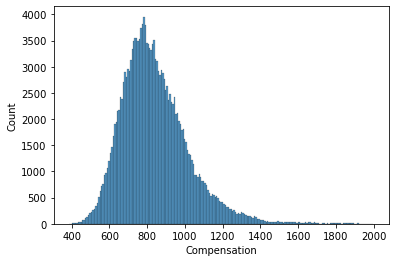

In [197]:
sns.histplot(np.log(full_df[full_df['Compensation'] < 4000000]['Compensation']))

<AxesSubplot:xlabel='Compensation', ylabel='Count'>

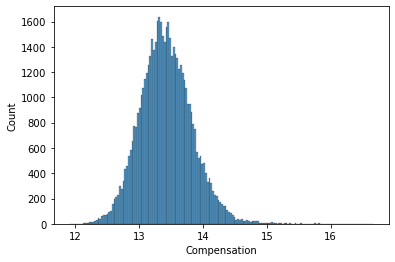

In [201]:
sns.histplot(np.log(full_df[(full_df['Default']== 3)]['Compensation']))

<AxesSubplot:xlabel='Compensation', ylabel='Count'>

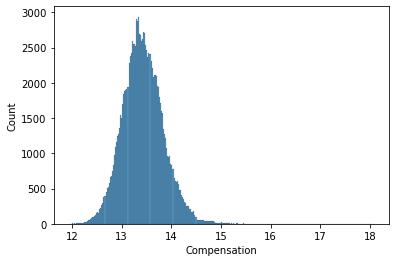

In [202]:
sns.histplot(np.log(full_df[(full_df['Default']!=3)]['Compensation']))

In [203]:
np.log(full_df[(full_df['Default']== 3)]['Compensation']).skew()

0.388048146090716

In [204]:
np.log(full_df[(full_df['Default']!=3)]['Compensation']).skew()

0.4084443334702674

In [205]:
np.log(full_df['Compensation']).skew()

0.40241584368959266

<AxesSubplot:xlabel='Compensation', ylabel='Loan_amt'>

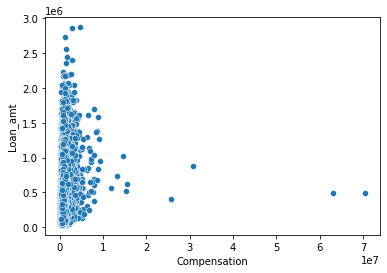

In [207]:
sns.scatterplot(data = full_df[(full_df['Default']!=3)],x ='Compensation',y= 'Loan_amt')

<AxesSubplot:xlabel='Compensation', ylabel='Loan_amt'>

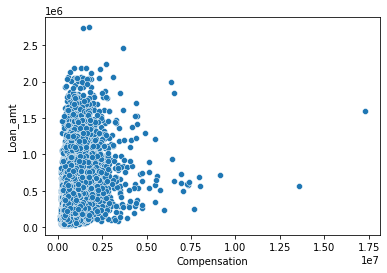

In [208]:
sns.scatterplot(data = full_df[(full_df['Default']==3)],x ='Compensation',y= 'Loan_amt')

In [209]:
full_df[(full_df['Default']==3)]['Compensation'].max()

17276168.0

In [210]:
full_df[(full_df['Default']!=3)]['Compensation'].max()

70377021.0

In [211]:
full_df[full_df['Compensation'] == full_df[(full_df['Default']!=3)]['Compensation'].max()]

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
112658,430988,70377021.0,Y,493122.0,15849.59,0.009,IT,df,None,NaN,Metro,2,Grad,Married,F,1_to_3,13.6,Not_Specified,thur,Yes,CLoan,4.0,2.0,North,43.0,23.0,Yes,Yes,0.814,0.814,1147.0,2.0,1.0


In [212]:
pd.crosstab(full_df['Default_hist'],full_df['Default'])

Default,0.0,1.0,3.0
Default_hist,,,
df,9753,3517,5690
ndf,87683,31487,51070


In [213]:
3517/9753

0.36060699272018865

In [214]:
31487/87683

0.3591003957437588

In [ ]:
positive - did not pay loan (1.0)
negative - paid back the loan (0.0)
TP - did not pay the loan and did not pay the loan in the past
FP - did pay the loan and did not pay the loan in the past
TN - did pay the loan and did pay the loan in the past
FN - did not pay the laon and did pay the loan in the past

FP TP
TN FN

In [225]:
# recall
r = 3517/(3517+31487)
r

0.10047423151639813

In [226]:
#precision
p = 3517/(3517+9753)
p

0.2650339110776187

In [228]:
2*(p*r)/(p+r)

0.14570990595351538

In [223]:
# specificity
87683/(87683+9753)

0.8999035264173406

In [224]:
# out of all ndf what proportion is truly ndf
87683/(87683+31487)

0.7357808173197953

In [215]:
# true positive - 
3517/(3517+9753)

0.2650339110776187

In [ ]:
nullpercent = (full_df.isnull().sum()/len(full_df)*100).reset_index().rename(columns={'index':'features',0:'missing count'}).sort_values('missing count')

In [229]:
nullpercent

,features,missing count
0,ID,0.000000
27,Permanent_Addr_tag,0.000000
26,Addr_permanent,0.000000
25,hour_Process,0.000000
24,Age,0.000000
23,Region,0.000000
21,Dependents,0.000000
20,Type_Loan,0.000000
19,Ph.No,0.000000
18,Day_Process,0.000000


In [231]:
full_df['Credit_Inq'].value_counts()

1     95775
2     43392
3     33176
>4    13001
Name: Credit_Inq, dtype: int64